# Cardiac eQTL manuscript
- V09: 01/22/2023: Modify figures to fit Nat Comm requirements
- V08: 08/12/2022: response to reviewers Nat Comm
- V07: 08/17/2021: reduced GWAS analysis. Now only eQTL paper (the rest goes to cardiac_gwas_epigenome) 
- V06: 08/01/2021: (manuscript V.11) divide figure 4 into 2
- V05: 07/25/2021: update Figure 4 and 5
- V04: 06/11/2021: reorganize paper, change order to multiple things, change examples
- V03: 06/01/2021: separate GWAS and eQTL (GWAS becomes with ATAC). Here is eQTL analysis
- V02: 05/14/2021: first comments from Kelly, explain more in Figure 1, divide figure 1 into 2 (GWAS and finemap)
- V01: 04/28/2021

In [1]:
setwd("/frazer01/projects/CARDIPS/analysis/cardiac_gwas_coloc")

source("script/functions.R"  )


In [32]:
manuscript_version = "V09"
outfolder          = paste("manuscript_eqtl", manuscript_version, sep = "/")

dir.create("manuscript_eqtl"                      , showWarnings = FALSE)
dir.create(outfolder                              , showWarnings = FALSE)
dir.create(paste(outfolder, "figshare", sep = "/"), showWarnings = FALSE)


In [3]:
suppressPackageStartupMessages(library(stringr   ))
suppressPackageStartupMessages(library(colorspace))
suppressPackageStartupMessages(library(kohonen   ))
suppressPackageStartupMessages(library(tempR     ))
suppressPackageStartupMessages(library(latticeExtra))
suppressPackageStartupMessages(library(tis))


In [4]:
#id     = "17_58801973_59598250.1"
#inlist = readRDS(paste0("pipeline/5.5.meta_analysis/coloc_data/", id, ".rds"))
#x      = fread("pipeline/5.5.meta_analysis/coloc_eqtls.txt", sep = "\t", header = TRUE, data.table = FALSE)
#
#x[ x$signal_id == id,]
#
#str(inlist$coloc[["ENSG00000267280.5_8"]])

# Read input data

In [5]:
exons = fread("/frazer01/reference/private/Gencode.v34lift37/exon_info.txt", sep = "\t", header = TRUE, data.table = FALSE)


In [6]:
exp_data = readRDS("/frazer01/projects/CARDIPS/analysis/cardiac_qtls_combined/input/expdata_qtl.rds")
qtl_data = readRDS("/frazer01/projects/CARDIPS/analysis/cardiac_qtls_combined/input/qtl/qtls.RDS"   )


In [7]:
coordinates = exp_data[["coordinates"]]
gene_info   = coordinates[ coordinates$phenotype == "rna",]


In [8]:
colordata_tissue = exp_data[["color"]][["by_tissue"]]
colordata_organ  = exp_data[["color"]][["by_organ" ]]
colordata_cell   = exp_data[["color"]][["by_cell"  ]]

colordata_tissue = colordata_tissue[colordata_tissue$body_site != "ipsc_cvpc",]
colordata_stage  = colordata_organ [c("ipsc_cvpc", "adult"),]
colordata_organ  = colordata_organ [c("arteria"  , "heart"),]

colordata_stage $order = 1:2
colordata_organ $order = 1:2
colordata_tissue$order = 1:nrow(colordata_tissue)

rownames(colordata_cell) = colordata_cell$cell_type
colordata_cell           = colordata_cell[,c("cell_type", "name", "color", "order")] 

mycols                    = c("body_site", "name", "color", "order")
colnames(colordata_stage ) = mycols
colnames(colordata_organ ) = mycols
colnames(colordata_tissue) = mycols
colnames(colordata_cell  ) = mycols

colordata_stage $type = "stage"
colordata_organ $type = "organ"
colordata_tissue$type = "tissue"
colordata_cell  $type = "cell"

colordata = list(by_stage = colordata_stage, by_organ = colordata_organ, by_tissue = colordata_tissue, by_cell = colordata_cell)

In [9]:
colordata_df = as.data.frame(rbindlist(colordata))

In [10]:
qtl2cell_list = readRDS("/frazer01/projects/CARDIPS/analysis/cardiac_qtls_combined/pipeline/cell_type_associations/qtl2cell.rds")

In [11]:
for(x in names(qtl2cell_list))
{
    qtl2cell_list[[x]][,"by_tissue:ipsc_cvpc"] = NULL
    
    colnames(qtl2cell_list[[x]]) = gsub("by_organ:adult", "by_stage:adult", gsub("by_organ:ipsc_cvpc", "by_stage:ipsc_cvpc", colnames(qtl2cell_list[[x]])))
}

In [12]:
qtl2cell_list


$all
  phenotype     name   color n_samples     n by_tissue:heart_atrium
1      atac ATAC-seq #913640       259  6516                      0
2      chip  H3K27ac #1D0B14       131  6368                      0
3   isoform  Isoform #D67500       966  7165                     38
4       rna     Gene #E8C167       966 11692                    201
  by_tissue:heart_ventricle by_tissue:arteria_aorta by_tissue:arteria_coronary
1                         0                       0                          0
2                         0                       0                          0
3                        33                     128                         30
4                       326                     456                         89
  by_organ:arteria by_organ:heart by_stage:ipsc_cvpc by_stage:adult
1                0              0                  0              0
2                0              0                  0              0
3              266             88                106            191
4              656            569                194            620
  by_cell:cibersort.regular.cardiac_muscle
1                                       43
2                                       27
3                                       91
4                                      483
  by_cell:cibersort.regular.smooth_muscle by_cell:cibersort.regular.endocardial
1                                       4                                     3
2                                       2                                    11
3                                     213                                    33
4                                     531                                    87
  by_cell:cibersort.regular.immune by_cell:cibersort.regular.endothelial
1                                0                                     3
2                                0                                     4
3                              119                                     3
4                              333                                    11
  by_cell:cibersort.regular.fibroblast by_cell:cibersort.regular.cardiac_neuron
1                                    0                                        3
2                                    0                                        3
3                                   73                                       32
4                                  240                                      121
  by_cell:cibersort.regular.myofibroblast
1                                       4
2                                       6
3                                       2
4                                       3

$specific
  phenotype     name   color n_samples     n by_tissue:heart_atrium
1      atac ATAC-seq #913640       259  6516                      0
2      chip  H3K27ac #1D0B14       131  6368                      0
3   isoform  Isoform #D67500       966  7165                      7
4       rna     Gene #E8C167       966 11692                     63
  by_tissue:heart_ventricle by_tissue:arteria_aorta by_tissue:arteria_coronary
1                         0                       0                          0
2                         0                       0                          0
3                         6                      17                          3
4                       124                     206                         16
  by_organ:arteria by_organ:heart by_stage:ipsc_cvpc by_stage:adult
1                0              0                  0              0
2                0              0                  0              0
3               62             34                 30            137
4              314            298                 89            507
  by_cell:cibersort.regular.cardiac_muscle
1                                       29
2                                       18
3                                       47
4                                      282
  by_cell:cibersort.regular.s

In [13]:
qtl2type = qtl_data$phenotypes

qtl2type = cbind(qtl2type[,c("phenotype", "name", "color")], as.data.frame(rbindlist(lapply(qtl2type$phenotype, function(phenotype)
{
    x     = qtl_data[["qtl"]][[phenotype]]
    types = 0:5
    out   = unlist(lapply(types, function(type){nrow(x[x$type == type & x$egene == TRUE, ])}))
    out   = c(length(unique(x$transcript_id)), out)
    out   = data.frame(matrix(out, nrow = 1))
    
    colnames(out) = c("Expressed", "Primary", paste("Conditional", 1:5))
    
    return(out)
})), stringsAsFactors = FALSE))

In [14]:
eqtl_coloc = list(isoform         = fread("/frazer01/projects/CARDIPS/analysis/cardiac_eqtls/pipeline/3.2.eqtls/eqtl_overlap/cardiac_eqtls.isoform.txt"      , sep = "\t", header = TRUE, data.table = FALSE),
                  gene            = fread("/frazer01/projects/CARDIPS/analysis/cardiac_eqtls/pipeline/3.2.eqtls/eqtl_overlap/cardiac_eqtls.gene.txt"         , sep = "\t", header = TRUE, data.table = FALSE),
                  isoform_vs_gene = fread("/frazer01/projects/CARDIPS/analysis/cardiac_eqtls/pipeline/3.2.eqtls/eqtl_overlap/cardiac_eqtls.coloc_by_gene.txt", sep = "\t", header = TRUE, data.table = FALSE)
                 )

In [15]:
rna_overlap  = readRDS("/frazer01/projects/CARDIPS/analysis/cardiac_qtls_combined/pipeline/compare_qtls/overlap.rna.rds"     )
iso_overlap  = readRDS("/frazer01/projects/CARDIPS/analysis/cardiac_qtls_combined/pipeline/compare_qtls/overlap.isoform.rds" )
test_overlap = readRDS("/frazer01/projects/CARDIPS/analysis/cardiac_qtls_combined/pipeline/compare_qtls/test_eqtl_annots.rds")

In [16]:
test_overlap$test

annotation            rna  isoform color   estimate 
outside               outside               7770 2601    #CDC1C5 3.4759845
intron                intron                2374 2390    #FFF68F 0.5090302
promoter              promoter               416  270    #FF6EB4 0.9421290
UTR                   UTR                    321  686    #8B3A62 0.2666123
splice_donor          splice_donor            41  112    #54FF9F 0.2216226
splice_acceptor_long  splice_acceptor_long   200  336    #4876FF 0.3537337
splice_acceptor_short splice_acceptor_short   19   31    #000080 0.3745972
exon                  exon                   551  739    #ff0000 0.4300715
                      ci1       ci2       pval         rna_per    isoform_per
outside               3.2669991 3.6991181 0.000000e+00 66.4556962 36.3014655 
intron                0.4759308 0.5444251 1.893101e-87 20.3044817 33.3565946 
promoter              0.8039405 1.1055161 4.708123e-01  3.5579884  3.7683182 
UTR                   0.2319892 0.3059692 7.812368e-88  2.7454670  9.5743196 
splice_donor          0.1508297 0.3199993 9.004887e-19  0.3506671  1.5631542 
splice_acceptor_long  0.2946360 0.4237883 1.097635e-31  1.7105713  4.6894627 
splice_acceptor_short 0.1998036 0.6849832 6.672332e-04  0.1625043  0.4326588 
exon                  0.3828341 0.4829718 1.085670e-47  4.7126240 10.3140265 
                      odds_ratio log2r      order
outside               1.8306615   0.8723651 1    
intron                0.6087097  -0.7161738 2    
promoter              0.9441847  -0.0828590 3    
UTR                   0.2867532  -1.8021184 4    
splice_donor          0.2243330  -2.1562860 6    
splice_acceptor_long  0.3647692  -1.4549444 7    
splice_acceptor_short 0.3755946  -1.4127519 8    
exon                  0.4569141  -1.1300052 9

In [17]:
egenes        = qtl_data[["qtl"]][["rna"    ]]
eisoforms     = qtl_data[["qtl"]][["isoform"]]
egenes_id     = unique(egenes   [ egenes   $egene == TRUE, "gene_id"])
eisoforms_id  = unique(eisoforms[ eisoforms$egene == TRUE, "gene_id"])
coloc_iso     = eqtl_coloc[["isoform_vs_gene"]]
coloc_iso     = coloc_iso[ coloc_iso$transcript_id2 %in% intersect(egenes_id, eisoforms_id) & coloc_iso$transcript_id1 %in% eisoforms[ eisoforms$egene == TRUE, "transcript_id"], ]

In [18]:
coloc_iso_top = as.data.frame(rbindlist(lapply(sort(unique(coloc_iso$transcript_id1)), function(trid)
{
    x = coloc_iso[ coloc_iso$transcript_id1 == trid,]
    return(x[ which.max(x$PP.H4.abf),])
})), stringsAsFactors = FALSE)

In [19]:
coloc_iso_top$cat = 3

coloc_iso_top[ coloc_iso_top$PP.H4.abf >= 0.8, "cat"] = 1
coloc_iso_top[ coloc_iso_top$PP.H3.abf >= 0.8, "cat"] = 2

coloc_iso_top = coloc_iso_top[order(coloc_iso_top$cat, -coloc_iso_top$PP.H4.abf, -coloc_iso_top$PP.H3.abf),]

In [20]:
coloc_iso_pp4  = coloc_iso_top[ coloc_iso_top$cat == 1, ]
coloc_iso_pp3  = coloc_iso_top[ coloc_iso_top$cat == 2, ]
coloc_iso_ppn4 = coloc_iso_top[ coloc_iso_top$cat == 3 & coloc_iso_top$PP.H4.abf >= 0.5, ]
coloc_iso_ppn3 = coloc_iso_top[ coloc_iso_top$cat == 3 & coloc_iso_top$PP.H3.abf >= 0.5, ]

coloc_iso_top$pp = colnames(coloc_iso_top[,paste0("PP.H", 0:4, ".abf")])[apply(coloc_iso_top[,paste0("PP.H", 0:4, ".abf")],1,which.max)]

coloc_iso_ppn42 = coloc_iso_top[ coloc_iso_top$cat == 3 & coloc_iso_top$pp == "PP.H4.abf", ]
coloc_iso_ppn32 = coloc_iso_top[ coloc_iso_top$cat == 3 & coloc_iso_top$pp == "PP.H3.abf", ]


In [21]:
table(coloc_iso_top$pp)


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
      111       508       230      1674      3221 

In [22]:
message(paste(paste("Tested genes"              , length(unique(qtl_data$qtl$rna    $transcript_id)), sep = " = "), 
              paste("Tested isoforms"           , length(unique(qtl_data$qtl$isoform$transcript_id)), sep = " = "), 
              paste("Tested genes with isoforms", length(unique(qtl_data$qtl$isoform$gene_id      )), sep = " = "), 
              sep = "\n"))

Tested genes = 19586
Tested isoforms = 37032
Tested genes with isoforms = 10337



# count samples per individual

In [23]:
meta = exp_data$metadata

In [24]:
a = sort(table(meta[ meta$study == "ipscore" & meta$phenotype == "rna", "subject_id"]), decreasing = TRUE)
b = sort(table(meta[ meta$study == "gtex"    & meta$phenotype == "rna", "subject_id"]), decreasing = TRUE)

length(a[ a> 1])
length(b[ b> 1])
length(b)


[1] 23

[1] 228

[1] 352

In [25]:
str(meta)

'data.frame':	1356 obs. of  10 variables:
 $ assay_id    : chr  "013eb23c-4ff0-493b-b106-9c8c9c2176d6" "028df3e3-a041-4f91-9da7-517a7a33e271" "030ec865-77e5-4e82-9b18-77a51e787655" "03df2c1b-bcc6-4fa3-9f47-d6f9e43be283" ...
 $ run         : chr  "013eb23c-4ff0-493b-b106-9c8c9c2176d6" "028df3e3-a041-4f91-9da7-517a7a33e271" "030ec865-77e5-4e82-9b18-77a51e787655" "03df2c1b-bcc6-4fa3-9f47-d6f9e43be283" ...
 $ wgs_id      : chr  "583d5465-f933-46d1-9fa4-307b76b97311" "c08cc10c-44c1-4fa4-897a-636f5dfb058f" "b0efcf59-dea7-4f62-bf01-41bf08422001" "99dc8247-0416-44c2-854d-a2e31066a75b" ...
 $ subject_id  : chr  "bd04a8cc-5d63-45bc-a2cc-91b0c7cb6e01" "bd4643a6-9742-4a25-8029-a967cc2a84c7" "e0793a72-9694-4711-a2c6-d2ff9071d05f" "508fb6c5-c9d5-4881-9638-cd4bd04d822f" ...
 $ subject_name: chr  "iPSCORE_2_4" "iPSCORE_13_3" "iPSCORE_8_4" "iPSCORE_25_1" ...
 $ study       : chr  "ipscore" "ipscore" "ipscore" "ipscore" ...
 $ tissue      : chr  "ipsc_cvpc" "ipsc_cvpc" "ipsc_cvpc" "ipsc_cvpc" ...
 $ bod

# Part 1: describe eQTLs and differences between eGenes and eIsoforms

In [26]:
message(paste(paste("eGenes"                   , length(egenes_id   ), sep = " = "), 
              paste("Genes that have eIsoforms", length(eisoforms_id), sep = " = "), 
              paste("eIsoforms"                , length(unique(eisoforms[ eisoforms$egene == TRUE, "transcript_id"])), sep = " = "), 
              paste("Genes that have eIsoforms not associated with eGenes", paste0(length(setdiff(eisoforms_id, egenes_id)),
                                                                                   " (", signif(length(setdiff(eisoforms_id, egenes_id)) / length(eisoforms_id) * 100, digits = 3), "%)"
                                                                                  ), sep = " = "), 
              paste("Genes that have eIsoforms associated with eGenes", paste0(length(unique(coloc_iso$transcript_id2)),
                                                                               " (", signif(length(unique(coloc_iso$transcript_id2)) / length(eisoforms_id) * 100, digits = 3), "%, ",
                                                                               length(unique(coloc_iso$transcript_id1)), " eIsoforms, ", 
                                                                               signif(length(unique(coloc_iso$transcript_id1)) / length(unique(eisoforms[ eisoforms$egene == TRUE, "transcript_id"])) * 100, digits = 3),
                                                                               "%)"
                                                                              ), sep = " = "),
              paste("Total eQTLs", nrow(egenes[ egenes$egene == TRUE,]) + nrow(eisoforms[ eisoforms$egene == TRUE,]), sep = " = "),
              sep = "\n"), appendLF = FALSE)


eGenes = 11692
Genes that have eIsoforms = 3847
eIsoforms = 7165
Genes that have eIsoforms not associated with eGenes = 938 (24.4%)
Genes that have eIsoforms associated with eGenes = 2909 (75.6%, 5744 eIsoforms, 80.2%)
Total eQTLs = 26519


In [27]:
pp2color           = data.frame(pp_name = paste0("PP.H", 0:4, ".abf"), short = paste0("pph", 0:4), hyp = 0:4, color = sequential_hcl(n = 5, palette = "Inferno", rev = TRUE))
rownames(pp2color) = pp2color$short

In [28]:
overlap_eqtls_pp = table(coloc_iso_top$pp)

overlap_eqtls_pp = data.frame(name      = names(overlap_eqtls_pp), 
                              eisoforms = as.numeric(overlap_eqtls_pp),
                              egenes    = 0,
                              color     = sequential_hcl(n = 5, palette = "Inferno", rev = TRUE),
                              order     = 5:1,
                              from      = 0,
                              to        = 0
                             )


overlap_eqtls_pp$egenes = unlist(lapply(overlap_eqtls_pp$name, function(x){length(unique(coloc_iso_top[ coloc_iso_top$pp == x, "transcript_id2"]))}))
overlap_eqtls_pp        = rbind(overlap_eqtls_pp[ order(overlap_eqtls_pp$order),], 
                                data.frame(name      = "no eGene",
                                           eisoforms = length(unique(eisoforms[ eisoforms$egene == TRUE, "transcript_id"])) - length(unique(coloc_iso    $transcript_id1)),
                                           egenes    = length(setdiff(eisoforms_id, egenes_id)),
                                           color     = "#cccccc",
                                           order     = 6,
                                           from      = 0,
                                           to        = 0
                                          )
                               )

rownames(overlap_eqtls_pp) = c(paste0("PPh", 4:0), "No eGene")

overlap_eqtls_pp$from = c(0, unlist(lapply(2:nrow(overlap_eqtls_pp), function(ii){sum(overlap_eqtls_pp[1:(ii - 1), "eisoforms"])})))
overlap_eqtls_pp$to   =      unlist(lapply(1:nrow(overlap_eqtls_pp), function(ii){sum(overlap_eqtls_pp[1:(ii    ), "eisoforms"])}))

overlap_eqtls_pp_red = overlap_eqtls_pp[c("PPh4", "PPh3", "No eGene"),]
overlap_eqtls_pp_red = rbind(overlap_eqtls_pp_red, data.frame(name = "Unresolved", row.names = "Unresolved",
                                                              eisoforms = sum(overlap_eqtls_pp[paste0("PPh", 0:2), "eisoforms"]),
                                                              egenes    = length(unique(coloc_iso_top[ coloc_iso_top$pp %in% paste0("PP.H", 0:2, ".abf"), "transcript_id2"])),
                                                              color     = overlap_eqtls_pp["PPh1", "color"],
                                                              order     = 3,
                                                              from      = min(overlap_eqtls_pp[paste0("PPh", 0:2), "from"]),
                                                              to        = max(overlap_eqtls_pp[paste0("PPh", 0:2), "to"  ])
                                                             ))

overlap_eqtls_pp_red = overlap_eqtls_pp_red[order(overlap_eqtls_pp_red$order),]
overlap_eqtls_pp_red$label = c("Same signal", "Different signal", "Not resolved", "no eGene")

In [29]:
overlap_eqtls_pp
overlap_eqtls_pp_red


name      eisoforms egenes color   order from to  
PPh4     PP.H4.abf 3221      1722   #040404 1        0 3221
PPh3     PP.H3.abf 1674      1108   #611163 2     3221 4895
PPh2     PP.H2.abf  230       224   #C53270 3     4895 5125
PPh1     PP.H1.abf  508       361   #F69422 4     5125 5633
PPh0     PP.H0.abf  111        93   #FFFE9E 5     5633 5744
No eGene no eGene  1421       938   #cccccc 6     5744 7165

name       eisoforms egenes color   order from to   label           
PPh4       PP.H4.abf  3221      1722   #040404 1        0 3221 Same signal     
PPh3       PP.H3.abf  1674      1108   #611163 2     3221 4895 Different signal
Unresolved Unresolved  849       652   #F69422 3     4895 5744 Not resolved    
No eGene   no eGene   1421       938   #cccccc 6     5744 7165 no eGene

## Figure 1: Gene and isoform eQTLs

In [30]:
adam15        = readRDS("pipeline/eqtl.3.adam15/to_figure.rds"  )


In [271]:
rowSums(qtl2type[c("rna", "isoform"), c("Primary", paste("Conditional", 1:5))])

rna isoform 
  18030    8489

png 
  2

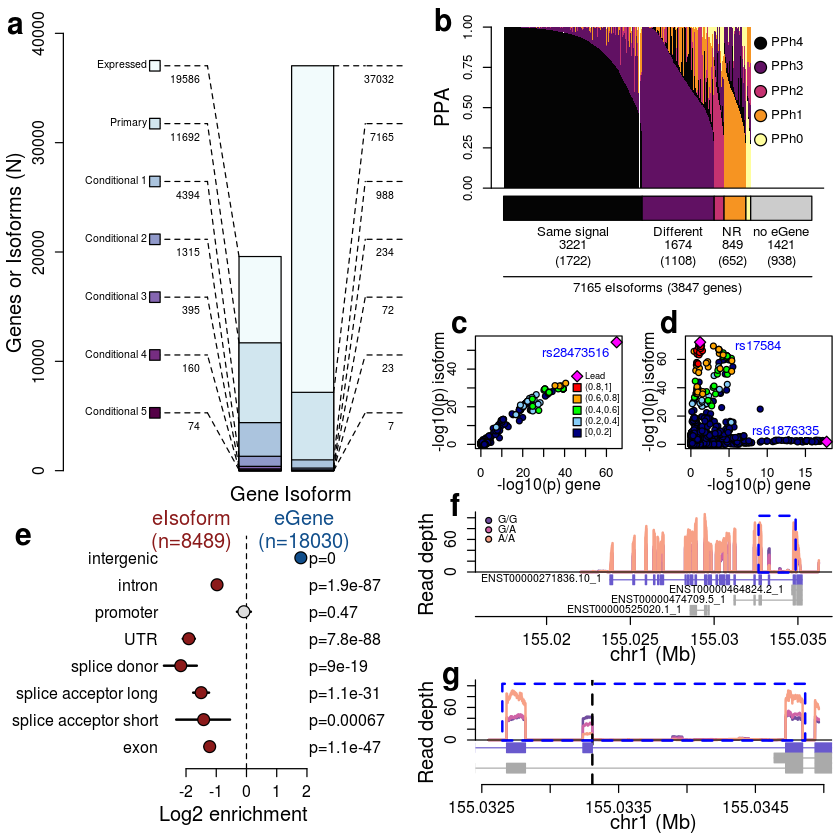

In [278]:
figure_barplot_eqtls = function()
{
    toplot    = qtl2type[c("rna", "isoform"),]
    mycols    = data.frame(x = c("Expressed", "Primary", paste("Conditional", 1:5)), x0 = 0, color = sequential_hcl(n = 7, palette = "BuPu", rev = TRUE))
    mycols$y1 = max(toplot$Expressed) * ((nrow(mycols)    ):1       ) / nrow(mycols)
    mycols$y0 = max(toplot$Expressed) * ((nrow(mycols) - 1):0       ) / nrow(mycols)
    mycols$y2 = max(toplot$Expressed) * ((nrow(mycols) - 1):0 + 0.75) / nrow(mycols)
    
    par(mar = c(1,4,1,1))
    plot(1,1, type = "n", ylim = c(0, 40000), xlim = c(-3, 3), xlab = "", ylab = "", axes = FALSE)
    mtext(text = "Genes or Isoforms (N)", side  = 2, line  = 2.5)
    axis(2, cex.axis = 1.2)
    
    mtext(text = c("Gene", "Isoform"), side = 1, line = 0  , las = 1, cex = 1  , at = c(0.4, 1.6))
    mtext(text = "a"                 , side = 2, line = 2.5, las = 2, cex = 1.5, at = 40000 * 1.025, font = 2)
    
    for(ii in 1:nrow(toplot))
    {
        rect(xleft = ii - 0.9, xright = ii - 0.1, ybottom = 0, ytop = as.numeric(toplot[ii, mycols$x]), col = mycols$color)
    }
    
    text  (x = -1.5, y = mycols$y1, labels = mycols$x                       , pos = 2, cex = 0.8)
    text  (x = -0.5, y = mycols$y2, labels = as.numeric(toplot[1, mycols$x]), pos = 2, cex = 0.8)
    text  (x =  3.2, y = mycols$y2, labels = as.numeric(toplot[2, mycols$x]), pos = 2, cex = 0.8)
    
    segments(x0 =  0.1, x1 = -0.5, y0 = as.numeric(toplot[1, mycols$x]), y1 = mycols$y1, lty = "dashed")
    segments(x0 =  1.9, x1 =  2.5, y0 = as.numeric(toplot[2, mycols$x]), y1 = mycols$y1, lty = "dashed")
    segments(x0 = -1.5, x1 = -0.5, y0 = mycols$y1                      , y1 = mycols$y1, lty = "dashed")
    segments(x0 =  3.2, x1 =  2.5, y0 = mycols$y1                      , y1 = mycols$y1, lty = "dashed")
    
    points(x =  rep(-1.5, nrow(mycols)), y = mycols$y1, cex = 2, pch = 22, bg = mycols$color)
}

plot_enrichment_gene_vs_iso = function()
{
    toplot            = test_overlap$test
    toplot$log2_est   = log2(toplot$estimate)
    toplot$log2_ci1   = log2(toplot$ci1     )
    toplot$log2_ci2   = log2(toplot$ci2     )
    toplot$order      = 1:nrow(toplot)
    #toplot$annotation = gsub("acceptor", "acceptor\n", gsub("_", " ", toplot$annotation))
    toplot$annotation = gsub("outside", "intergenic", gsub("_", " ", toplot$annotation))
    col1              = "#104E8B"
    col2              = "#8B1A1A"
    toplot$color      = "#dddddd"
    toplot$ptext      = paste0("p=", signif(toplot$pval, digits = 2))
    #toplot$ptext      = signif(toplot$pval, digits = 2)
    
    toplot[toplot$pval < 0.05 & toplot$log2_est > 0, "color"] = col1
    toplot[toplot$pval < 0.05 & toplot$log2_est < 0, "color"] = col2
    
    tohead = paste0("(n=", rowSums(qtl2type[c("rna", "isoform"), c("Primary", paste("Conditional", 1:5))]), ")")
    
    par(mar = c(4.5, 10, 2, 7))
    plot(1,1, type = "n", xlim = range(as.numeric(as.matrix(toplot[,c("log2_ci1", "log2_ci2")]))), ylim = c(nrow(toplot), 0), xlab = "", ylab = "", axes = FALSE)
    axis(1, cex.axis = 1.2)
    mtext(text = "Log2 enrichment"     , side = 1, line =  2.5, cex = 1  , las = 1)
    mtext(text = "e"                   , side = 2, line =  8  , cex = 1.5, las = 2, at = -(nrow(toplot)*0.05), font = 2)
    mtext(text = toplot$annotation     , side = 2, line =  0  , cex = 0.8, las = 2, at = toplot$order - 0.5)
    mtext(text = toplot$ptext          , side = 4, line =  0  , cex = 0.8, las = 2, at = toplot$order - 0.5)
    mtext(text = c("eGene", "eIsoform"), side = 3, line =  0.5, cex = 1  , las = 1, at = c(max(toplot$log2_ci2), min(toplot$log2_ci1)) / c(1, 1.5), col = c(col1, col2))
    mtext(text = tohead                , side = 3, line = -1  , cex = 1  , las = 1, at = c(max(toplot$log2_ci2), min(toplot$log2_ci1)) / c(1, 1.5), col = c(col1, col2))
    
    abline(v = 0, lty = "dashed")
    
    segments(x0 = toplot$log2_ci1, x1 = toplot$log2_ci2, y0 = toplot$order - 0.5, lwd = 2)
    points  (x  = toplot$log2_est,                       y  = toplot$order - 0.5, cex = 2, pch = 21, bg = toplot$color)
}

find_lead = function(trid, types, phenotype)
{
    #if(phenotype == "rna"){phenotype = "gene"}
    x = qtl_data[["qtl"]][[phenotype]]
    x = x[x$transcript_id == trid & x$type %in% types,]
    
    return(x)
}

figure_example_coloc_gene_isoform = function(trid_gene, trid_isoform, types_gene = c(0), types_isoform = c(0), panel = "")
{
    indata_gene = fread(paste("/frazer01/projects/CARDIPS/analysis/cardiac_eqtls/pipeline/3.2.eqtls/eqtls_by_gene/cardiac_eqtls.gene/qtl"   , trid_gene   , "txt", sep = "."), sep = "\t", header = TRUE, data.table = FALSE)
    indata_isof = fread(paste("/frazer01/projects/CARDIPS/analysis/cardiac_eqtls/pipeline/3.2.eqtls/eqtls_by_gene/cardiac_eqtls.isoform/qtl", trid_isoform, "txt", sep = "."), sep = "\t", header = TRUE, data.table = FALSE)
    indata_gene = indata_gene[ indata_gene$type %in% types_gene   , ]
    indata_isof = indata_isof[ indata_isof$type %in% types_isoform, ]
    
    leads_gene  = find_lead(trid_gene   , types_gene   , "rna"    )
    leads_isof  = find_lead(trid_isoform, types_isoform, "isoform")
    
    for(type_gene in types_gene)
    {
        toplot_gene = indata_gene[indata_gene$type == type_gene,]
        for(type_isof in types_isoform)
        {
            toplot_isof  = indata_isof[indata_isof$type == type_isof,]
            toplot       = merge(toplot_gene, toplot_isof, by = c("chrom", "pos", "ref", "alt", "rsid", "af", "id"), suffixes = 1:2)
            rsid         = leads_isof$rsid
            ld           = fread(paste(getwd(), "pipeline/ld", paste(rsid, "ld.txt", sep = "."), sep = "/"), sep = "\t", header = TRUE, data.table = FALSE)
            toplot       = merge(toplot, ld[,c("snp_b", "r2", "bg")], by.x = "rsid", by.y = "snp_b", all.x = TRUE)
            toplot$color = "#000000"
            toplot$pch   = 21
            toplot$cex   =  1
            toplot$x     =  -log10(toplot$pval1)
            toplot$y     =  -log10(toplot$pval2)
            
            toplot[is.na(toplot$bg) == TRUE, "bg"] = "#00007e"
            toplot[is.na(toplot$r2) == TRUE, "r2"] = 0
            toplot[toplot$rsid %in% c(leads_gene$rsid, leads_isof$rsid), "bg"   ] = "#ff00ff"
            toplot[toplot$rsid %in% c(leads_gene$rsid, leads_isof$rsid), "pch"  ] = 23
            toplot[toplot$rsid %in% c(leads_gene$rsid, leads_isof$rsid), "cex"  ] =  1.5
            
            toplot    = toplot[order(toplot$cex, toplot$r2),]
            gene_name = coordinates[ coordinates$gene_id == trid_gene & coordinates$phenotype == "rna", "gene_name"]
            
            xlab = paste0("-log10(p) gene ("   , gene_name   , ")")
            ylab = paste0("-log10(p) isoform (", trid_isoform, ")")
            xlab = "-log10(p) gene"
            ylab = "-log10(p) isoform"
            
            if(type_gene == 1){xlab = paste0("-log10(p) gene (", gene_name, ", conditional)")}
            
            par(mar = c(3.5, 3.5, 0, 0.5))
            plot(toplot$x, toplot$y, type = "n", xlab = "", ylab = "", ylim = c(0, max(toplot$y) * 1.02))
            mtext(text = xlab , side = 1, line = 1.8, cex = 0.8)
            mtext(text = ylab , side = 2, line = 1.8, cex = 0.8)
            mtext(text = panel, side = 2, line = 0.5, cex = 1.5, las = 2, at = max(toplot$y) * 1.2, font = 2)
            
            if(nrow(toplot[toplot$cex == 1.5,]) > 1)
            {
                text(x = toplot[toplot$rsid == leads_isof$rsid, "x"] + max(toplot$x) * 0.2, y = toplot[toplot$rsid == leads_isof$rsid, "y"] - max(toplot$y) * 0.05, labels = leads_isof$rsid, pos = 4, cex = 1, col = "#0000ff")
                text(x = toplot[toplot$rsid == leads_gene$rsid, "x"] - max(toplot$x) * 0  , y = toplot[toplot$rsid == leads_gene$rsid, "y"] + max(toplot$y) * 0.1 , labels = leads_gene$rsid, pos = 2, cex = 1, col = "#0000ff")
            }else
            {
                text(x = toplot[toplot$rsid == leads_isof$rsid, "x"], y = toplot[toplot$rsid == leads_isof$rsid, "y"] - max(toplot$x) * 0.1, labels = leads_gene$rsid, pos = 2, cex = 1, col = "#0000ff")
                
            }
            
            points(toplot$x, toplot$y, pch = toplot$pch, bg = toplot$bg, cex = toplot$cex)
            #points(toplot$x, toplot$y, pch = 21, bg = "#ff00ff", cex = toplot$cex)
            
            if(panel == "c")
            {
                tol     = data.frame(min   = (0:5) * 0.2, 
                                     max   = (1:6) * 0.2, 
                                     y     = max(toplot$y) * (1:6 + 0) / 9, 
                                     color = c("#00007e", "#86cdf9", "#01fe02", "#fea500", "#fc0000", "#ff00ff"),
                                     pch   = 22
                                    )
                
                tol$lab = paste0(c("[", rep("(", 4)), tol$min, ",", tol$max, rep("]", 5))
                tol[nrow(tol), "lab"] = "Lead"
                tol[nrow(tol), "pch"] = 23
                
                
                points(x = rep(46, 6), y = tol$y, bg     = tol$color, cex = 1.5, pch = tol$pch)
                text  (x = rep(46, 6), y = tol$y, labels = tol$lab  , cex = 0.7, pos =  4)

            }
        }
    }
    
}

plot_transcripts = function(gene_name, trid, write_trid = TRUE)
{
    trids                = coordinates[ coordinates$gene_name == gene_name & coordinates$phenotype == "isoform", ]
    rownames(trids)      = trids$transcript_id
    trids                = trids[order(trids$transcript_id),]
    trids$order          = 1:nrow(trids)
    trids$color          = "#aaaaaa"
    trids[trid, "color"] = "#6959CD"
    trids$yb             = - trids$order      / max(trids$order) * 75 - 5 + 0.5
    trids$yt             = -(trids$order - 1) / max(trids$order) * 75 - 5 - 0.5
    
    for(trid in trids$transcript_id)
    {
        this = exons[ exons$transcript_id == trid, ]
        myy  =  trids[trid, "yb"] + (trids[trid, "yt"] - trids[trid, "yb"]) / 2
        
        rect(xleft = this$start, xright = this$end, ybottom = trids[trid, "yb"], ytop = trids[trid, "yt"], col = trids[trid, "color"], border = trids[trid, "color"])
        segments(x0 = min(this$start), x1 = max(this$end), y0 = myy, col = trids[trid, "color"])
        if(write_trid == TRUE){text(x = min(this$start), y = myy, labels = trid, pos = 2, cex = 0.8)}
    }
}

plot_adam15 = function(x)
{
    id             = "VAR_1_155033308_G_A"
    rsid           = "rs11589479"
    transcript_id  = "ENST00000271836.10_1"
    xlims_short    = c(155032650,155034864)
    pileup         = x$pileup_by_gt
    gt2col         = data.frame(gt = names(pileup), color = sequential_hcl(palette = "Sunset", n = length(pileup) + 1)[1:length(pileup)])
    
    par(mar = c(3.5,3.5, 0.5, 0.5))
    
    # plot all gene
    xlims = range(pileup[[1]]$pos)
    xlims = c(xlims[[1]] - 5500, xlims[[2]])
    ylims = range(unlist(lapply(pileup, function(xx){xx$mean})))
    ylims[[1]] = -75
    plot(1,1, type = "n", xlim = xlims, ylim = ylims, xlab = "", ylab = "", axes = FALSE)
    
    mtext(text = "chr1 (Mb)" , side = 1, line = 2  )
    mtext(text = "Read depth", side = 2, line = 2.5)
    mtext(text = "f"         , side = 2, line = 1  , las = 2, at = ylims[[2]] * 1.2, font = 2, cex = 1.5)
    
    axis(2, cex.axis = 1.2, at = pretty(c(0, ylims[[2]])))
    axis(1, cex.axis = 1.2, at = pretty(xlims), labels = pretty(xlims) * 1e-6)
    
    for(gt in gt2col$gt)
    {
        this = pileup[[gt]]
        
        lines(this$pos, this$median, lwd = 2, col = gt2col[gt2col$gt == gt, "color"])
    }
    
    plot_transcripts("ADAM15", transcript_id, TRUE)
    
    abline(h = 0)
    
    rect(xleft = xlims_short[[1]], xright = xlims_short[[2]], ybottom = -1, ytop = ylims[[2]], col = NA, lty = "dashed", border = "#0000ff", lwd = 2)
    
    points(x = rep(xlims[[1]], 3)      , y = ylims[[2]] * (3:1 + 2.5) / 6, bg     = gt2col$color          , cex = 1  , pch = 21)
    text  (x = rep(xlims[[1]], 3) + 100, y = ylims[[2]] * (3:1 + 2.5) / 6, labels = c("G/G", "G/A", "A/A"), cex = 0.8, pos = 4)
    
    
    
    #abline(v = 155033308, lty = "dashed", lwd = 2)

    # plot interesting exon
    #ylims = range(unlist(lapply(pileup, function(xx){xx[xx$pos >= xlims_short[[1]] & xx$pos <= xlims_short[[2]], "mean"]})))
    plot(1,1, type = "n", xlim = c(xlims_short[[1]] - 100, xlims_short[[2]] + 100), ylim = ylims, xlab = "", ylab = "", axes = FALSE)
    
    mtext(text = "chr1 (Mb)" , side = 1, line = 2  )
    mtext(text = "Read depth", side = 2, line = 2.5)
    mtext(text = "g"         , side = 2, line = 1  , las = 2, at = ylims[[2]] * 1.2, font = 2, cex = 1.5)

    axis(2, cex.axis = 1.2, at = pretty(c(0, ylims[[2]])))
    axis(1, cex.axis = 1.2, at = pretty(c(xlims_short[[1]] - 100, xlims_short[[2]] + 100)), labels = pretty(c(xlims_short[[1]] - 100, xlims_short[[2]] + 100)) * 1e-6)
    
    for(gt in gt2col$gt)
    {
        this = pileup[[gt]]
        this = this[this$pos >= xlims_short[[1]] - 100 & this$pos <= xlims_short[[2]] + 100,]
        
        lines(this$pos, this$median, lwd = 2, col = gt2col[gt2col$gt == gt, "color"])
    }
    abline(v = 155033308, lty = "dashed", lwd = 2)
    abline(h = 0)
    plot_transcripts("ADAM15", transcript_id, FALSE)
    rect(xleft = xlims_short[[1]], xright = xlims_short[[2]], ybottom = -1, ytop = ylims[[2]], col = NA, lty = "dashed", border = "#0000ff", lwd = 2)
}

plot_coloc_isoform_vs_gene_bar = function()
{
    par(mar = c(1, 4.5, 1, 1))
    plot(1,1, type = "n", xlim = c(0, sum(overlap_eqtls_pp[, "eisoforms"])), ylim = c(-0.75, 1), xlab = "", ylab = "", axes = FALSE)
    
    rect(xleft = overlap_eqtls_pp$from, xright = overlap_eqtls_pp$to, ybottom = -0.2, ytop = -0.05, col = overlap_eqtls_pp$color)
    
    segments(x0 = 0, x1 = sum(overlap_eqtls_pp[, "eisoforms"]), y0 = -0.55)
    
    text(x = sum(overlap_eqtls_pp[, "eisoforms"]) / 2, y = -0.55, labels = paste0(sum(overlap_eqtls_pp[, "eisoforms"]), " eIsoforms (", length(unique(qtl_data$qtl$isoform[ qtl_data$qtl$isoform$egene == TRUE, "gene_id"])), " genes)"), pos = 1, cex = 1)

    totext   = overlap_eqtls_pp_red
    totext$x = totext$from + totext$eisoforms / 2
    
    #totext[ totext$label == "Not\nresolved", "label"] = "PPh4 <0.8 &\nPPh3 <0.8"
    totext[ totext$label == "Not resolved"    , "label"] = "NR"
    totext[ totext$label == "Different signal", "label"] = "Different"
    
    text(x = totext$x, y = -0.2, labels = totext$label                                       , cex = 1, pos = 1)
    text(x = totext$x, y = -0.3, labels = paste0(totext$eisoforms, "\n(", totext$egenes, ")"), cex = 1, pos = 1, col = totext$color_text)
    text(x = totext$x, y = 2.2 , labels = paste0("(", totext$egenes, ")")                    , cex = 1, pos = 1, col = totext$color_text)

    mtext(text = "b"  , side = 2, line = 2.5, at = 1.05, las = 2, font = 2, cex = 1.5)
    mtext(text = "PPA", side = 2, line = 2.5, at = 0.5       )
    
    invisible(lapply(4:0, function(hyp)
    {
        pp     = paste0("PP.H", hyp, ".abf")
        id     = paste0("PPh" , hyp)
        from   = overlap_eqtls_pp[id, "from"]
        mycols = c(pp, setdiff(paste0("PP.H", 4:0, ".abf"), pp))
        myids  = c(id, setdiff(paste0("PPh" , 4:0        ), id))
        toplot = coloc_iso_top[ coloc_iso_top$pp == pp, mycols]
        toplot = toplot[order(toplot[,pp], decreasing = TRUE),]
        
        barplot2(t(as.matrix(toplot)), names.arg = rep("", nrow(toplot)), width = 1, space = 0, add = TRUE, x.offset = from, col = overlap_eqtls_pp[myids, "color"], border = NA, axes = FALSE)
    }))
    
    axis(2, cex.axis = 1, at = (0:4) / 4)

    points(x = rep(max(overlap_eqtls_pp$from) * 1.04, 5), y = (4:0) * 0.15 + 0.3, cex = 2  , pch = 21, bg     = overlap_eqtls_pp[paste0("PPh", 4:0), "color"])
    text  (x = rep(max(overlap_eqtls_pp$from) * 1.05, 5), y = (4:0) * 0.15 + 0.3, cex = 1  , pos =  4, labels =                  paste0("PPh", 4:0))
    
    abline (h = 0)
}

figure_1 = function(size_x = 7, size_y = 7,to_png = FALSE)
{
    #if(to_png == TRUE ){png(filename = paste(outfolder, "Figure_1.png", sep = "/"), width = size_x, height = size_y, units = "in", res = 300)}
    if(to_png == TRUE ){pdf(file = paste(outfolder, "Figure_1.pdf", sep = "/"), width = size_x, height = size_y)}
    if(to_png == FALSE){options(repr.plot.width = size_x, repr.plot.height = size_y)}
    
    #layout(rbind(1:2,
    #             1:2,
    #             3:4,
    #             3:4,
    #             5:6,
    #             c(5,7)
    #            ))
    
    layout(rbind(c(1,1,2,2),
                 c(1,1,2,2),
                 c(1,1,3,4),
                 c(5,5,6,6),
                 c(5,5,7,7)
                ))
    
    figure_barplot_eqtls()
    plot_coloc_isoform_vs_gene_bar()
    
    figure_example_coloc_gene_isoform("ENSG00000027847.14_5", "ENST00000029410.10_2", c(0), c(0), "c")
    figure_example_coloc_gene_isoform("ENSG00000023191.17_5", "ENST00000397604.7_2" , c(0), c(0), "d")
    #figure_example_coloc_gene_isoform("ENSG00000143537.13_4", "ENST00000271836.10_1" , c(0), c(0), "D")
    
    plot_enrichment_gene_vs_iso()
    
    plot_adam15(adam15)
    

    if(to_png == TRUE ){dev.off()}
}

figure_1(to_png = FALSE)
figure_1(to_png = TRUE )

#dev.off()

# Part 2: spatiotemporal eQTLs

## Figures S1-S3: examples of cell type and stage associated eQTLs

png 
  2

png 
  2

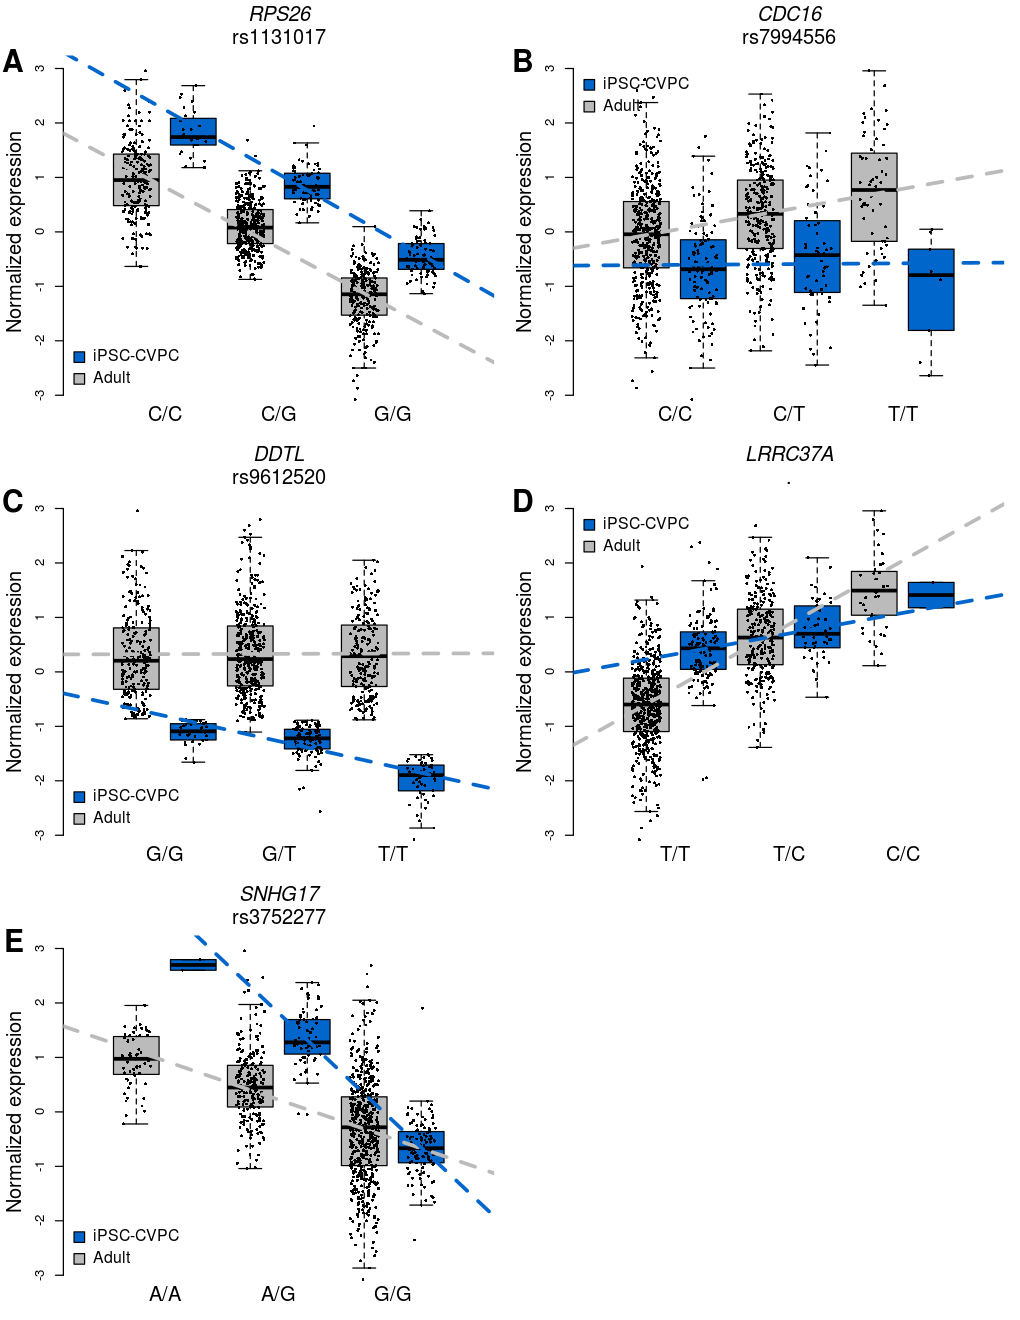

png 
  2

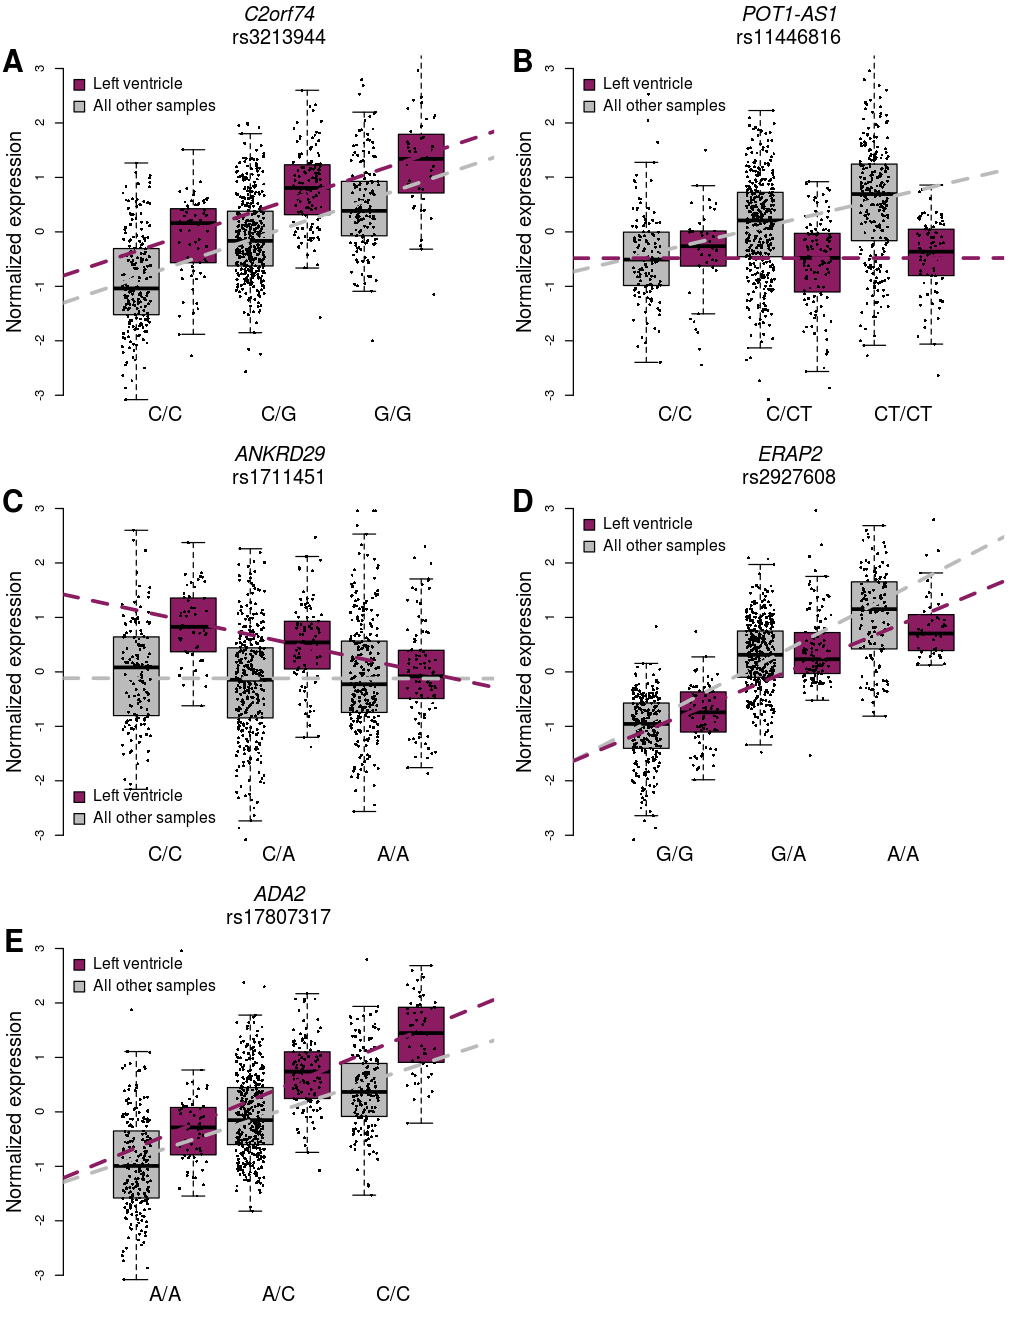

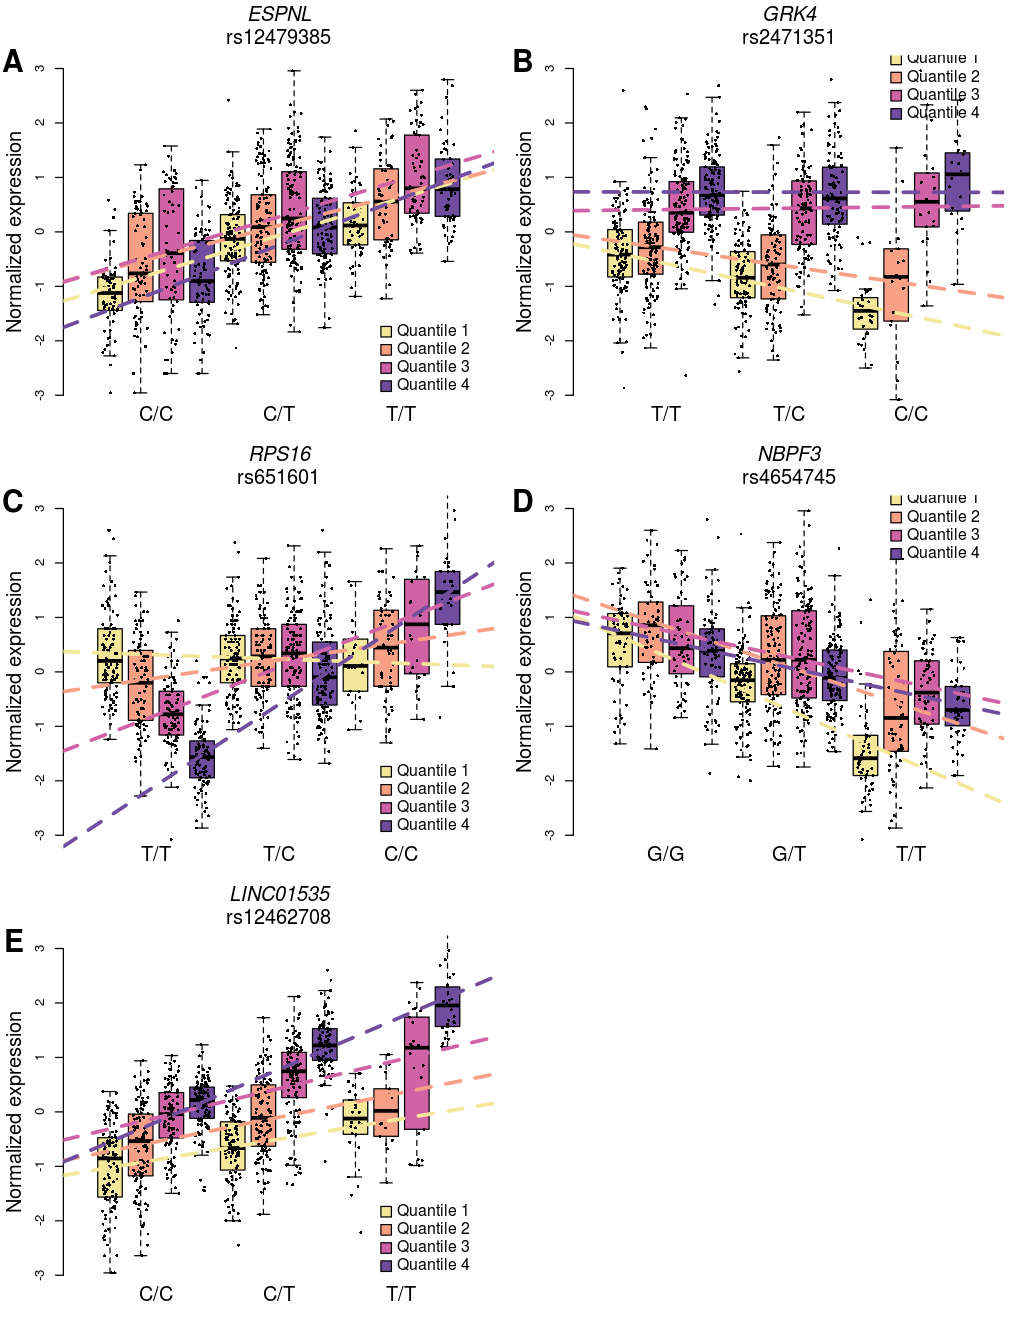

In [100]:
plot_celltype_binary = function(transcript_id, source, id, cell, colordata, legend = FALSE, panel = "")
{
    if(source == "tpm_gene"   ){phenotype = "rna"}
    if(source == "use_isoform"){phenotype = "isoform"}
    
    gtdata      = add_rownames(fread(paste("/frazer01/projects/CARDIPS/analysis/cardiac_eqtls/pipeline/1.3.genotype"  , source, paste("gt_data", transcript_id, "txt", sep = "."), sep = "/"), sep = "\t", header = TRUE , data.table = FALSE))
    gtinfo      =              fread(paste("/frazer01/projects/CARDIPS/analysis/cardiac_eqtls/pipeline/1.3.genotype"  , source, paste("gt_info", transcript_id, "txt", sep = "."), sep = "/"), sep = "\t", header = TRUE , data.table = FALSE)
    gtdata      = data.frame(wgs_id = colnames(gtdata), gt = as.numeric(gtdata[id,]))
    expdata     = exp_data[["expression"]][[phenotype]][["normalized"]][transcript_id,]
    expdata     = data.frame(run = colnames(expdata), norm = as.numeric(expdata[1,]))
    toplot      = merge(exp_data$covariates, exp_data$metadata[,c("run", "wgs_id", "phenotype")], by = "run")
    toplot      = toplot[toplot$phenotype == "rna",]
    toplot      = merge(toplot, expdata, by = "run")
    toplot      = merge(toplot, gtdata , by = "wgs_id"   )
    gtinfo      = gtinfo[gtinfo$id == id,]
    eqtls       = qtl_data[["qtl"]][[phenotype]]
    toplot$cell = toplot[,cell]
    toplot$x    = (toplot$gt * 4 + 1) + toplot$cell
    
    par(mar = c(2,4,3.5,1))
    #plot(1,1, type = "n", xlim = c(0,7), ylim = range(toplot$norm), axes = FALSE, xlab = "", ylab = "")
    plot(1,1, type = "n", xlim = c(0,7), ylim = c(-3,3), axes = FALSE, xlab = "", ylab = "")
    axis(2)
    
    mycolors = c("#bbbbbb", colordata[cell, "color"])
    
    boxplot(norm ~ cell + gt, data = toplot, outline = FALSE, col = rep(mycolors, 3), add = TRUE, at = (1:6), axes = FALSE)
    points (x = jitter(toplot$x, amount = 0.25), y = toplot$norm, pch = 16, cex = 0.5)
    abline (lm(norm ~ x, data = toplot[toplot$cell == 0,]), lty = "dashed", col = mycolors[[1]], lwd = 3)
    abline (lm(norm ~ x, data = toplot[toplot$cell == 1,]), lty = "dashed", col = mycolors[[2]], lwd = 3)
    
    gt1  = gtinfo[1, "ref" ]
    gt2  = gtinfo[1, "alt" ]
    rsid = gtinfo[1, "rsid"]
    gene = unique(eqtls[eqtls$transcript_id == transcript_id & eqtls$id == id, "gene_name"])
    gts  = c(paste(gt1, gt1, sep = "/"), paste(gt1, gt2, sep = "/"), paste(gt2, gt2, sep = "/"))
    
    if(source == "use_isoform"){gene = paste0(transcript_id, " (", gene, ")")}
    
    mtext(gts                    , side = 1, line =  0  , at = c(1.5, 3.5, 5.5))
    mtext(gene                   , side = 3, line =  2  , font = 3)
    mtext(rsid                   , side = 3, line =  0.5)
    mtext("Normalized expression", side = 2, line =  2.5)
    #mtext(text = panel           , side = 2, line =  2.5, las = 2, at = max(toplot$norm) * 1.05, font = 2, cex = 1.5)
    mtext(text = panel           , side = 2, line =  2.5, las = 2, at = 3 * 1.05, font = 2, cex = 1.5)
    
    if(legend == TRUE)
    {
        mylabs = c("All other samples", colordata[cell, "tissue"])
        
        if (cell == "ipsc_cvpc"      ){mylabs[[1]] = "Adult"         }
        if (cell == "heart_ventricle"){mylabs[[2]] = "Left ventricle"}
        
        myoffset = 0
        if(eqtls[eqtls$transcript_id == transcript_id & eqtls$id == id, "beta"] > 0){myoffset = 5}
        points(x = rep(0  , 2), y = c(-2.7, -2.3) + myoffset, pch = 22, bg = mycolors, cex = 2)
        text  (x = rep(0.1, 2), y = c(-2.7, -2.3) + myoffset, labels = mylabs, pos = 4, cex = 1.2)
    }
}

plot_celltype_quantile = function(transcript_id, source, id, cell, colordata, legend = FALSE, panel = "", quantiles = 4)
{
    if(source == "tpm_gene"){phenotype = "rna"}
    
    gtdata   = add_rownames(fread(paste("/frazer01/projects/CARDIPS/analysis/cardiac_eqtls/pipeline/1.3.genotype"  , source, paste("gt_data", transcript_id, "txt", sep = "."), sep = "/"), sep = "\t", header = TRUE , data.table = FALSE))
    gtinfo   =              fread(paste("/frazer01/projects/CARDIPS/analysis/cardiac_eqtls/pipeline/1.3.genotype"  , source, paste("gt_info", transcript_id, "txt", sep = "."), sep = "/"), sep = "\t", header = TRUE , data.table = FALSE)
    gtdata   = data.frame(wgs_id = colnames(gtdata), gt = as.numeric(gtdata[id,]))
    expdata  = exp_data[["expression"]][[phenotype]][["normalized"]][transcript_id,]
    expdata  = data.frame(run = colnames(expdata), norm = as.numeric(expdata[1,]))
    toplot   = merge(exp_data$covariates, exp_data$metadata[,c("run", "wgs_id", "phenotype")], by = "run")
    toplot   = toplot[toplot$phenotype == "rna",]
    toplot   = merge(toplot, expdata, by = "run")
    toplot   = merge(toplot, gtdata , by = "wgs_id"   )
    gtinfo   = gtinfo[gtinfo$id == id,]
    eqtls    = qtl_data[["qtl"]][[phenotype]]
    
    toplot$cell     = toplot[,cell]
    toplot          = toplot[order(toplot$cell),]
    quantiles       = round((1:quantiles) / quantiles * nrow(toplot), digits = 0)
    toplot$quantile = 0
    
    for(ii in 1:length(quantiles))
    {
        x1 = quantiles[[ii]]
        x0 = 1
        if (ii > 1){x0 = quantiles[[ii - 1]] + 1}
        
        toplot[x0:x1, "quantile"] = ii
    }
    
    toplot$gt_quantile = paste(toplot$gt, toplot$quantile)
    tobox              = aggregate(norm ~ quantile + gt + gt_quantile, data = toplot, mean)
    tobox              = tobox[order(tobox$gt, tobox$quantile),]
    tobox$x            = 1:nrow(tobox)
    toplot             = merge(toplot, tobox[,c("gt_quantile", "x")])
    quantile2color     = data.frame(quantile = sort(unique(toplot$quantile)), color = sequential_hcl(n = length(unique(toplot$quantile)), palette = "Sunset", rev = TRUE))
    
    par(mar = c(2,4,3.5,1))
    #plot(1,1, type = "n", xlim = c(0,max(toplot$x + 1)), ylim = range(toplot$norm), axes = FALSE, xlab = "", ylab = "")
    plot(1,1, type = "n", xlim = c(0,max(toplot$x + 1)), ylim = c(-3,3), axes = FALSE, xlab = "", ylab = "")
    axis(2)
    
    boxplot(norm ~ quantile + gt, data = toplot, outline = FALSE, col = rep(quantile2color$color, 3), add = TRUE, at = tobox$x, axes = FALSE)
    points (x = jitter(toplot$x, amount = 0.25), y = toplot$norm, pch = 16, cex = 0.5)
    
    invisible(lapply(1:nrow(quantile2color), function(ii)
    {
        this = toplot[toplot$quantile == quantile2color[ii, "quantile"],]
        
        abline (lm(norm ~ x, data = this), lty = "dashed", col = quantile2color[ii, "color"], lwd = 3)
    }))
    
    gt1       = gtinfo[1, "ref" ]
    gt2       = gtinfo[1, "alt" ]
    rsid      = gtinfo[1, "rsid"]
    this_eqtl = eqtls[eqtls$transcript_id == transcript_id & eqtls$id == id, ]
    gene      = unique(this_eqtl[, "gene_name"])
    gts       = c(paste(gt1, gt1, sep = "/"), paste(gt1, gt2, sep = "/"), paste(gt2, gt2, sep = "/"))
    
    mtext(gts                    , side = 1, line =  0  , at = aggregate(x ~ gt, data = tobox, FUN = mean)$x)
    mtext(gene                   , side = 3, line =  2  , font = 3)
    mtext(rsid                   , side = 3, line =  0.5)
    #mtext(cell                   , side = 3, line = -1  )
    mtext("Normalized expression", side = 2, line =  2.5)
    #mtext(text = panel           , side = 2, line =  2.5, las = 2, at = max(toplot$norm) * 1.05, font = 2, cex = 1.5)
    mtext(text = panel           , side = 2, line =  2.5, las = 2, at = 3 * 1.05, font = 2, cex = 1.5)

    if(legend == TRUE)
    {
        myoffset = 0
        if(eqtls[eqtls$transcript_id == transcript_id & eqtls$id == id, "beta"] < 0){myoffset = 5}
        points(x = rep(10  , nrow(quantile2color)), y = -((1:nrow(quantile2color)) / 3) - 1.5 + myoffset, pch = 22, bg = quantile2color$color, cex = 2)
        text  (x = rep(10.1, nrow(quantile2color)), y = -((1:nrow(quantile2color)) / 3) - 1.5 + myoffset, labels = paste("Quantile", quantile2color$quantile), pos = 4, cex = 1.2)
    }
}

figure_s1 = function(size_x = 8.5, size_y = 11,to_png = FALSE)
{
    if(to_png == TRUE ){png(filename = paste(outfolder, "Figure_S1.png", sep = "/"), width = size_x, height = size_y, units = "in", res = 300)}
    if(to_png == FALSE){options(repr.plot.width = size_x, repr.plot.height = size_y)}
    
    layout(matrix(1:6, nrow = 3, byrow = TRUE))
    
    plot_celltype_binary ("ENSG00000197728.11_7", "tpm_gene", "VAR_12_56435929_C_G" , "ipsc_cvpc", add_rownames(exp_data$color$by_tissue), TRUE, "A")
    plot_celltype_binary ("ENSG00000130177.16_5", "tpm_gene", "VAR_13_114998076_C_T", "ipsc_cvpc", add_rownames(exp_data$color$by_tissue), TRUE, "B")
    plot_celltype_binary ("ENSG00000099974.8_5" , "tpm_gene", "VAR_22_24269459_G_T" , "ipsc_cvpc", add_rownames(exp_data$color$by_tissue), TRUE, "C")
    plot_celltype_binary ("ENSG00000176681.14_3", "tpm_gene", "VAR_17_44331214_T_C" , "ipsc_cvpc", add_rownames(exp_data$color$by_tissue), TRUE, "D")
    plot_celltype_binary ("ENSG00000196756.13_9", "tpm_gene", "VAR_20_37050753_A_G" , "ipsc_cvpc", add_rownames(exp_data$color$by_tissue), TRUE, "E")
    
    if(to_png == TRUE ){dev.off()}
}

figure_s2 = function(size_x = 8.5, size_y = 11,to_png = FALSE)
{
    if(to_png == TRUE ){png(filename = paste(outfolder, "Figure_S2.png", sep = "/"), width = size_x, height = size_y, units = "in", res = 300)}
    if(to_png == FALSE){options(repr.plot.width = size_x, repr.plot.height = size_y)}
    
    layout(matrix(1:6, nrow = 3, byrow = TRUE))
    
    plot_celltype_binary ("ENSG00000237651.6_5"  , "tpm_gene", "VAR_2_61372298_C_G"  , "heart_ventricle",  add_rownames(exp_data$color$by_tissue), TRUE, "A")
    plot_celltype_binary ("ENSG00000224897.8_9"  , "tpm_gene", "VAR_7_124647458_C_CT", "heart_ventricle",  add_rownames(exp_data$color$by_tissue), TRUE, "B")
    plot_celltype_binary ("ENSG00000154065.17_5" , "tpm_gene", "VAR_18_21270434_C_A" , "heart_ventricle",  add_rownames(exp_data$color$by_tissue), TRUE, "C")
    plot_celltype_binary ("ENSG00000164308.17_9" , "tpm_gene", "VAR_5_96252432_G_A"  , "heart_ventricle",  add_rownames(exp_data$color$by_tissue), TRUE, "D")
    plot_celltype_binary ("ENSG00000093072.18_11", "tpm_gene", "VAR_22_17680519_A_C" , "heart_ventricle",  add_rownames(exp_data$color$by_tissue), TRUE, "E")

    if(to_png == TRUE ){dev.off()}
}

figure_s3 = function(size_x = 8.5, size_y = 11,to_png = FALSE)
{
    if(to_png == TRUE ){png(filename = paste(outfolder, "Figure_S3.png", sep = "/"), width = size_x, height = size_y, units = "in", res = 300)}
    if(to_png == FALSE){options(repr.plot.width = size_x, repr.plot.height = size_y)}
    
    layout(matrix(1:6, nrow = 3, byrow = TRUE))
    
    plot_celltype_quantile("ENSG00000144488.15_4", "tpm_gene", "VAR_2_239035853_C_T", "cibersort.regular.cardiac_muscle", add_rownames(exp_data$color$by_tissue), TRUE, "A")
    plot_celltype_quantile("ENSG00000125388.20_7", "tpm_gene", "VAR_4_2984903_T_C"  , "cibersort.regular.cardiac_muscle", add_rownames(exp_data$color$by_tissue), TRUE, "B")
    plot_celltype_quantile("ENSG00000105193.9_5" , "tpm_gene", "VAR_19_39926825_T_C", "cibersort.regular.cardiac_muscle", add_rownames(exp_data$color$by_tissue), TRUE, "C")
    plot_celltype_quantile("ENSG00000142794.18_4", "tpm_gene", "VAR_1_21767096_G_T" , "cibersort.regular.cardiac_muscle", add_rownames(exp_data$color$by_tissue), TRUE, "D")
    plot_celltype_quantile("ENSG00000226686.8_6" , "tpm_gene", "VAR_19_37797578_C_T", "cibersort.regular.cardiac_muscle", add_rownames(exp_data$color$by_tissue), TRUE, "E")
    
    if(to_png == TRUE ){dev.off()}
}

figure_s1(to_png = FALSE)
figure_s1(to_png = TRUE )

figure_s2(to_png = FALSE)
figure_s2(to_png = TRUE )

figure_s3(to_png = FALSE)
figure_s3(to_png = TRUE )


## Figure 2: eQTLs and cell type associations

png 
  2

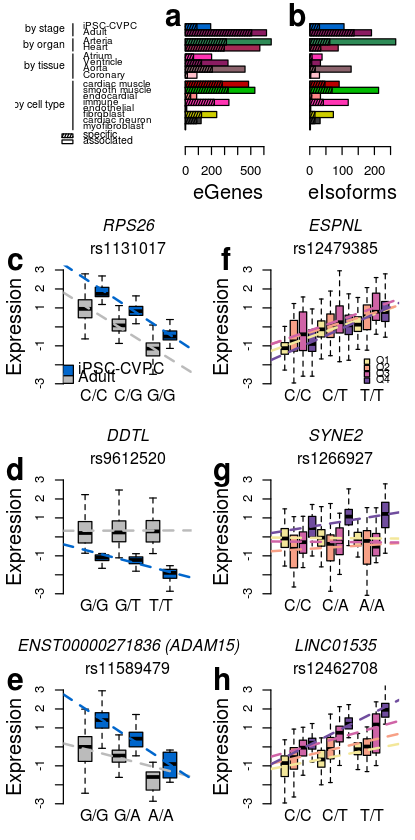

In [279]:
plot_celltype_binary_main = function(transcript_id, source, id, cell, colordata, legend = FALSE, panel = "")
{
    if(source == "tpm_gene"   ){phenotype = "rna"}
    if(source == "use_isoform"){phenotype = "isoform"}
    
    gtdata      = add_rownames(fread(paste("/frazer01/projects/CARDIPS/analysis/cardiac_eqtls/pipeline/1.3.genotype"  , source, paste("gt_data", transcript_id, "txt", sep = "."), sep = "/"), sep = "\t", header = TRUE , data.table = FALSE))
    gtinfo      =              fread(paste("/frazer01/projects/CARDIPS/analysis/cardiac_eqtls/pipeline/1.3.genotype"  , source, paste("gt_info", transcript_id, "txt", sep = "."), sep = "/"), sep = "\t", header = TRUE , data.table = FALSE)
    gtdata      = data.frame(wgs_id = colnames(gtdata), gt = as.numeric(gtdata[id,]))
    expdata     = exp_data[["expression"]][[phenotype]][["normalized"]][transcript_id,]
    expdata     = data.frame(run = colnames(expdata), norm = as.numeric(expdata[1,]))
    toplot      = merge(exp_data$covariates, exp_data$metadata[,c("run", "wgs_id", "phenotype")], by = "run")
    toplot      = toplot[toplot$phenotype == "rna",]
    toplot      = merge(toplot, expdata, by = "run")
    toplot      = merge(toplot, gtdata , by = "wgs_id"   )
    gtinfo      = gtinfo[gtinfo$id == id,]
    eqtls       = qtl_data[["qtl"]][[phenotype]]
    toplot$cell = toplot[,cell]
    toplot$x    = (toplot$gt * 4 + 1) + toplot$cell
    
    par(mar = c(2,4,3.5,1))
    #plot(1,1, type = "n", xlim = c(0,7), ylim = range(toplot$norm), axes = FALSE, xlab = "", ylab = "")
    plot(1,1, type = "n", xlim = c(0,7), ylim = c(-3,3), axes = FALSE, xlab = "", ylab = "")
    axis(2)
    
    mycolors = c("#bbbbbb", colordata[cell, "color"])
    
    boxplot(norm ~ cell + gt, data = toplot, outline = FALSE, col = rep(mycolors, 3), add = TRUE, at = (1:6), axes = FALSE)
    #points (x = jitter(toplot$x, amount = 0.25), y = toplot$norm, pch = 16, cex = 0.5)
    abline (lm(norm ~ x, data = toplot[toplot$cell == 0,]), lty = "dashed", col = mycolors[[1]], lwd = 2)
    abline (lm(norm ~ x, data = toplot[toplot$cell == 1,]), lty = "dashed", col = mycolors[[2]], lwd = 2)
    
    gt1  = gtinfo[1, "ref" ]
    gt2  = gtinfo[1, "alt" ]
    rsid = gtinfo[1, "rsid"]
    gene = unique(eqtls[eqtls$transcript_id == transcript_id & eqtls$id == id, "gene_name"])
    gts  = c(paste(gt1, gt1, sep = "/"), paste(gt1, gt2, sep = "/"), paste(gt2, gt2, sep = "/"))
    
    if(source == "use_isoform"){gene = paste0(unlist(strsplit(transcript_id, "\\."))[[1]], " (", gene, ")")}
    
    mtext(gts         , side = 1, line =  0  , cex = 0.8, at = c(1.5, 3.5, 5.5))
    mtext(gene        , side = 3, line =  2  , cex = 0.8, font = 3)
    mtext(rsid        , side = 3, line =  0.5, cex = 0.8)
    mtext("Expression", side = 2, line =  2.5, cex = 1  )
    mtext(text = panel, side = 2, line =  2.5, cex = 1.5, las = 2, at = 3 * 1.2, font = 2)
    
    if(legend == TRUE)
    {
        mylabs = c("All other samples", colordata[cell, "tissue"])
        
        if (cell == "ipsc_cvpc"      ){mylabs[[1]] = "Adult"         }
        if (cell == "heart_ventricle"){mylabs[[2]] = "Left ventricle"}
        
        myoffset = 0
        if(eqtls[eqtls$transcript_id == transcript_id & eqtls$id == id, "beta"] > 0){myoffset = 5}
        points(x = rep(0  , 2), y = c(-2.7, -2.3) + myoffset, pch = 22, bg = mycolors, cex = 2)
        text  (x = rep(0.1, 2), y = c(-2.7, -2.3) + myoffset, labels = mylabs, pos = 4, cex = 1.2)
    }
}

plot_celltype_quantile_main = function(transcript_id, source, id, cell, colordata, legend = FALSE, panel = "", quantiles = 4)
{
    if(source == "tpm_gene"){phenotype = "rna"}
    
    gtdata   = add_rownames(fread(paste("/frazer01/projects/CARDIPS/analysis/cardiac_eqtls/pipeline/1.3.genotype"  , source, paste("gt_data", transcript_id, "txt", sep = "."), sep = "/"), sep = "\t", header = TRUE , data.table = FALSE))
    gtinfo   =              fread(paste("/frazer01/projects/CARDIPS/analysis/cardiac_eqtls/pipeline/1.3.genotype"  , source, paste("gt_info", transcript_id, "txt", sep = "."), sep = "/"), sep = "\t", header = TRUE , data.table = FALSE)
    gtdata   = data.frame(wgs_id = colnames(gtdata), gt = as.numeric(gtdata[id,]))
    expdata  = exp_data[["expression"]][[phenotype]][["normalized"]][transcript_id,]
    expdata  = data.frame(run = colnames(expdata), norm = as.numeric(expdata[1,]))
    toplot   = merge(exp_data$covariates, exp_data$metadata[,c("run", "wgs_id", "phenotype")], by = "run")
    toplot   = toplot[toplot$phenotype == "rna",]
    toplot   = merge(toplot, expdata, by = "run")
    toplot   = merge(toplot, gtdata , by = "wgs_id"   )
    gtinfo   = gtinfo[gtinfo$id == id,]
    eqtls    = qtl_data[["qtl"]][[phenotype]]
    
    toplot$cell     = toplot[,cell]
    toplot          = toplot[order(toplot$cell),]
    quantiles       = round((1:quantiles) / quantiles * nrow(toplot), digits = 0)
    toplot$quantile = 0
    
    for(ii in 1:length(quantiles))
    {
        x1 = quantiles[[ii]]
        x0 = 1
        if (ii > 1){x0 = quantiles[[ii - 1]] + 1}
        
        toplot[x0:x1, "quantile"] = ii
    }
    
    toplot$gt_quantile = paste(toplot$gt, toplot$quantile)
    tobox              = aggregate(norm ~ quantile + gt + gt_quantile, data = toplot, mean)
    tobox              = tobox[order(tobox$gt, tobox$quantile),]
    tobox$x            = 1:nrow(tobox)
    toplot             = merge(toplot, tobox[,c("gt_quantile", "x")])
    quantile2color     = data.frame(quantile = sort(unique(toplot$quantile)), color = sequential_hcl(n = length(unique(toplot$quantile)), palette = "Sunset", rev = TRUE))
    
    par(mar = c(2,4,3.5,1))
    #plot(1,1, type = "n", xlim = c(0,max(toplot$x + 1)), ylim = range(toplot$norm), axes = FALSE, xlab = "", ylab = "")
    plot(1,1, type = "n", xlim = c(0,max(toplot$x + 1)), ylim = c(-3,3), axes = FALSE, xlab = "", ylab = "")
    axis(2)
    
    boxplot(norm ~ quantile + gt, data = toplot, outline = FALSE, col = rep(quantile2color$color, 3), add = TRUE, at = tobox$x, axes = FALSE)
    #points (x = jitter(toplot$x, amount = 0.25), y = toplot$norm, pch = 16, cex = 0.5)
    
    invisible(lapply(1:nrow(quantile2color), function(ii)
    {
        this = toplot[toplot$quantile == quantile2color[ii, "quantile"],]
        
        abline (lm(norm ~ x, data = this), lty = "dashed", col = quantile2color[ii, "color"], lwd = 2)
    }))
    
    gt1       = gtinfo[1, "ref" ]
    gt2       = gtinfo[1, "alt" ]
    rsid      = gtinfo[1, "rsid"]
    this_eqtl = eqtls[eqtls$transcript_id == transcript_id & eqtls$id == id, ]
    gene      = unique(this_eqtl[, "gene_name"])
    gts       = c(paste(gt1, gt1, sep = "/"), paste(gt1, gt2, sep = "/"), paste(gt2, gt2, sep = "/"))
    
    mtext(gts         , side = 1, line =  0  , cex = 0.8, at = aggregate(x ~ gt, data = tobox, FUN = mean)$x)
    mtext(gene        , side = 3, line =  2  , cex = 0.8, font = 3)
    mtext(rsid        , side = 3, line =  0.5, cex = 0.8)
    mtext("Expression", side = 2, line =  2.5, cex = 1  )
    mtext(text = panel, side = 2, line =  2.5, cex = 1.5, las = 2, at = 3 * 1.2, font = 2)

    if(legend == TRUE)
    {
        myoffset = 0
        if(eqtls[eqtls$transcript_id == transcript_id & eqtls$id == id, "beta"] < 0){myoffset = 5}
        points(x = rep(10  , nrow(quantile2color)), y = -((1:nrow(quantile2color)) / 3) - 1.5 + myoffset, pch = 22, bg = quantile2color$color, cex = 1)
        text  (x = rep(10.1, nrow(quantile2color)), y = -((1:nrow(quantile2color)) / 3) - 1.5 + myoffset, labels = paste0("Q", quantile2color$quantile), pos = 4, cex = 0.8)
    }
}

plot_legend_cells = function(colordata)
{
    colordata$by_organ $order  = colordata$by_organ $order + 0.5 + max(colordata$by_stage $order)
    colordata$by_tissue$order  = colordata$by_tissue$order + 0.5 + max(colordata$by_organ $order)
    colordata$by_cell  $order  = colordata$by_cell  $order + 0.5 + max(colordata$by_tissue$order)
    
    toplot = rbind(colordata[["by_stage" ]][,c("name", "color", "order")],
                   colordata[["by_organ" ]][,c("name", "color", "order")],
                   colordata[["by_tissue"]][,c("name", "color", "order")],
                   colordata[["by_cell"  ]][,c("name", "color", "order")]
                  )
    
    par(mar = c(4,1,1,1))
    plot(1,1, type = "n", xlim = c(-0.6,1), ylim = c(max(toplot$order) + 2.5, 0), xlab = "", ylab = "", axes = FALSE)
    
    #points(x = rep(0  , nrow(toplot)), y = toplot$order, bg     = toplot$color , pch = 22, cex = 3)
    text  (x = rep(0.1, nrow(toplot)), y = toplot$order, labels = toplot$name  , pos =  4, cex = 0.75)
    
    segments(x0 = 0.07, y0 = unlist(lapply(colordata, function(x){min(x$order)})) - 0.5, y1 = unlist(lapply(colordata, function(x){max(x$order)})) + 0.5)
    text    (x  = 0.07, y  = unlist(lapply(colordata, function(x){min(x$order) + (max(x$order) - min(x$order)) / 2})), labels = gsub("cell", "cell type", gsub("_", " ", names(colordata))), pos = 2, cex = 0.8)
    
    text(x = rep(0.1, 2), y = max(toplot$order) + c(1.5, 2.5), labels = c("specific", "associated"), pos = 4, cex = 0.8)
    
    rect(xleft = -0.07, xright = 0.07, ybottom = max(toplot$order) + c(1.8, 2.8), ytop = max(toplot$order) + c(1.2, 2.2), density = c(30, 0))
}

plot_qtl_cell = function(phenotype, name, qtl2cell_all, qtl2cell_specific, colordata, phenotypes, panel = "")
{
    colordata$by_organ $order  = colordata$by_organ $order + 0.5 + max(colordata$by_stage $order)
    colordata$by_tissue$order  = colordata$by_tissue$order + 0.5 + max(colordata$by_organ $order)
    colordata$by_cell  $order  = colordata$by_cell  $order + 0.5 + max(colordata$by_tissue$order)
    
    colordata = rbind(colordata[["by_stage" ]][,c("body_site", "name", "color", "order")],
                      colordata[["by_organ" ]][,c("body_site", "name", "color", "order")],
                      colordata[["by_tissue"]][,c("body_site", "name", "color", "order")],
                      colordata[["by_cell"  ]][,c("body_site", "name", "color", "order")]
                     )
    
    toplot                      = colordata
    rownames(toplot)            = toplot$body_site
    qtl2cell_all                = qtl2cell_all     [qtl2cell_all     $phenotype == phenotype, grepl("^by", colnames(qtl2cell_all     ))]
    qtl2cell_specific           = qtl2cell_specific[qtl2cell_specific$phenotype == phenotype, grepl("^by", colnames(qtl2cell_specific))]
    colnames(qtl2cell_all)      = unlist(lapply(colnames(qtl2cell_all     ), function(x){unlist(strsplit(x, ":"))[[2]]}))
    colnames(qtl2cell_specific) = unlist(lapply(colnames(qtl2cell_specific), function(x){unlist(strsplit(x, ":"))[[2]]}))
    toplot$all                  = as.numeric(qtl2cell_all     [1, toplot$body_site])
    toplot$specific             = as.numeric(qtl2cell_specific[1, toplot$body_site])
    
    par(mar = c(4,1,1,1))
    plot(1,1, type = "n", xlim = c(0, max(toplot$all)), ylim = c(max(toplot$order) + 2.5, 0), xlab = "", ylab = "", axes = FALSE)
    axis(1)

    rect   (xleft = 0, xright = toplot$all     , ybottom = toplot$order + 0.5, ytop = toplot$order - 0.5, col = toplot$color)
    rect   (xleft = 0, xright = toplot$specific, ybottom = toplot$order + 0.5, ytop = toplot$order - 0.5, density = 30)
    #barplot(toplot$specific, width = 1, space = 0, ylab = "", axes = FALSE, density = 30, add = TRUE, col = "#000000")
    
    mtext(text = name , side  = 1, line  = 2.5)
    mtext(text = panel, side  = 2, line  = 0  , las = 2, at = -1, font = 2, cex = 1.5)
    
    return(toplot)
    
    
    invisible(lapply(names(colordata), function(x)
    {
        this = colordata[[x]]
        name = gsub("cell", "cell type", gsub("_", " ", x))
        
        #if(x == "by_cell"){this$body_site = this$cell_type}
        
        ylims = max(as.numeric(qtl2cell_all[ qtl2cell_all$phenotype == phenotype, grepl("^by_", colnames(qtl2cell_all)) == TRUE]))
        
        toplot_all      = as.numeric(qtl2cell_all     [ qtl2cell_all     $phenotype == phenotype, paste(x, this$body_site, sep = ":")])
        toplot_specific = as.numeric(qtl2cell_specific[ qtl2cell_specific$phenotype == phenotype, paste(x, this$body_site, sep = ":")])

        barplot(toplot_all                        , width = 1, space = 0, ylab = "", ylim = c(0, ylims), col = this$color)
        barplot(toplot_specific                   , width = 1, space = 0, ylab = "", axes = FALSE, density = 30, add = TRUE, col = "#000000")
        mtext(text = phenotypes[phenotype, "name"], side  = 2, line  = 2.5)
        mtext(text = name                         , side  = 1, line  = 0.5)
        mtext(text = panels[[x]]                  , side  = 2, line  = 2.5, las = 2, at = ylims * 0.95, font = 2, cex = 1.5)
    }))
}

figure_2 = function(size_x = 3.46457, size_y = 7,to_png = FALSE)
{
    #if(to_png == TRUE ){png(filename = paste(outfolder, "Figure_2.png", sep = "/"), width = size_x, height = size_y, units = "in", res = 300)}
    if(to_png == TRUE ){pdf(file = paste(outfolder, "Figure_2.pdf", sep = "/"), width = size_x, height = size_y)}
    if(to_png == FALSE){options(repr.plot.width = size_x, repr.plot.height = size_y)}
    
    tolayout = rbind(c(1,1,1,1,2,2,2,3,3,3),
                     sort(rep(c(4,7    ), 5)),
                     sort(rep(c(5,8    ), 5)),
                     sort(rep(c(6,9    ), 5))
                    )
    #layout(rbind(sort(rep(1:3   , 2)),
    #             sort(rep(c(4,7), 3)),
    #             sort(rep(c(5,8), 3)),
    #             sort(rep(c(6,9), 3))
    #            ))
    
    layout(tolayout)
    
    
    plot_legend_cells(colordata)
    plot_qtl_cell("rna"    , "eGenes"   , qtl2cell_list$all, qtl2cell_list$specific, colordata, qtl_data$phenotypes, "a")
    plot_qtl_cell("isoform", "eIsoforms", qtl2cell_list$all, qtl2cell_list$specific, colordata, qtl_data$phenotypes, "b")
    
    plot_celltype_binary_main("ENSG00000197728.11_7", "tpm_gene"   , "VAR_12_56435929_C_G" , "ipsc_cvpc", add_rownames(exp_data$color$by_tissue), TRUE , "c")
    plot_celltype_binary_main("ENSG00000099974.8_5" , "tpm_gene"   , "VAR_22_24269459_G_T" , "ipsc_cvpc", add_rownames(exp_data$color$by_tissue), FALSE, "d")
    plot_celltype_binary_main("ENST00000271836.10_1", "use_isoform", "VAR_1_155033308_G_A" , "ipsc_cvpc", add_rownames(exp_data$color$by_tissue), FALSE, "e")
    
    plot_celltype_quantile_main("ENSG00000144488.15_4", "tpm_gene", "VAR_2_239035853_C_T", "cibersort.regular.cardiac_muscle", add_rownames(exp_data$color$by_tissue), TRUE , "f")
    plot_celltype_quantile_main("ENSG00000054654.18_8", "tpm_gene", "VAR_14_64651663_C_A", "cibersort.regular.cardiac_muscle", add_rownames(exp_data$color$by_tissue), FALSE, "g")
    plot_celltype_quantile_main("ENSG00000226686.8_6" , "tpm_gene", "VAR_19_37797578_C_T", "cibersort.regular.cardiac_muscle", add_rownames(exp_data$color$by_tissue), FALSE, "h")
	   
    if(to_png == TRUE ){dev.off()}
}

figure_2(to_png = FALSE)
figure_2(to_png = TRUE )


In [137]:
t(qtl2cell_list[["all"]])
t(qtl2cell_list[["specific"]])
t(qtl2cell_list[["associated"]])


[,1]     [,2]    [,3]    [,4]   
phenotype                                atac     chip    isoform rna    
name                                     ATAC-seq H3K27ac Isoform Gene   
color                                    #913640  #1D0B14 #D67500 #E8C167
n_samples                                259      131     966     966    
n                                         6516     6368    7165   11692  
by_tissue:heart_atrium                     0        0      38     201    
by_tissue:heart_ventricle                  0        0      33     326    
by_tissue:arteria_aorta                    0        0     128     456    
by_tissue:arteria_coronary                0        0      30      89     
by_organ:arteria                           0        0     266     656    
by_organ:heart                             0        0      88     569    
by_stage:ipsc_cvpc                         0        0     106     194    
by_stage:adult                             0        0     191     620    
by_cell:cibersort.regular.cardiac_muscle  43       27      91     483    
by_cell:cibersort.regular.smooth_muscle    4        2     213     531    
by_cell:cibersort.regular.endocardial     3       11      33      87     
by_cell:cibersort.regular.immune           0        0     119     333    
by_cell:cibersort.regular.endothelial     3        4       3      11     
by_cell:cibersort.regular.fibroblast       0        0      73     240    
by_cell:cibersort.regular.cardiac_neuron   3        3      32     121    
by_cell:cibersort.regular.myofibroblast  4        6       2       3

[,1]     [,2]    [,3]    [,4]   
phenotype                                atac     chip    isoform rna    
name                                     ATAC-seq H3K27ac Isoform Gene   
color                                    #913640  #1D0B14 #D67500 #E8C167
n_samples                                259      131     966     966    
n                                         6516     6368    7165   11692  
by_tissue:heart_atrium                    0        0       7      63     
by_tissue:heart_ventricle                  0        0       6     124    
by_tissue:arteria_aorta                    0        0      17     206    
by_tissue:arteria_coronary                0        0       3      16     
by_organ:arteria                           0        0      62     314    
by_organ:heart                             0        0      34     298    
by_stage:ipsc_cvpc                        0        0      30      89     
by_stage:adult                             0        0     137     507    
by_cell:cibersort.regular.cardiac_muscle  29       18      47     282    
by_cell:cibersort.regular.smooth_muscle    3        0      69     327    
by_cell:cibersort.regular.endocardial     2        3       6      41     
by_cell:cibersort.regular.immune           0        0      42     222    
by_cell:cibersort.regular.endothelial    3        1       1       6      
by_cell:cibersort.regular.fibroblast       0        0      16     124    
by_cell:cibersort.regular.cardiac_neuron  1        1      16      88     
by_cell:cibersort.regular.myofibroblast  3        3       1       0

[,1]     [,2]    [,3]    [,4]   
phenotype                                atac     chip    isoform rna    
name                                     ATAC-seq H3K27ac Isoform Gene   
color                                    #913640  #1D0B14 #D67500 #E8C167
n_samples                                259      131     966     966    
n                                         6516     6368    7165   11692  
by_tissue:heart_atrium                     0        0      31     138    
by_tissue:heart_ventricle                  0        0      27     202    
by_tissue:arteria_aorta                    0        0     111     250    
by_tissue:arteria_coronary                0        0      27      73     
by_organ:arteria                           0        0     204     342    
by_organ:heart                             0        0      54     271    
by_stage:ipsc_cvpc                         0        0      76     105    
by_stage:adult                             0        0      54     113    
by_cell:cibersort.regular.cardiac_muscle  14        9      44     201    
by_cell:cibersort.regular.smooth_muscle    1        2     144     204    
by_cell:cibersort.regular.endocardial     1        8      27      46     
by_cell:cibersort.regular.immune           0        0      77     111    
by_cell:cibersort.regular.endothelial    0        3       2       5      
by_cell:cibersort.regular.fibroblast       0        0      57     116    
by_cell:cibersort.regular.cardiac_neuron  2        2      16      33     
by_cell:cibersort.regular.myofibroblast  1        3       1       3

In [138]:
qtl2int = rbind(qtl_data$interactions$isoform, qtl_data$interactions$rna)
qtl2int = qtl2int[ qtl2int$cell == TRUE,]
qtl2int$cell_type = "tissue"
qtl2int$phenotype = "rna"

qtl2int[ grepl("cibersort", qtl2int$interaction  ) == TRUE, "cell_type"] = "cell"
qtl2int[ grepl("ENST"     , qtl2int$transcript_id) == TRUE, "phenotype"] = "isoform"

length(unique(qtl2int[ qtl2int$phenotype == "rna"     & qtl2int$cell_type == "tissue", "transcript_id"]))
length(unique(qtl2int[ qtl2int$phenotype == "isoform" & qtl2int$cell_type == "tissue", "transcript_id"]))

length(unique(qtl2int[ qtl2int$phenotype == "rna"     & qtl2int$cell_type == "tissue" & !qtl2int$interaction %in% c("ipsc_cvpc", "adult"), "transcript_id"]))
length(unique(qtl2int[ qtl2int$phenotype == "isoform" & qtl2int$cell_type == "tissue" & !qtl2int$interaction %in% c("ipsc_cvpc", "adult"), "transcript_id"]))

length(unique(qtl2int[ qtl2int$phenotype == "rna"     & qtl2int$cell_type == "cell", "transcript_id"]))
length(unique(qtl2int[ qtl2int$phenotype == "isoform" & qtl2int$cell_type == "cell", "transcript_id"]))

length(unique(qtl2int[ , "transcript_id"]))


[1] 1665

[1] 565

[1] 1246

[1] 350

[1] 1191

[1] 364

[1] 2578

In [139]:
x1 = qtl_data[["interactions"]][["rna"    ]]
x2 = qtl_data[["interactions"]][["isoform"]]

x1[ x1$transcript_id == "ENSG00000197728.11_7" & x1$interaction == "ipsc_cvpc", c("type", "rsid",
                                                                                  paste(c("beta", "se", "pval", "qval"), "1"  , sep = "_"),
                                                                                  paste(c("beta", "se", "pval", "qval"), "0"  , sep = "_"),
                                                                                  paste(c("beta", "se", "pval", "qval"), "int", sep = "_")
                                                                                 )]
x1[ x1$transcript_id == "ENSG00000099974.8_5"  & x1$interaction == "ipsc_cvpc", c("type", "rsid",
                                                                                  paste(c("beta", "se", "pval", "qval"), "1"  , sep = "_"),
                                                                                  paste(c("beta", "se", "pval", "qval"), "0"  , sep = "_"),
                                                                                  paste(c("beta", "se", "pval", "qval"), "int", sep = "_")
                                                                                 )]
x2[ x2$transcript_id == "ENST00000271836.10_1" & x2$interaction == "ipsc_cvpc", c("type", "rsid",
                                                                                  paste(c("beta", "se", "pval", "qval"), "1"  , sep = "_"),
                                                                                  paste(c("beta", "se", "pval", "qval"), "0"  , sep = "_"),
                                                                                  paste(c("beta", "se", "pval", "qval"), "int", sep = "_")
                                                                                 )]


type rsid       beta_1     se_1      pval_1       qval_1      
264651 0    rs1131017  -2.3636778 0.0725291 6.027311e-77 1.086724e-72
264652 1    rs55927117 -0.4225523 0.2241536 6.104562e-02 1.877926e-01
       beta_0      se_0       pval_0        qval_0        beta_int    
264651 -2.22076076 0.05315553 1.320827e-201 1.190726e-197  0.002003387
264652 -0.09958602 0.10597480  3.476536e-01  4.495263e-01 -0.219877602
       se_int    pval_int  qval_int
264651 0.2098937 1.0000000 1       
264652 0.2984228 0.4520694 1

type rsid      beta_1     se_1       pval_1     qval_1       beta_0    
254124 0    rs9612520 -0.9324552 0.07223813 2.4868e-27 8.006609e-25 0.00945265
       se_0       pval_0    qval_0    beta_int   se_int     pval_int    
254124 0.07535582 0.9002072 0.9284059 -0.9007465 0.06636078 1.955281e-42
       qval_int    
254124 3.525371e-38

type rsid       beta_1     se_1      pval_1       qval_1      
119404 0    rs11589479 -2.3175699 0.2075464 2.778042e-22 1.133788e-20
119405 1    rs41264285  0.1686583 0.2764380 5.425654e-01 6.321490e-01
       beta_0     se_0      pval_0       qval_0       beta_int  se_int   
119404 -0.9234961 0.1213744 7.947806e-14 3.727565e-13 -1.089366 0.2126129
119405 -0.3247071 0.0996360 1.166520e-03 1.567989e-03  0.409278 0.2326501
       pval_int     qval_int   
119404 2.612211e-07 0.002217506
119405 7.516665e-02 1.000000000

In [140]:
x1 = qtl_data[["interactions"]][["rna"    ]]

x1[ x1$transcript_id == "ENSG00000144488.15_4" & x1$interaction == "cibersort.regular.cardiac_muscle", c("type", "rsid",
                                                                                  paste(c("beta", "se", "pval", "qval"), "1"  , sep = "_"),
                                                                                  paste(c("beta", "se", "pval", "qval"), "0"  , sep = "_"),
                                                                                  paste(c("beta", "se", "pval", "qval"), "int", sep = "_")
                                                                                 )]
x1[ x1$transcript_id == "ENSG00000054654.18_8"  & x1$interaction == "cibersort.regular.cardiac_muscle", c("type", "rsid",
                                                                                  paste(c("beta", "se", "pval", "qval"), "1"  , sep = "_"),
                                                                                  paste(c("beta", "se", "pval", "qval"), "0"  , sep = "_"),
                                                                                  paste(c("beta", "se", "pval", "qval"), "int", sep = "_")
                                                                                 )]
x1[ x1$transcript_id == "ENSG00000226686.8_6"  & x1$interaction == "cibersort.regular.cardiac_muscle", c("type", "rsid",
                                                                                  paste(c("beta", "se", "pval", "qval"), "1"  , sep = "_"),
                                                                                  paste(c("beta", "se", "pval", "qval"), "0"  , sep = "_"),
                                                                                  paste(c("beta", "se", "pval", "qval"), "int", sep = "_")
                                                                                 )]


type rsid       beta_1   se_1      pval_1       qval_1       beta_0  
60618 0    rs12479385 1.720377 0.1320881 1.090931e-29 2.287150e-27 1.413519
60619 1    rs13382446 2.324209 0.1883914 2.079495e-27 3.675814e-25 2.146964
      se_0      pval_0       qval_0       beta_int     se_int    pval_int 
60618 0.1062814 1.594774e-32 1.969437e-30 -0.002752086 0.1121827 1.0000000
60619 0.1649635 1.867499e-31 2.200719e-29 -0.057655900 0.1691500 0.7663672
      qval_int
60618 1       
60619 1

type rsid      beta_1    se_1      pval_1       qval_1       beta_0    
54681 0    rs1266927 0.6223175 0.1441978 2.327019e-05 0.0002295194 0.01734543
      se_0       pval_0    qval_0    beta_int  se_int     pval_int    
54681 0.09402889 0.8537605 0.9053285 0.4445804 0.05469167 6.591001e-16
      qval_int    
54681 1.188357e-11

type rsid       beta_1     se_1       pval_1       qval_1      
67753 0    rs12462708  1.9340767 0.09388933 5.573675e-55 1.256167e-51
67754 1    rs11672037 -0.9524661 0.25332537 2.136149e-04 1.606790e-03
      beta_0     se_0      pval_0       qval_0       beta_int   se_int   
67753  0.8503043 0.1124512 4.111674e-13 1.005882e-11  0.9773268 0.1321554
67754 -0.8700189 0.1832726 3.097849e-06 2.686591e-05 -0.2806676 0.2312345
      pval_int     qval_int    
67753 2.473743e-13 4.460158e-09
67754 2.222346e-01 1.000000e+00

## Figure S4: enrichment of cell type associated eQTLs for cell type-associated snATAC peaks

In [141]:
snatac_gene            = fread("pipeline/eqtl.1.cell_type_validation/tests.gene.txt"   , sep = "\t", header = TRUE, data.table = FALSE)
snatac_isof            = fread("pipeline/eqtl.1.cell_type_validation/tests.isoform.txt", sep = "\t", header = TRUE, data.table = FALSE)
cells_snatac           = fread("pipeline/eqtl.1.cell_type_validation/cells_snatac.txt ", sep = "\t", header = TRUE, data.table = FALSE)
cells_snatac$order     = c(7,1,2,6,3,4,5,9,8)
cells_snatac           = cells_snatac[order(cells_snatac$order),]
rownames(cells_snatac) = cells_snatac$cell_type

png 
  2

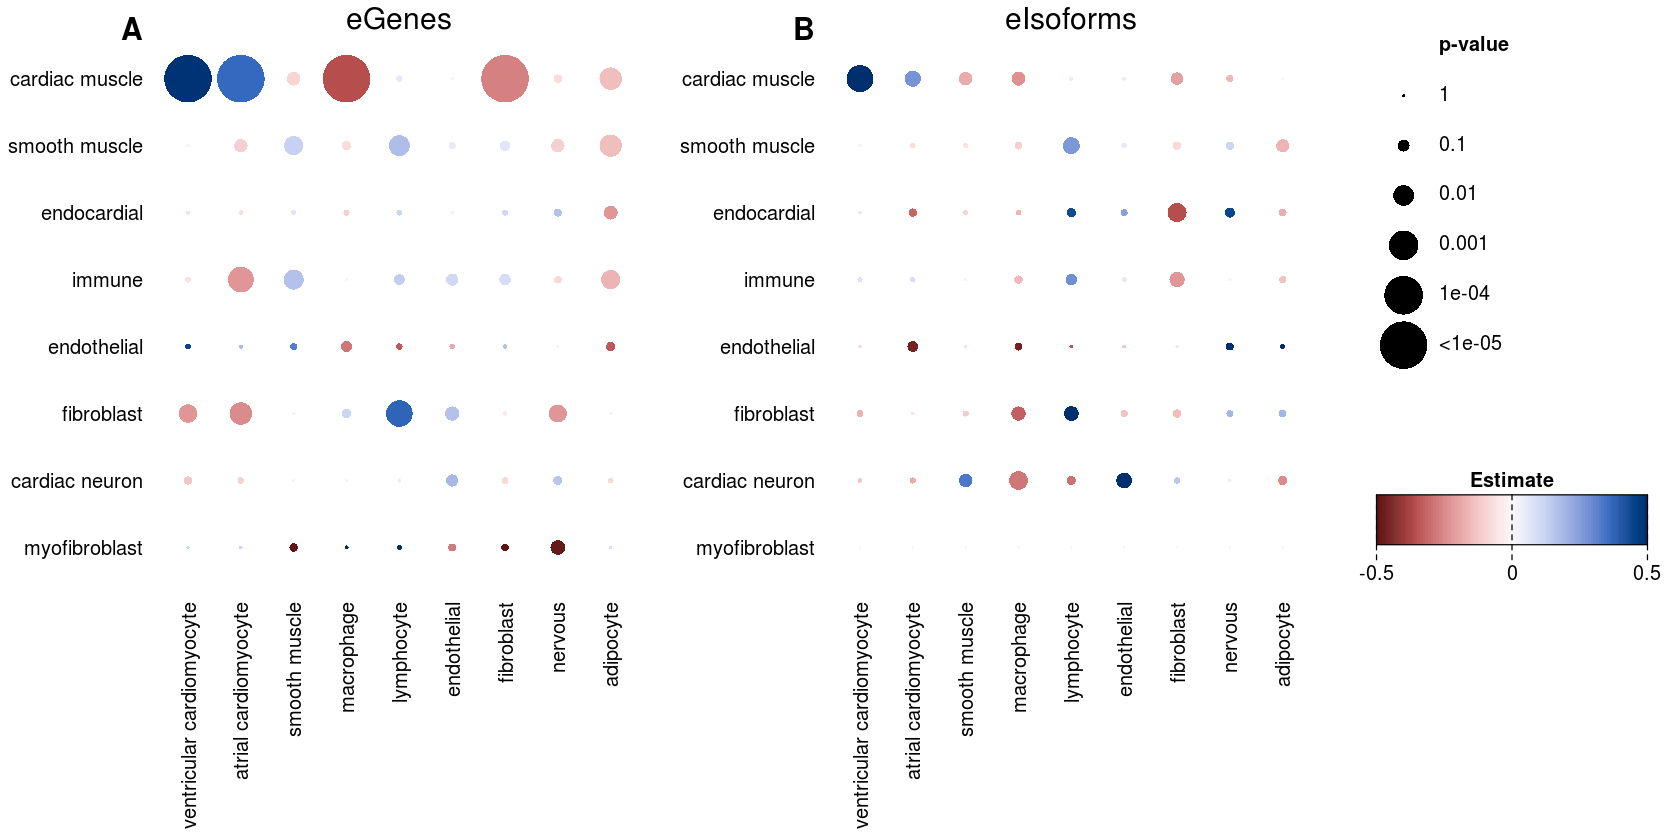

In [142]:
bubble_plot_enrichment = function(x, name = "", panel = "")
{
    toplot   = as.data.frame(matrix(0, nrow = nrow(colordata_cell), ncol = nrow(cells_snatac), dimnames = list(colordata_cell$body_site, cells_snatac$cell_type)))
    toplot_p = toplot
    toplot_e = toplot
    
    if(nrow(x[is.na(x$estimate) == TRUE,]) > 0){x[is.na(x$estimate) == TRUE, "estimate"] =  0}
    
    if(nrow(x[x$estimate >  0.5,]) > 0){x[x$estimate >  0.5, "estimate"] =  0.5}
    if(nrow(x[x$estimate < -0.5,]) > 0){x[x$estimate < -0.5, "estimate"] = -0.5}
    if(nrow(x[x$pval     < 1e-5,]) > 0){x[x$pval     < 1e-5, "pval"    ] = 1e-5}
    
    par(mar = c(15,9,1.5,1))
    plot(1,1, type = "n", xlim = c(0, ncol(toplot)), ylim = c(nrow(toplot), 0), xlab = "", ylab = "", axes = FALSE)
    mtext(text = tolower(cells_snatac  $cell_type2), side = 1, line =  0  , cex = 1  , las = 2, at = cells_snatac  $order - 0.5)
    mtext(text =         colordata_cell$name       , side = 2, line =  0  , cex = 1  , las = 2, at = colordata_cell$order - 0.5)
    mtext(text = panel                             , side = 2, line  = 0  , cex = 1.5, las = 2, at = -0.25, font = 2)
    mtext(text = name                              , side = 3, line = -0.5, cex = 1.5)
    
    for(cell in cells_snatac$cell_type)
    {
        this           = x[x$cell_snatac == cell,]
        rownames(this) = this$cell_eqtl
        toplot_p[this$cell_eqtl, cell] = this$pval
        toplot_e[this$cell_eqtl, cell] = this$estimate
        
        xx = cells_snatac[cell, "order"]
        
        points(x = rep(xx, nrow(colordata_cell)) - 0.5, y = colordata_cell$order - 0.5, pch = 16, cex = -log10(this$pval) * 1.5 + 0.5, col = values2color(this$estimate, colorscale = diverge_hcl(n = 100, palette = "Blue-Red 3", rev = TRUE), minval = -0.5, maxval = 0.5))
    }
}

figure_s4_legend = function()
{
    par(mar = c(1,1,1,1))
    plot(1,1, type = "n", xlim = c(-0.02,1.02), ylim = c(15,0), xlab = "", ylab = "", axes = FALSE)
    
    pvals    = 10^(-(0:5))
    topoints = data.frame(pval = pvals, name = pvals, cex = -log10(pvals) * 1.5 + 0.5, y = (1:length(pvals)))
    topoints[nrow(topoints), "name"] = paste0("<", topoints[nrow(topoints), "name"])
    
    points(x = rep(0.1, nrow(topoints)), y = topoints$y, cex = topoints$cex, pch = 16, col = "#000000")
    text  (x = rep(0.2, nrow(topoints)), y = topoints$y, cex = 1.5         , labels = topoints$name, pos = 4)
    
    
    torect = data.frame(x1 = (1:100) / 100, x2 = (0:99) / 100, col = values2color((-49:50) / 100, colorscale = diverge_hcl(n = 100, palette = "Blue-Red 3", rev = TRUE), minval = -0.5, maxval = 0.5))
    
    rect(xleft = torect$x1, xright = torect$x2, ybottom = 9, ytop = 10, border = NA, col = torect$col)
    
    rect(xleft = 0, xright = 1, ybottom = 9, ytop = 10)
    segments(x0 = c(0, 0.5, 1), y0 = 9, y1 = 10.3, lty = "dashed")
    text    (x  = c(0, 0.5, 1),         y  = 10.3, labels = c(-0.5, 0, 0.5), cex = 1.5, pos = 1)
    
    text(x = 0.5, y = 9, labels = "Estimate", pos = 3, cex = 1.5, font = 2)
    text(x = 0.2, y = 0, labels = "p-value" , pos = 4, cex = 1.5, font = 2)
}

figure_s4 = function(size_x = 14, size_y = 7,to_png = FALSE)
{
    if(to_png == TRUE ){png(filename = paste(outfolder, "Figure_S4.png", sep = "/"), width = size_x, height = size_y, units = "in", res = 300)}
    if(to_png == FALSE){options(repr.plot.width = size_x, repr.plot.height = size_y)}
    
    layout(rbind(c(sort(rep(1:2, 2)), 3)))
    
    bubble_plot_enrichment(snatac_gene, name = "eGenes"   , panel = "A")
    bubble_plot_enrichment(snatac_isof, name = "eIsoforms", panel = "B")
    figure_s4_legend      () 

	   
    if(to_png == TRUE ){dev.off()}
}

figure_s4(to_png = FALSE)
figure_s4(to_png = TRUE )


## Figure 3: multiple genes are associated with the same eQTL signal

In [143]:
coloc_dif_unique = fread("pipeline/5.9.coloc_network_only_eqtls/coloc_dif_unique.txt"               , sep = "\t", header = TRUE, data.table = FALSE)
tests_cell       = fread("pipeline/5.9.coloc_network_only_eqtls/enrichment_by_cell.txt"             , sep = "\t", header = TRUE, data.table = FALSE)
perm_cell        = fread("pipeline/5.9.coloc_network_only_eqtls/enrichment_by_cell_permutations.txt", sep = "\t", header = TRUE, data.table = FALSE)
counts           = table(coloc_dif_unique$id)
counts           = data.frame(id = names(counts), n = as.numeric(counts))
counts           = counts[order(counts$n, decreasing = TRUE),]
var2gene_coloc   = unique(rbind(data.frame(id = coloc_dif_unique$id, gene_id = coloc_dif_unique$gene_id1),
                                data.frame(id = coloc_dif_unique$id, gene_id = coloc_dif_unique$gene_id2)
                               ))
counts           = merge(counts, aggregate(gene_id ~ id, data = var2gene_coloc, FUN = function(x){length(unique(x))}))
counts           = merge(counts, aggregate(gene_id ~ id, data = var2gene_coloc, FUN = function(x){paste(sort(unique(coordinates[ coordinates$gene_id %in% x, "gene_name"])), collapse = ", ")}), by = "id", suffixes = c("", "s"))

fwrite(counts, "pipeline/5.9.coloc_network_only_eqtls/counts_by_var.txt", sep = "\t", col.names = TRUE, row.names = FALSE)


In [144]:
str(coloc_dif_unique)

'data.frame':	3622 obs. of  20 variables:
 $ gene_id1      : chr  "ENSG00000001460.18_7" "ENSG00000007516.14_6" "ENSG00000006194.10_5" "ENSG00000006282.21_8" ...
 $ gene_id2      : chr  "ENSG00000001461.17_4" "ENSG00000007520.4_5" "ENSG00000010539.11_7" "ENSG00000011052.21_4" ...
 $ gene_name1    : chr  "STPG1" "BAIAP3" "ZNF263" "SPATA20" ...
 $ gene_name2    : chr  "NIPAL3" "TSR3" "ZNF200" "NME1-NME2" ...
 $ transcript_id1: chr  "ENSG00000001460.18_7" "ENSG00000007516.14_6" "ENSG00000006194.10_5" "ENSG00000006282.21_8" ...
 $ transcript_id2: chr  "ENSG00000001461.17_4" "ENSG00000007520.4_5" "ENSG00000010539.11_7" "ENSG00000011052.21_4" ...
 $ type1         : int  0 1 0 2 0 1 0 2 0 1 ...
 $ type2         : int  0 0 0 0 1 0 1 0 1 0 ...
 $ id            : chr  "VAR_1_24743783_C_T" "VAR_16_1393851_GCTGGGACAGGCCGT_G" "VAR_16_3340845_C_T" "VAR_17_49043348_C_T" ...
 $ chrom         : int  1 16 16 17 17 6 16 11 17 22 ...
 $ pos           : int  24743783 1393851 3340845 49043348 40812797 11189

### enrichment for eQTLs to have eGene/eGene-AS pair

In [145]:
pairs = unique(rbind(eqtl_coloc$isoform        [, c("transcript_id1", "transcript_id2", "PP.H4.abf")],
                     eqtl_coloc$gene           [, c("transcript_id1", "transcript_id2", "PP.H4.abf")],
                     eqtl_coloc$isoform_vs_gene[, c("transcript_id1", "transcript_id2", "PP.H4.abf")]
                    ))

pairs = merge(pairs, coordinates[,c("transcript_id", "gene_id", "gene_name")], by.x = "transcript_id1", by.y = "transcript_id")
pairs = merge(pairs, coordinates[,c("transcript_id", "gene_id", "gene_name")], by.x = "transcript_id2", by.y = "transcript_id", suffixes = 1:2)

pairs[ pairs$gene_id1 > pairs$gene_id2, c("gene_id1", "gene_name1", "gene_id2", "gene_name2")] = pairs[ pairs$gene_id1 > pairs$gene_id2, c("gene_id2", "gene_name2", "gene_id1", "gene_name1")]

pairs = aggregate(PP.H4.abf ~ gene_id1 + gene_name1 + gene_id2 + gene_name2, data = pairs[ pairs$gene_id1 != pairs$gene_id2,], FUN = max)

pairs = pairs[ pairs$gene_name1 != pairs$gene_name2,]

In [146]:
fwrite(pairs[ pairs$matched == TRUE & pairs$is_as == TRUE, ], "pairs.txt", sep = "\t", col.names = TRUE, row.names = FALSE)

In [147]:
pairs$matched = FALSE
pairs[ pairs$PP.H4.abf >= 0.8, "matched"] = TRUE

pairs$is_as = FALSE

pairs[paste(pairs$gene_name2, "AS1", sep = "-") == pairs$gene_name1 | paste(pairs$gene_name1, "AS1", sep = "-") == pairs$gene_name2, "is_as"] = TRUE

In [148]:
table(pairs[,c("matched", "is_as")])

       is_as
matched  FALSE   TRUE
  FALSE 143083    116
  TRUE    3383     47

In [149]:
test = fisher.test(table(pairs[,c("matched", "is_as")]))

message(paste0("Pairs gene/antisense RNA are ", signif(test$estimate, digits = 3), " times more likely to be coaccessible (p = ", signif(test$p.value, digits = 3), ")"))

Pairs gene/antisense RNA are 17.1 times more likely to be coaccessible (p = 2.63e-37)



In [150]:
message(paste(paste ("eQTLs shared between two genes"    , nrow(coloc_dif_unique), sep = " = "), 
              paste ("eVariants shared between two genes", nrow(counts          ), sep = " = "), 
              paste0("Range = ", 
                     paste(range(counts$gene_id), collapse = "-"), 
                     "; ", 
                     round(mean(counts$gene_id), digits = 2), " +/- ", round(sd(counts$gene_id), digits = 2)),
              sep = "\n"))

eQTLs shared between two genes = 3622
eVariants shared between two genes = 2778
Range = 2-9; 2.21 +/- 0.62



png 
  2

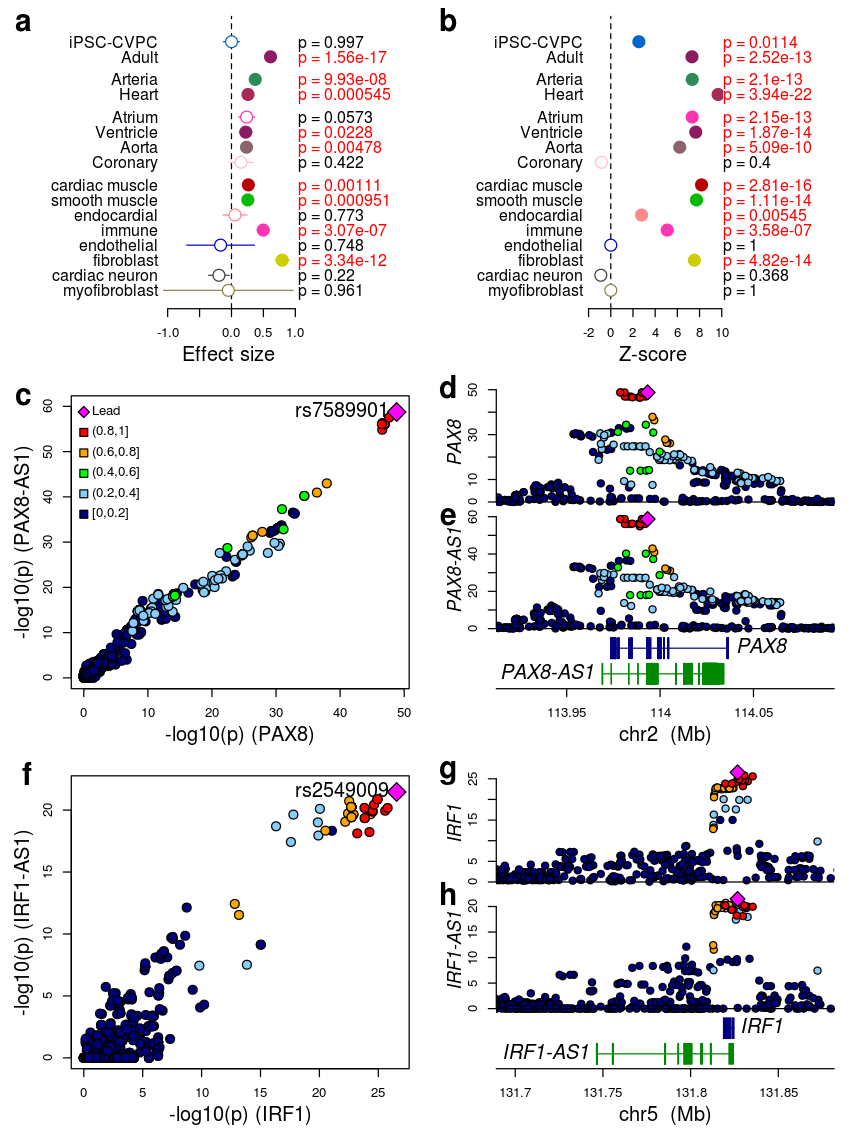

In [280]:

find_lead = function(trid, types, phenotype)
{
    if(phenotype == "gene"){phenotype = "rna"}
    
    x = qtl_data[["qtl"]][[phenotype]]
    x = x[x$transcript_id == trid & x$type %in% types,]
    
    return(x)
}

read_qtl = function(trid, phenotype, type)
{
    infile = paste0("/frazer01/projects/CARDIPS/analysis/cardiac_eqtls/pipeline/3.2.eqtls/eqtls_by_gene/cardiac_eqtls.", phenotype, "/qtl.", trid, ".txt")
    indata = fread(infile, sep = "\t", header = TRUE, data.table = FALSE)
    indata = indata[ indata$type == type, ]
    
    return(indata)
}

plot_qtl = function(toplot, ii, color, name, xlims, panel = "")
{
    toplot$logp = -log10(toplot[,paste0("pval", ii)])
    
    toplot[toplot$cex == 1, "color"] = color
    
    par(mar = c(0,4.5,0,1))
    plot(toplot$pos, toplot$logp, pch = toplot$pch, bg = toplot$bg, cex = toplot$cex * 0.8, xlim = xlims, ylim = c(0, max(toplot$logp) * 1.07), axes = FALSE, xlab = "", ylab = "")
    
    abline(h = 0 )
    
    mtext(text = name , side = 2, line = 2.0, font = 3, cex = 0.9)
    mtext(text = panel, side = 2, line = 2.5, font = 2, cex = 1.5, las = 2, at = max(toplot$logp) * 1.05)
    
    axis(2)
}

plot_gene = function(transcript_id, y, mycolor)
{
    indata               = coordinates[ coordinates$transcript_id == transcript_id, ]
    phenotype            = indata[1, "phenotype"]
    
    if(phenotype == "rna"){exons = exons[ exons$gene_id       == transcript_id,]}
    if(phenotype != "rna"){exons = exons[ exons$transcript_id == transcript_id,]}
    
    rect(xleft = exons$start, xright = exons$end, ybottom = y - 0.9, ytop = y - 0.1, col = mycolor, border = mycolor)
    segments(x0 = min(exons$start), x1 = max(exons$end), y0 = y - 0.5, col = mycolor)
    
    strand = indata[1, "strand"]
    
    if(strand == "+"){text(x = min(exons$start), y = y - 0.5, labels = indata[1, "gene_name"], pos = 2, cex = 1.5, font = 3)}
    if(strand == "-"){text(x = max(exons$start), y = y - 0.5, labels = indata[1, "gene_name"], pos = 4, cex = 1.5, font = 3)}
}

plot_genes = function(trids, my_colors, xlims)
{
    trid2y = data.frame(transcript_id = trids, y = 1:length(trids), color = my_colors)
    
    par(mar = c(4.5,4.5,0,1))
    plot(1,1, type = "n", xlim = xlims, ylim = c(nrow(trid2y), 0), xlab = "", ylab = "", axes = FALSE)
    
    axis(1, at = pretty(xlims, n = 4), labels = pretty(xlims, n = 4) * 1e-6)
    
    mtext(text = paste(unique(coordinates[ coordinates$transcript_id %in% trids, "chrom"]), " (Mb)"), side = 1, line = 2.5)
    
    invisible(lapply(1:nrow(trid2y), function(ii)
    {
        plot_gene(trid2y[ii, "transcript_id"], trid2y[ii, "y"], trid2y[ii, "color"])
    }))
}

figure_example_coloc_genes = function(trid1, trid2, phenotype1, phenotype2, type1 = 0, type2 = 0, panels = c("", "", ""))
{
    indata1 = read_qtl(trid1, phenotype1, type1)
    indata2 = read_qtl(trid2, phenotype2, type2)
    lead1   = find_lead(trid1, c(type1), phenotype1)
    lead2   = find_lead(trid2, c(type2), phenotype2)
    rsid    = lead2$rsid
    
    ld           = fread(paste(getwd(), "pipeline/ld", paste(rsid, "ld.txt", sep = "."), sep = "/"), sep = "\t", header = TRUE, data.table = FALSE)
    toplot       = merge(indata1, indata2, by = c("chrom", "pos", "ref", "alt", "rsid", "af", "id"), suffixes = 1:2)
    toplot       = merge(toplot, ld[,c("snp_b", "r2", "bg")], by.x = "rsid", by.y = "snp_b", all.x = TRUE)

    toplot$color = "#000000"
    toplot$pch   = 21
    toplot$cex   = 1.5
    toplot$x     =  -log10(toplot$pval1)
    toplot$y     =  -log10(toplot$pval2)

    toplot[is.na(toplot$bg) == TRUE, "bg"] = "#00007e"
    toplot[is.na(toplot$r2) == TRUE, "r2"] = 0
    
    toplot[toplot$rsid %in% c(lead1$rsid, lead2$rsid), "bg"   ] = "#ff00ff"
    toplot[toplot$rsid %in% c(lead1$rsid, lead2$rsid), "pch"  ] = 23
    toplot[toplot$rsid %in% c(lead1$rsid, lead2$rsid), "cex"  ] = 2.5

    toplot = toplot[order(toplot$cex, toplot$r2),]
    xlab   = paste0("-log10(p) (", coordinates[ coordinates$transcript_id == trid1, "gene_name"], ")")
    ylab   = paste0("-log10(p) (", coordinates[ coordinates$transcript_id == trid2, "gene_name"], ")")
    
    geneinfo = coordinates[ coordinates$transcript_id %in% c(trid1, trid2),]
    xlims    = c(min(geneinfo$start) - 50000, max(geneinfo$end + 50000))

    par(mar = c(4.5, 4.5, 1, 1))
    plot(toplot$x, toplot$y, pch = 16, cex = 2, type = "n", xlab = "", ylab = "", ylim = c(0, max(toplot$y) * 1.02))
    mtext(text = xlab       , side = 1, line = 2.5)
    mtext(text = ylab       , side = 2, line = 2.5)
    mtext(text = panels[[1]], side = 2, line = 2.5, las = 2, at = max(toplot$y) * 1.02 * 1.05, font = 2, cex = 1.5)

    if(nrow(toplot[toplot$cex == 2.5,]) > 1)
    {
        text(x = toplot[toplot$rsid == lead2$rsid, "x"] + max(toplot$x) * 0.05, y = toplot[toplot$rsid == lead2$rsid, "y"]                       , labels = lead2$rsid, pos = 4, cex = 1.5)
        text(x = toplot[toplot$rsid == lead1$rsid, "x"]                       , y = toplot[toplot$rsid == lead1$rsid, "y"] + max(toplot$y) * 0.05, labels = lead1$rsid, pos = 2, cex = 1.5)
    }else
    {
        text(x = toplot[toplot$rsid == lead2$rsid, "x"], y = toplot[toplot$rsid == lead2$rsid, "y"], labels = lead2$rsid, pos = 2, cex = 1.5)
    }
    points(toplot$x, toplot$y, pch = toplot$pch, bg = toplot$bg, cex = toplot$cex)
    
    if(panels[[1]] == "c")
    {
        tol     = data.frame(min   = (0:5) * 0.2, 
                             max   = (1:6) * 0.2, 
                             y     = max(toplot$y) * (1:6 + 7) / 13, 
                             color = c("#00007e", "#86cdf9", "#01fe02", "#fea500", "#fc0000", "#ff00ff"),
                             pch   = 22
                            )

        tol$lab = paste0(c("[", rep("(", 4)), tol$min, ",", tol$max, rep("]", 5))
        tol[nrow(tol), "lab"] = "Lead"
        tol[nrow(tol), "pch"] = 23


        points(x = rep(0, 6), y = tol$y, bg     = tol$color, cex = 1.5, pch = tol$pch)
        text  (x = rep(0, 6), y = tol$y, labels = tol$lab  , cex = 1  , pos =  4)

    }

    color1 = "#000080"
    color2 = "#008800"
    
    plot_qtl(toplot, 1, color1, coordinates[ coordinates$transcript_id == trid1, "gene_name"], xlims, panels[[2]])
    plot_qtl(toplot, 2, color2, coordinates[ coordinates$transcript_id == trid2, "gene_name"], xlims, panels[[3]])
    
    
    plot_genes(c(trid1, trid2), c(color1, color2), xlims)
    
    return(toplot)
}

#figure_example_coloc_genes(coordinates[ coordinates$phenotype == "rna" & coordinates$gene_name == "DHRS4"   , "transcript_id"], coordinates[ coordinates$phenotype == "rna" & coordinates$gene_name == "DHRS4-AS1"   , "transcript_id"], "gene", "gene", 0, 0, panel = "")
#figure_example_coloc_genes(coordinates[ coordinates$phenotype == "rna" & coordinates$gene_name == "RNF157"  , "transcript_id"], coordinates[ coordinates$phenotype == "rna" & coordinates$gene_name == "RNF157-AS1"  , "transcript_id"], "gene", "gene", 0, 0, panel = "")
#figure_example_coloc_genes(coordinates[ coordinates$phenotype == "rna" & coordinates$gene_name == "CHMP1B"  , "transcript_id"], coordinates[ coordinates$phenotype == "rna" & coordinates$gene_name == "CHMP1B-AS1"  , "transcript_id"], "gene", "gene", 0, 0, panel = "")
#figure_example_coloc_genes(coordinates[ coordinates$phenotype == "rna" & coordinates$gene_name == "RAB11B"  , "transcript_id"], coordinates[ coordinates$phenotype == "rna" & coordinates$gene_name == "RAB11B-AS1"  , "transcript_id"], "gene", "gene", 0, 0, panel = "")
#figure_example_coloc_genes(coordinates[ coordinates$phenotype == "rna" & coordinates$gene_name == "EXOC3"   , "transcript_id"], coordinates[ coordinates$phenotype == "rna" & coordinates$gene_name == "EXOC3-AS1"   , "transcript_id"], "gene", "gene", 0, 0, panel = "")
#figure_example_coloc_genes(coordinates[ coordinates$phenotype == "rna" & coordinates$gene_name == "SLC9A3"  , "transcript_id"], coordinates[ coordinates$phenotype == "rna" & coordinates$gene_name == "SLC9A3-AS1"  , "transcript_id"], "gene", "gene", 0, 0, panel = "")
#figure_example_coloc_genes(coordinates[ coordinates$phenotype == "rna" & coordinates$gene_name == "SLC25A25", "transcript_id"], coordinates[ coordinates$phenotype == "rna" & coordinates$gene_name == "SLC25A25-AS1", "transcript_id"], "gene", "gene", 0, 0, panel = "")
#figure_example_coloc_genes(coordinates[ coordinates$phenotype == "rna" & coordinates$gene_name == "ARRDC1"  , "transcript_id"], coordinates[ coordinates$phenotype == "rna" & coordinates$gene_name == "ARRDC1-AS1"  , "transcript_id"], "gene", "gene", 0, 0, panel = "")
#figure_example_coloc_genes("ENST00000245414.9_4", "ENST00000612967.2_4", "isoform", "isoform", 0, 0, panel = "")
#figure_example_coloc_genes("ENST00000472045.1_2", "ENST00000378953.8_4", "isoform", "isoform", 0, 0, panel = "")
#figure_example_coloc_genes(coordinates[ coordinates$phenotype == "rna" & coordinates$gene_name == "CD151"    , "transcript_id"], coordinates[ coordinates$phenotype == "rna" & coordinates$gene_name == "POLR2L"    , "transcript_id"], "gene", "gene", 0, 0, panel = "")
#figure_example_coloc_genes(coordinates[ coordinates$phenotype == "rna" & coordinates$gene_name == "CD151"    , "transcript_id"], coordinates[ coordinates$phenotype == "rna" & coordinates$gene_name == "TSPAN4"    , "transcript_id"], "gene", "gene", 0, 0, panel = "")


plot_cells = function(x, mycol, name, is_error, colordata, panel = "")
{
    par(mar = c(4,10,1,8))
    
    if(nrow(x[is.na(x[,mycol]) == TRUE, ]) > 0){x[is.na(x[,mycol]) == TRUE, "pval"] = 1}
    if(nrow(x[is.na(x[,mycol]) == TRUE, ]) > 0){x[is.na(x[,mycol]) == TRUE, mycol ] = 0}
    
    if(is_error == TRUE ){xlims = range(c(x[,mycol] - x$se, x[,mycol] + x$se))}
    if(is_error == FALSE){xlims = c(-2, max(x[,mycol]))}
    
    par(mar = c(4.5,10,1,8))
    plot(1,1, type = "n", xlim = xlims, ylim = c(max(colordata$order) + 0.5, 0), xlab = "", ylab = "", axes = FALSE)
    
    axis(1)
    
    abline(v = 0, lty = "dashed")
    
    x = merge(x, colordata, by.x = "cell", by.y = "row.names")
    
    x$bg = "#ffffff"
    
    x[x$pval <= 0.05, "bg"] = x[x$pval <= 0.05, "color"]
    
    if(is_error == TRUE ){segments(x0 = x[,mycol] - x$se, x1 = x[,mycol] + x$se, y0 = x$order, col = x$color)}
    points(x = x[, mycol], x$order, pch = 21, col = x$color, bg = x$bg, cex = 2)
    
    
    x$pval_write = paste("p", signif(x$pval, digits = 3), sep = " = ")
    x$pval_col   = "#000000"
    
    x[x$pval < 0.05, "pval_col"] = "#ff0000"
    
    mtext(text = name        , side = 1, line = 2.5, cex = 1)
    mtext(text = x$name      , side = 2, line = 0  , cex = 0.8, at = x$order, las = 2)
    mtext(text = x$pval_write, side = 4, line = 0  , cex = 0.8, at = x$order, las = 2, col = x$pval_col)
    mtext(text = panel       , side = 2, line = 8  , cex = 1.5, at = -0.5   , las = 2, font = 2)
}


figure_3 = function(size_x = 7.08661, size_y = 9.5,to_png = FALSE)
{
    #if(to_png == TRUE ){png(filename = paste(outfolder, "Figure_3.png", sep = "/"), width = size_x, height = size_y, units = "in", res = 300)}
    if(to_png == TRUE ){pdf(file = paste(outfolder, "Figure_3.pdf", sep = "/"), width = size_x, height = size_y)}
    if(to_png == FALSE){options(repr.plot.width = size_x, repr.plot.height = size_y)}
    
    to_layout = cbind(c(rep(1, 3)), c(2,3,4))
    
    layout(rbind(9:10,
                 9:10,
                 9:10,
                 to_layout, 
                 to_layout + 4
                ))

    
    gene1 = coordinates[ coordinates$phenotype == "rna" & coordinates$gene_name == "PAX8"    , "transcript_id"]
    gene2 = coordinates[ coordinates$phenotype == "rna" & coordinates$gene_name == "PAX8-AS1", "transcript_id"]
    gene3 = "ENST00000472045.1_2"
    gene4 = coordinates[ coordinates$phenotype == "rna" & coordinates$gene_name == "IRF1-AS1", "transcript_id"]
    
    figure_example_coloc_genes(gene1, gene2, "gene"   , "gene", 0, 0, c("c", "d", "e"))
    figure_example_coloc_genes(gene3, gene4, "isoform", "gene", 0, 0, c("f", "g", "h"))
    
    colordata$by_organ $order  = colordata$by_organ $order + 0.5 + max(colordata$by_stage $order)
    colordata$by_tissue$order  = colordata$by_tissue$order + 0.5 + max(colordata$by_organ $order)
    colordata$by_cell  $order  = colordata$by_cell  $order + 0.5 + max(colordata$by_tissue$order)
    
    colordata = rbind(colordata[["by_stage" ]][,c("name", "color", "order")],
                      colordata[["by_organ" ]][,c("name", "color", "order")],
                      colordata[["by_tissue"]][,c("name", "color", "order")],
                      colordata[["by_cell"  ]][,c("name", "color", "order")]
                     )
    
    plot_cells(tests_cell, "beta"  , "Effect size", TRUE , colordata, "a")
    plot_cells(perm_cell , "zscore", "Z-score"    , FALSE, colordata, "b")
    
    if(to_png == TRUE ){dev.off()}
}

figure_3(to_png = FALSE)
figure_3(to_png = TRUE )



In [171]:
tests_cell

cell                             beta          se         pval        
1  adult                             0.6115061792 0.07167738 1.559311e-17
2  arteria                           0.3722662052 0.06984068 9.927396e-08
3  arteria_aorta                     0.2351492636 0.08333715 4.782775e-03
4  arteria_coronary                  0.1499352747 0.18673519 4.220258e-01
5  cibersort.regular.cardiac_muscle  0.2641887785 0.08103064 1.114786e-03
6  cibersort.regular.cardiac_neuron -0.1966318242 0.16028976 2.199411e-01
7  cibersort.regular.endocardial     0.0544040804 0.18886179 7.733019e-01
8  cibersort.regular.endothelial    -0.1706229283 0.53001641 7.475170e-01
9  cibersort.regular.fibroblast      0.7946037099 0.11404459 3.338070e-12
10 cibersort.regular.immune          0.4974177432 0.09713252 3.070138e-07
11 cibersort.regular.myofibroblast  -0.0493149165 1.01468179 9.612375e-01
12 cibersort.regular.smooth_muscle   0.2557779734 0.07738679 9.509754e-04
13 heart                             0.2588021168 0.07483721 5.450504e-04
14 heart_atrium                      0.2369165447 0.12463706 5.733741e-02
15 heart_ventricle                   0.2236533146 0.09820764 2.277691e-02
16 ipsc_cvpc                         0.0005271396 0.12685356 9.966844e-01

# Part 3: colocalization between eQTLs and cardiac traits

In [173]:
coloc    =              fread("pipeline/eqtls.0.1.coloc_gwas/coloc.txt"           , sep = "\t", header = TRUE, data.table = FALSE)
enr1     =              fread("pipeline/eqtls.0.1.coloc_gwas/enrichment_by_pp.txt", sep = "\t", header = TRUE, data.table = FALSE)
manifest = add_rownames(fread("pipeline/eqtls.0.1.coloc_gwas/manifest.txt"        , sep = "\t", header = TRUE, data.table = FALSE))
pph4     = coloc[ coloc$PP.H4.abf >= 0.8,]


In [174]:
message(paste(paste("eGenes that overlap GWAS"           , length(unique(coloc[ coloc$phenotype == "rna"    , "transcript_id"])), sep = " = "),
              paste("eIsoforms that overlap GWAS"        , length(unique(coloc[ coloc$phenotype == "isoform", "transcript_id"])), sep = " = "),
              paste("eGenes that colocalize with GWAS"   , length(unique(pph4 [ pph4 $phenotype == "rna"    , "transcript_id"])), sep = " = "),
              paste("eIsoforms that colocalize with GWAS", length(unique(pph4 [ pph4 $phenotype == "isoform", "transcript_id"])), sep = " = "),
              sep = "\n"
             ))



eGenes that overlap GWAS = 1444
eIsoforms that overlap GWAS = 919
eGenes that colocalize with GWAS = 181
eIsoforms that colocalize with GWAS = 119



In [175]:
table(pph4[,c("gwas", "phenotype")])

head(sort(table(pph4$id), decreasing = TRUE))

                                               phenotype
gwas                                            isoform rna
  continuous-102-both_sexes-irnt                     52  76
  continuous-12340-both_sexes-irnt                    1   4
  continuous-PP-both_sexes-combined_medadj_irnt      70 106
  icd10-I48-both_sexes                                1  12
  phecode-411.2-both_sexes                            1   8


VAR_17_59475888_A_C VAR_11_62380027_C_T VAR_16_83045790_A_G VAR_16_89627460_T_G 
                  4                   3                   3                   3 
VAR_17_17131869_T_C VAR_17_44819595_T_G 
                  3                   3 

In [176]:
enr80      = merge(manifest[,c("id", "name")], enr1[ enr1$threshold == 0.8, ], by.x = "id", by.y = "trait")
enr80$padj = p.adjust(enr80$pval, method = "BH")
enr80      = enr80[order(enr80$pval),]

enr80[ enr80$padj <= 0.1,]

id                                            name               
34 continuous-PP-both_sexes-combined_medadj_irnt Pulse pressure     
35 continuous-PP-both_sexes-combined_medadj_irnt Pulse pressure     
44 continuous-PP-both_sexes-combined_medadj_irnt Pulse pressure     
13 continuous-102-both_sexes-irnt                Pulse rate         
14 continuous-102-both_sexes-irnt                Pulse rate         
42 continuous-PP-both_sexes-combined_medadj_irnt Pulse pressure     
1  continuous-102-both_sexes-irnt                Pulse rate         
48 continuous-PP-both_sexes-combined_medadj_irnt Pulse pressure     
39 continuous-PP-both_sexes-combined_medadj_irnt Pulse pressure     
53 icd10-I48-both_sexes                          Atrial fibrillation
61 icd10-I48-both_sexes                          Atrial fibrillation
63 icd10-I48-both_sexes                          Atrial fibrillation
2  continuous-102-both_sexes-irnt                Pulse rate         
   cell                             threshold x11 x12 x21 x22  estimate 
34 arteria                          0.8       23  153 90  2058  3.434591
35 arteria_aorta                    0.8       18  158 59  2089  4.029832
44 cibersort.regular.smooth_muscle  0.8       19  157 66  2082  3.814382
13 heart                            0.8        8  120 12  1119  6.200667
14 heart_atrium                     0.8        4  124  1  1130 36.189912
42 cibersort.regular.immune         0.8       12  164 46  2102  3.340795
1  adult                            0.8       10  118 24  1107  3.901642
48 ipsc_cvpc                        0.8        8  168 23  2125  4.394655
39 cibersort.regular.endocardial    0.8        5  171  9  2139  6.937153
53 cibersort.regular.cardiac_muscle 0.8        4    9  4   108 11.516564
61 heart                            0.8        4    9  5   107  9.184473
63 heart_ventricle                  0.8        3   10  2   110 15.699253
2  arteria                          0.8       12  116 48  1083  2.331915
   ci1      ci2         pval         log2r    padj        
34 2.012926    5.667928 5.968363e-06 1.780138 0.0002658157
35 2.181446    7.132615 8.894911e-06 2.010720 0.0002658157
44 2.106268    6.630148 9.968089e-06 1.931449 0.0002658157
13 2.153091   16.870898 4.049991e-04 2.632423 0.0075438303
14 3.549081 1776.233925 4.714894e-04 5.177516 0.0075438303
42 1.578966    6.566027 9.938832e-04 1.740191 0.0132517755
1  1.624322    8.716820 1.300930e-03 1.964081 0.0148677723
48 1.673098   10.369428 1.602584e-03 2.135750 0.0160258400
39 1.805673   23.353387 2.682607e-03 2.794344 0.0238453912
53 1.831259   73.750647 4.034206e-03 3.525638 0.0322736472
61 1.545833   52.004906 6.822324e-03 3.199197 0.0496169017
63 1.608517  208.320128 7.927058e-03 3.972624 0.0528470528
2  1.095224    4.616234 1.552277e-02 1.221515 0.0955247322

## Figure 4: Association between eQTL and GWAS signals

In [268]:
pdf.options(useDingbats = TRUE)

In [177]:
manhattan_list = readRDS("pipeline/eqtls.0.1.coloc_gwas/loci/manhattan_list")


In [178]:
chromsizes           = fread("/frazer01/reference/public/hg19/hg19.size.txt", sep = "\t", header = FALSE, data.table = FALSE)
colnames(chromsizes) = c("chrom", "size")
chromsizes$chrom     = sub("chr", "", chromsizes$chrom)
chromsizes           = chromsizes[ chromsizes$chrom %in% as.character(1:22),]
chromsizes$chrom     = as.numeric(chromsizes$chrom)
chromsizes$x0        = c(0, unlist(lapply(1:(nrow(chromsizes) - 1), function(ii){sum(chromsizes[1:ii, "size"])})))

png 
  2

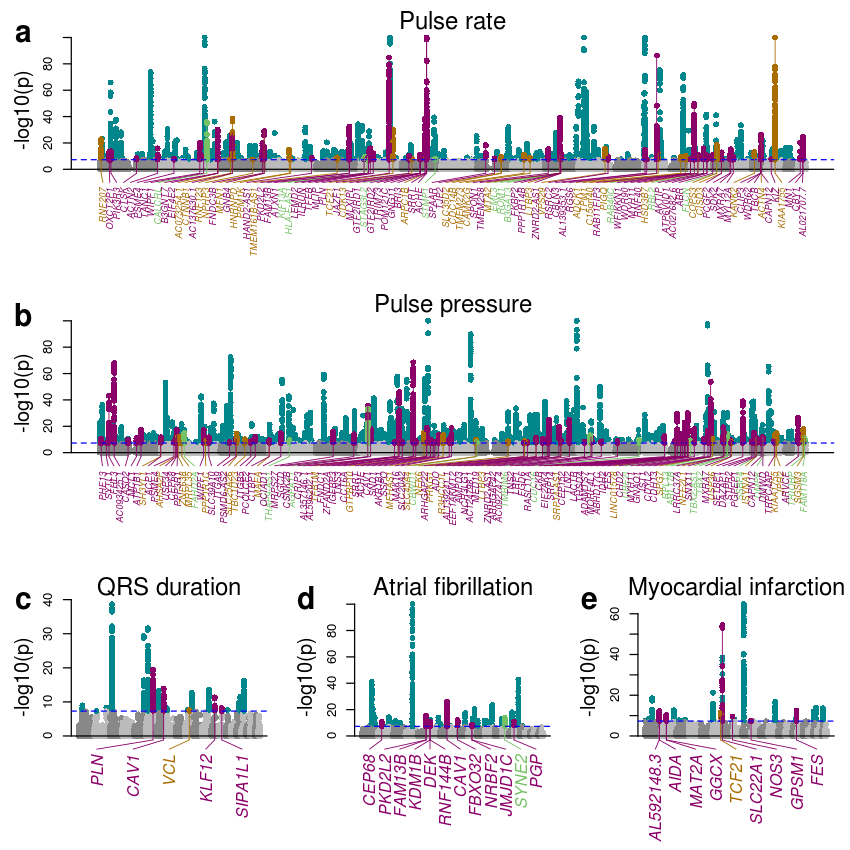

In [269]:
find_signals_eqtl = function(trait, toplot, genome_size)
{
    genes     = aggregate(phenotype ~ gene_id, data = pph4[ pph4$gwas == trait, ], FUN = function(x){paste(sort(unique(x)), collapse = ";")})
    genes$cat = genes$phenotype
    
    if(nrow(genes[ genes$phenotype == "isoform;rna",]) > 0){genes[ genes$phenotype == "isoform;rna", "cat"] = "both"}
    
    genes        = merge(genes[,c("gene_id", "cat")], unique(coordinates[ coordinates$phenotype == "rna",c("gene_id", "gene_name", "chrom", "start", "end")]))
    genes$chrom2 = as.numeric(sub("chr", "", genes$chrom))
    genes        = genes[order(genes$chrom2, genes$start),] 
    genes$x      = (1:nrow(genes) - 0.5) * genome_size / nrow(genes)
    genes        = merge(genes, chromsizes[,c("chrom", "x0")], by.x = "chrom2", by.y = "chrom")
    mycolors     = sequential_hcl(n = 4, palette = "Hawaii")[1:3]
    genes        = merge(genes, data.frame(cat = c("rna", "isoform", "both"), color = mycolors))
    genes$pos    = genes$start + genes$x0
    genes$y      = 0
    
    for(ii in 1:nrow(genes))
    {
        color = genes[ii, "color" ]
        chrom = genes[ii, "chrom2"]
        from  = genes[ii, "start" ] - 500000
        to    = genes[ii, "end"   ] + 500000
        
        if(nrow(toplot[ toplot$pval <= 5e-8 & toplot$chr == chrom & toplot$pos >= from & toplot$pos <= to,]) > 0){toplot[ toplot$pval <= 5e-8 & toplot$chr == chrom & toplot$pos >= from & toplot$pos <= to, "color"] = color}
        
        genes[ii, "y"] = max(toplot[ toplot$pval <= 5e-8 & toplot$chr == chrom & toplot$pos >= from & toplot$pos <= to, "logp"])
    }
    
    toplot = rbind(toplot[ toplot$color %in% c("#bbbbbb", "#888888", "#00868B"),],
                   toplot[ toplot$color %in% mycolors,]
                  )
    
    return(list(toplot, genes))
}


manhattan_plot = function(trait, manifest)
{
    toplot = manhattan_list[[trait]]
    toplot$color = "#888888"
    toplot[ toplot$chr %in% seq(from = 0, to = 22, by = 2), "color"] = "#bbbbbb"
    toplot[ toplot$pval <= 5e-8                           , "color"] = "#00868B"
    genome_size = sum(as.numeric(chromsizes[nrow(chromsizes), c("size", "x0")]))
    
    if(nrow(toplot[ toplot$logp > 100, ]) > 0){toplot[ toplot$logp > 100, "logp"] = 100}
    
    toplot = find_signals_eqtl(trait, toplot, genome_size)
    genes  = toplot[[2]]
    toplot = toplot[[1]]
    
    par(mar = c(6,4.5,2,1))
    plot(1,1, type = "n", xlim = c(0, genome_size), ylim = c(-max(toplot$logp) * 0.1, max(toplot$logp)), xlab = "", ylab = "", axes = FALSE)
    
    #mtext(text = genes$gene_name, side = 3, line = 0, at = genes$x, font = 3, las = 2, col = genes$color, cex = 0.7)
    axis(2)
    
    points(toplot$x, toplot$logp, pch = 16, col = toplot$color)
    abline(h = -log10(5e-8), lty = "dashed", col = "#0000ff")
    abline(h = 0)
    
    #segments(x0 = genes$x, x1 = genes$pos, y0 = max(toplot$logp), y1 = genes$y, col = genes$color, lwd = 0.7)
    #segments(x0 = genes$x, x1 = genes$x  , y0 = max(toplot$logp), y1 = 120    , col = genes$color, lwd = 0.7)
    
    mycex = 0.45
    
    if(nrow(genes) < 20){mycex = 0.8}
    
    segments(x0 = genes$pos, x1 = genes$pos, y0 = -max(toplot$logp) * 0.03, y1 = genes$y                 , col = genes$color, lwd = 0.7)
    segments(x0 = genes$x  , x1 = genes$pos, y0 = -max(toplot$logp) * 0.1 , y1 = -max(toplot$logp) * 0.03, col = genes$color, lwd = 0.7)
    
    mtext(text = manifest[trait, "panel"], side = 2, line = 2.5, cex = 1.5  , at = max(toplot$logp) * 1.05, las = 2, font = 2)
    mtext(text = genes$gene_name         , side = 1, line = 0  , cex = mycex, at = genes$x                , las = 2, font = 3, col = genes$color)
    mtext(text = manifest[trait, "name" ], side = 3, line = 0  , cex = 1.2  )
    mtext(text = "-log10(p)"             , side = 2, line = 2.5)
    
}

figure_4 = function(size_x = 7.08661, size_y = 7.08661,to_png = FALSE)
{
    #if(to_png == TRUE ){png(filename = paste(outfolder, "Figure_4.png", sep = "/"), width = size_x, height = size_y, units = "in", res = 300)}
    if(to_png == TRUE ){pdf(file = paste(outfolder, "Figure_4.pdf", sep = "/"), width = size_x, height = size_y)}
    if(to_png == FALSE){options(repr.plot.width = size_x, repr.plot.height = size_y)}
    
    layout(rbind(rep(1,3),
                 rep(3,3),
                 c(2,4,5)
                ))
    
    manifest$panel = c("a", "c", "b", "d", "e")
    
    invisible(lapply(manifest$id, function(trait){manhattan_plot(trait, manifest)}))
    
    
    if(to_png == TRUE ){dev.off()}
}

figure_4(to_png = FALSE)
figure_4(to_png = TRUE )


In [180]:
signals2fm = fread("pipeline/eqtls.0.1.coloc_gwas/gwas_signals.txt", sep = "\t", header = TRUE, data.table = FALSE)

In [181]:
x = aggregate(gene_id ~ gwas + cluster, data = signals2fm, FUN = length)

message(paste("unique colocalizing eQTL signals", nrow(x                 ), sep = " = "), appendLF = FALSE)
message(paste("1:1 correspondences gene:GWAS"   , nrow(x[x$gene_id == 1,]), sep = " = "), appendLF = FALSE)
message(paste("N:1 correspondences gene:GWAS"   , nrow(x[x$gene_id >  1,]), sep = " = "), appendLF = FALSE)
message(paste("Total GWAS-eQTL associations"    , nrow(signals2fm        ), sep = " = "), appendLF = FALSE)

range(x$gene_id)

table(signals2fm[ signals2fm$fm == TRUE, "gwas"])

unique colocalizing eQTL signals = 210
1:1 correspondences gene:GWAS = 145
N:1 correspondences gene:GWAS = 65
Total GWAS-eQTL associations = 331


[1] 1 9


               continuous-102-both_sexes-irnt 
                                           83 
             continuous-12340-both_sexes-irnt 
                                            5 
continuous-PP-both_sexes-combined_medadj_irnt 
                                          106 
                         icd10-I48-both_sexes 
                                            9 
                     phecode-411.2-both_sexes 
                                            7 

In [182]:
catalog_start           = fread("/frazer01/reference/public/gwas_catalog/alternative.1", sep = "\t", header = TRUE, data.table = FALSE, quote = "")
catalog_start           = catalog_start[, c("SNPS", "PUBMEDID", "STUDY", "MAPPED_TRAIT", "P-VALUE", "PVALUE_MLOG", "OR or BETA", "95% CI (TEXT)")]
colnames(catalog_start) = c("rsid", "pmid", "study", "trait", "pval", "logp", "beta", "confint")
catalog_start$pval      = as.numeric(catalog_start$pval)
catalog                 = catalog_start[ catalog_start$rsid %in% signals2fm$rsid, ]
toex                    = merge(unique(coordinates[,c("gene_id", "gene_name"),]), signals2fm[ signals2fm$fm == TRUE,])
toex                    = toex[order(toex$cs, -toex$pp_snp),]

In [183]:
message(paste(nrow(toex[ toex$rsid %in% setdiff(signals2fm$rsid, catalog$rsid),]), "SNPs are not in the GWAS catalog"), appendLF = FALSE)
message(paste(nrow(toex[ toex$rsid %in%                          catalog$rsid ,]), "SNPs are in the GWAS catalog"    ), appendLF = FALSE)


128 SNPs are not in the GWAS catalog
82 SNPs are in the GWAS catalog


In [184]:
manifest[,c("id", "name")]

id                                           
continuous-102-both_sexes-irnt                continuous-102-both_sexes-irnt               
continuous-12340-both_sexes-irnt              continuous-12340-both_sexes-irnt             
continuous-PP-both_sexes-combined_medadj_irnt continuous-PP-both_sexes-combined_medadj_irnt
icd10-I48-both_sexes                          icd10-I48-both_sexes                         
phecode-411.2-both_sexes                      phecode-411.2-both_sexes                     
                                              name                 
continuous-102-both_sexes-irnt                Pulse rate           
continuous-12340-both_sexes-irnt              QRS duration         
continuous-PP-both_sexes-combined_medadj_irnt Pulse pressure       
icd10-I48-both_sexes                          Atrial fibrillation  
phecode-411.2-both_sexes                      Myocardial infarction

In [185]:
48/206
21/125

[1] 0.2330097

[1] 0.168

In [186]:
table(pph4[,c("gwas", "phenotype")])
table(pph4$gwas)

                                               phenotype
gwas                                            isoform rna
  continuous-102-both_sexes-irnt                     52  76
  continuous-12340-both_sexes-irnt                    1   4
  continuous-PP-both_sexes-combined_medadj_irnt      70 106
  icd10-I48-both_sexes                                1  12
  phecode-411.2-both_sexes                            1   8


               continuous-102-both_sexes-irnt 
                                          128 
             continuous-12340-both_sexes-irnt 
                                            5 
continuous-PP-both_sexes-combined_medadj_irnt 
                                          176 
                         icd10-I48-both_sexes 
                                           13 
                     phecode-411.2-both_sexes 
                                            9 

## Figure S5: enrichment of GWAS traits for stage, organ and tissue associations

png 
  2

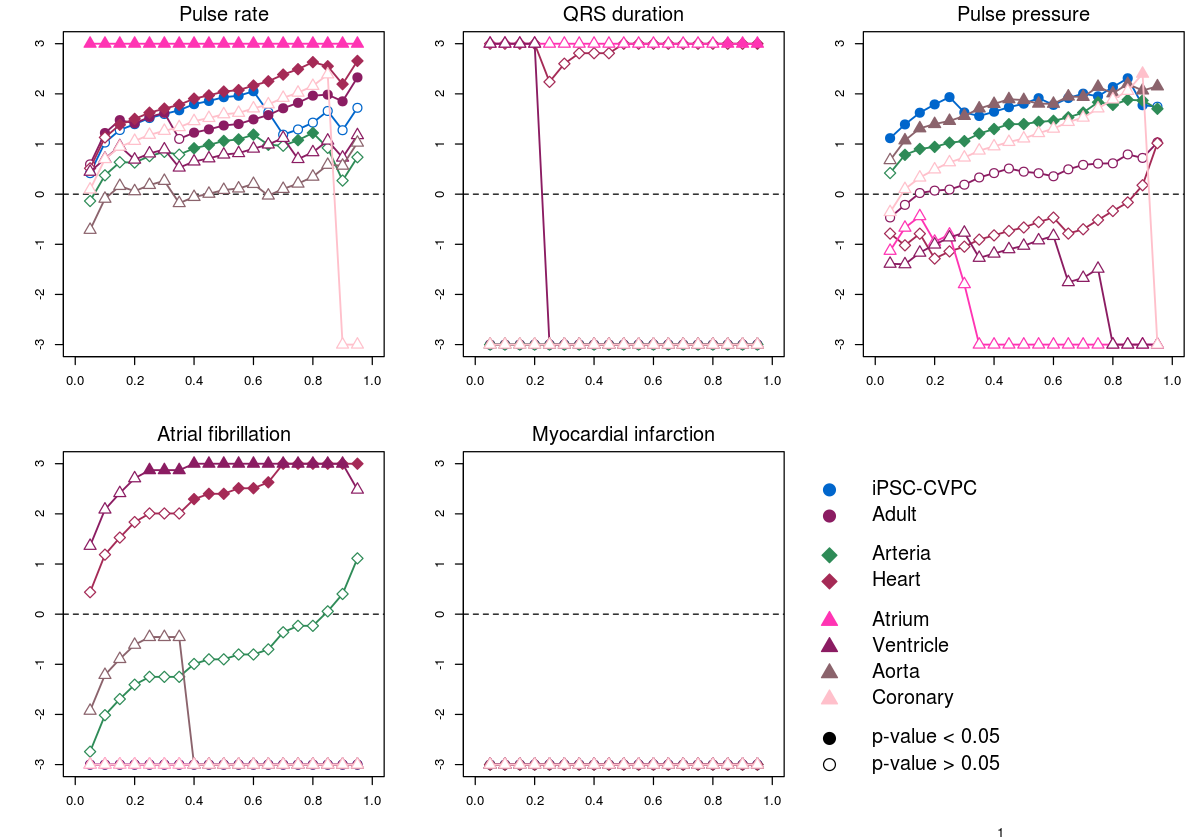

In [193]:
plot_enrichment = function(trait, enr1, colordata)
{
    x = enr1[ enr1$trait == trait, ]
    
    if(nrow(x[ x$log2r >=  3, ]) > 0){x[ x$log2r >=  3, "log2r"] =  3}
    if(nrow(x[ x$log2r <= -3, ]) > 0){x[ x$log2r <= -3, "log2r"] = -3}
    
    par(mar = c(4,4,2,1))
    plot(1,1, type = "n", xlim = c(0,1), ylim = range(x$log2r), xlab = "", ylab = "", main = "")
    mtext(manifest[trait, "name"], side = 3, line = 0.5)
    
    abline(h = 0, lty = "dashed")
    
    for (cell in colordata$body_site)
    {
        toplot    = x[ x$cell == cell,]
        color     = colordata[ colordata$body_site == cell, "color"]
        pch       = colordata[ colordata$body_site == cell, "pch"  ]
        toplot$bg = "#ffffff"
        
        if(nrow(toplot[toplot$pval <= 0.05,]) > 0){toplot[toplot$pval <= 0.05, "bg"] = color}
        
        lines (x = toplot$threshold, y = toplot$log2r, col = color, lwd =  1.5)
        points(x = toplot$threshold, y = toplot$log2r, col = color, pch = pch, bg = toplot$bg, cex = 1.5)
    }
}

figure_s5 = function(size_x = 10, size_y = 7,to_png = FALSE)
{
    if(to_png == TRUE ){png(filename = paste(outfolder, "Figure_S5.png", sep = "/"), width = size_x, height = size_y, units = "in", res = 300)}
    if(to_png == FALSE){options(repr.plot.width = size_x, repr.plot.height = size_y)}
    
    layout(matrix(1:6, nrow = 2, byrow = TRUE))

    colordata$by_organ $order  = colordata$by_organ $order + 0.5 + max(colordata$by_stage $order)
    colordata$by_tissue$order  = colordata$by_tissue$order + 0.5 + max(colordata$by_organ $order)
    
    colordata$by_stage $pch = 21
    colordata$by_organ $pch = 23
    colordata$by_tissue$pch = 24
    
    toplot = rbind(colordata[["by_stage" ]][,c("body_site", "name", "color", "order", "pch")],
                   colordata[["by_organ" ]][,c("body_site", "name", "color", "order", "pch")],
                   colordata[["by_tissue"]][,c("body_site", "name", "color", "order", "pch")]
                  )
    
    invisible(lapply(manifest$id, function(trait){plot_enrichment(trait, enr1, toplot)}))
    
    par(mar = c(4,1,2,1))
    
    toplot$bg = toplot$color
    toplot    = rbind(toplot, data.frame(body_site = "", name = c("p-value < 0.05", "p-value > 0.05"), color = "#000000", order = max(toplot$order) + 0.5 + 1:2, pch = 21, bg = c("#000000", "#ffffff")))
    
    plot(1,1, type = "n", xlim = c(0,1), ylim = c(max(toplot$order), 0), axes = FALSE)
    
    points(x = rep(0  , nrow(toplot)), y = toplot$order, pch    = toplot$pch , cex = 2  , col = toplot$color, bg = toplot$bg)
    text  (x = rep(0.1, nrow(toplot)), y = toplot$order, labels = toplot$name, cex = 1.5, pos = 4)

    if(to_png == TRUE ){dev.off()}
}

figure_s5(to_png = FALSE)
figure_s5(to_png = TRUE )




## Figure S6: enrichment of GWAS traits for cell type associations

png 
  2

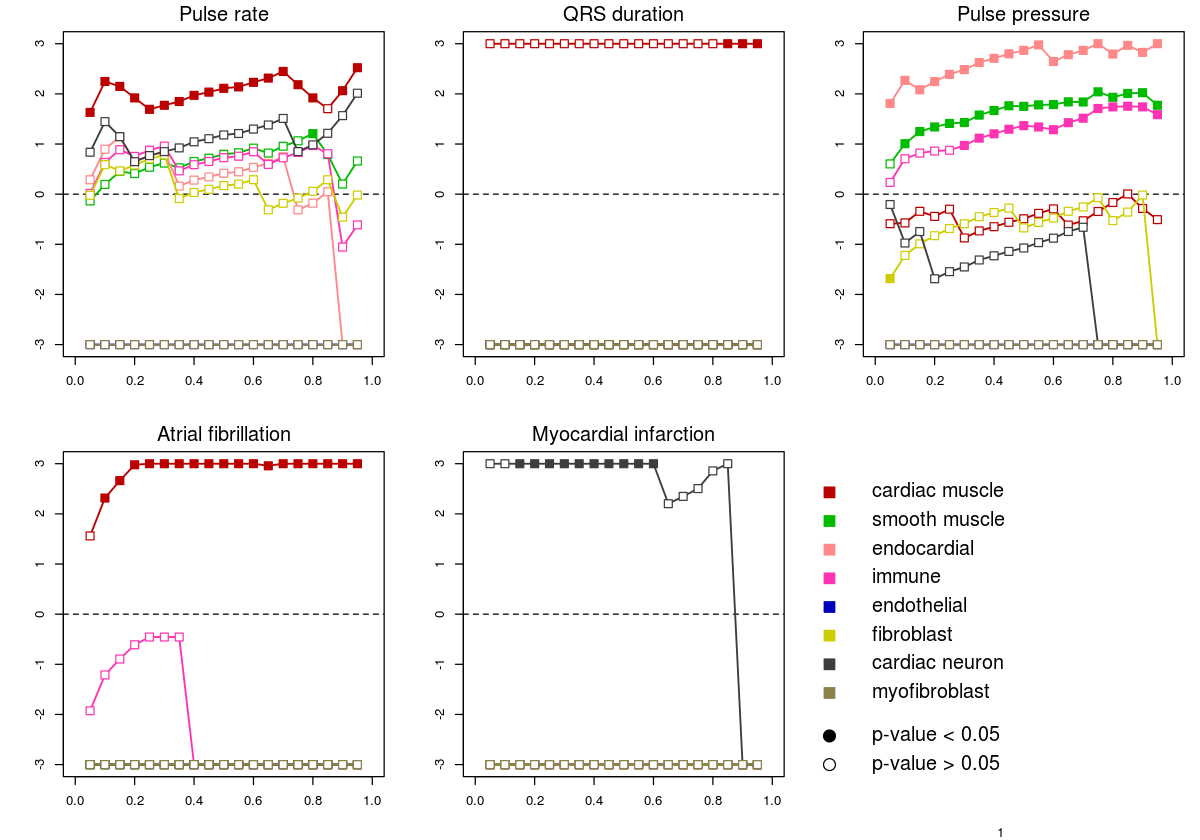

In [194]:
figure_s6 = function(size_x = 10, size_y = 7, to_png = FALSE)
{
    if(to_png == TRUE ){png(filename = paste(outfolder, "Figure_S6.png", sep = "/"), width = size_x, height = size_y, units = "in", res = 300)}
    if(to_png == FALSE){options(repr.plot.width = size_x, repr.plot.height = size_y)}
    
    layout(matrix(1:6, nrow = 2, byrow = TRUE))

    colordata$by_cell$pch = 22
    
    toplot = colordata[["by_cell" ]][,c("body_site", "name", "color", "order", "pch")]
    
    invisible(lapply(manifest$id, function(trait){plot_enrichment(trait, enr1, toplot)}))
    
    par(mar = c(4,1,2,1))
    
    toplot$bg = toplot$color
    toplot    = rbind(toplot, data.frame(body_site = "", name = c("p-value < 0.05", "p-value > 0.05"), color = "#000000", order = max(toplot$order) + 0.5 + 1:2, pch = 21, bg = c("#000000", "#ffffff")))
    
    plot(1,1, type = "n", xlim = c(0,1), ylim = c(max(toplot$order), 0), axes = FALSE)
    
    points(x = rep(0  , nrow(toplot)), y = toplot$order, pch    = toplot$pch , cex = 2  , col = toplot$color, bg = toplot$bg)
    text  (x = rep(0.1, nrow(toplot)), y = toplot$order, labels = toplot$name, cex = 1.5, pos = 4)

    if(to_png == TRUE ){dev.off()}
}

figure_s6(to_png = FALSE)
figure_s6(to_png = TRUE )




## Figure 5: Enrichment of GWAS traits for context-specific eQTLs

In [195]:
fm_list_old   = readRDS("pipeline/eqtl.4.finemap_single/fm_list.rds"  )

In [196]:
coloc2cell = colSums(pph4[,grepl("^interaction", colnames(pph4))])
coloc2cell = data.frame(cell = sub("^interaction\\.", "", names(coloc2cell)), n = as.numeric(coloc2cell))

message(paste("Stage/cell type associated genes that colocalize with GWAS"                   , length(unique(pph4[                               rowSums(pph4[,grepl("^interaction", colnames(pph4))]) > 0, c("gene_id"      )])), sep = " = "))
message(paste("Stage/cell type associated eGenes that colocalize with GWAS"                  , length(unique(pph4[ pph4$phenotype == "rna"     & rowSums(pph4[,grepl("^interaction", colnames(pph4))]) > 0, c("transcript_id")])), sep = " = "))
message(paste("Stage/cell type associated eIsoforms that colocalize with GWAS"               , length(unique(pph4[ pph4$phenotype == "isoform" & rowSums(pph4[,grepl("^interaction", colnames(pph4))]) > 0, c("transcript_id")])), sep = " = "))
message(paste("GWAS loci that colocalize with Stage/cell type associated eIsoforms or eGenes", length(unique(pph4[                               rowSums(pph4[,grepl("^interaction", colnames(pph4))]) > 0, c("locus"        )])), sep = " = "))

message(paste("iPSC-CVPC genes that colocalize with GWAS"    , length(unique(pph4[                               pph4$interaction.ipsc_cvpc > 0, c("gene_id"      )])), sep = " = "))
message(paste("iPSC-CVPC eGenes that colocalize with GWAS"   , length(unique(pph4[ pph4$phenotype == "rna"     & pph4$interaction.ipsc_cvpc > 0, c("transcript_id")])), sep = " = "))
message(paste("iPSC-CVPC eIsoforms that colocalize with GWAS", length(unique(pph4[ pph4$phenotype == "isoform" & pph4$interaction.ipsc_cvpc > 0, c("transcript_id")])), sep = " = "))


coloc2cell

Stage/cell type associated genes that colocalize with GWAS = 60

Stage/cell type associated eGenes that colocalize with GWAS = 48

Stage/cell type associated eIsoforms that colocalize with GWAS = 21

GWAS loci that colocalize with Stage/cell type associated eIsoforms or eGenes = 0

iPSC-CVPC genes that colocalize with GWAS = 10

iPSC-CVPC eGenes that colocalize with GWAS = 7

iPSC-CVPC eIsoforms that colocalize with GWAS = 4



cell                             n 
1  adult                            19
2  arteria                          36
3  arteria_aorta                    23
4  arteria_coronary                  5
5  cibersort.regular.cardiac_muscle 13
6  cibersort.regular.cardiac_neuron  3
7  cibersort.regular.endocardial     6
8  cibersort.regular.endothelial     0
9  cibersort.regular.fibroblast      4
10 cibersort.regular.immune         17
11 cibersort.regular.myofibroblast   0
12 cibersort.regular.smooth_muscle  29
13 heart                            16
14 heart_atrium                      5
15 heart_ventricle                   6
16 ipsc_cvpc                        11

In [197]:
str(pph4)

'data.frame':	331 obs. of  31 variables:
 $ transcript_id                               : chr  "ENSG00000002919.14_3" "ENSG00000006704.10_6" "ENSG00000009950.16_7" "ENSG00000011523.14_5" ...
 $ gene_id                                     : chr  "ENSG00000002919.14_3" "ENSG00000006704.10_6" "ENSG00000009950.16_7" "ENSG00000011523.14_5" ...
 $ nsnps                                       : int  1697 933 956 2052 2052 1254 1254 2197 1538 1538 ...
 $ PP.H0.abf                                   : num  5.05e-18 1.98e-03 1.66e-11 8.13e-70 3.14e-65 ...
 $ PP.H1.abf                                   : num  4.98e-08 5.58e-03 1.43e-06 7.28e-59 3.96e-60 ...
 $ PP.H2.abf                                   : num  7.44e-12 7.74e-03 1.98e-07 5.23e-13 2.03e-08 ...
 $ PP.H3.abf                                   : num  0.07234 0.02087 0.01607 0.04595 0.00155 ...
 $ PP.H4.abf                                   : num  0.928 0.964 0.984 0.954 0.998 ...
 $ gwas                                        : chr  "con

In [198]:
coloc2cell_gene = pph4[,grepl("^interaction", colnames(pph4)) == TRUE | colnames(pph4) %in% c("transcript_id", "phenotype")]
coloc2cell_gene$n = rowSums(coloc2cell_gene[, grepl("^interaction", colnames(coloc2cell_gene)) == TRUE])
#coloc2cell_gene = data.frame(cell = sub("^interaction\\.", "", names(coloc2cell)), n = as.numeric(coloc2cell))

coloc2cell_gene[ coloc2cell_gene$n >1, "n"] = 2
aggregate(transcript_id ~ ., coloc2cell_gene[ coloc2cell_gene$n > 0,c("transcript_id", "phenotype", "n")], length)

phenotype n transcript_id
1 isoform   1  7           
2 rna       1 16           
3 isoform   2 14           
4 rna       2 35

In [199]:
x = merge(pph4[ pph4$interaction.ipsc_cvpc == 1, c("transcript_id", "gene_id", "gwas", "phenotype")], unique(coordinates[,c("gene_id",  "gene_name")]))
x = merge(x, manifest[,c("id", "name")], by.x = "gwas", by.y = "id")
message(paste(x[x$phenotype == "rna"    , "gene_name"], collapse = ", "))
message(paste(x[x$phenotype == "isoform", "gene_name"], collapse = ", "))

x

STMP1, CBY1, AKR1B1, CBWD1, RPL13, THAP9-AS1, TBX2-AS1

KANK2, DMPK, RPL13, PRKG1



gwas                                          gene_id             
1  continuous-102-both_sexes-irnt                ENSG00000197256.10_9
2  continuous-102-both_sexes-irnt                ENSG00000243317.8_5 
3  continuous-102-both_sexes-irnt                ENSG00000100211.10_3
4  continuous-PP-both_sexes-combined_medadj_irnt ENSG00000085662.14_5
5  continuous-PP-both_sexes-combined_medadj_irnt ENSG00000172785.18_5
6  continuous-PP-both_sexes-combined_medadj_irnt ENSG00000104936.18_6
7  continuous-PP-both_sexes-combined_medadj_irnt ENSG00000167526.13_5
8  continuous-PP-both_sexes-combined_medadj_irnt ENSG00000167526.13_5
9  continuous-PP-both_sexes-combined_medadj_irnt ENSG00000251022.6_9 
10 continuous-PP-both_sexes-combined_medadj_irnt ENSG00000185532.20_9
11 continuous-PP-both_sexes-combined_medadj_irnt ENSG00000267280.5_8 
   transcript_id        phenotype gene_name name          
1  ENST00000588787.5_5  isoform   KANK2     Pulse rate    
2  ENSG00000243317.8_5  rna       STMP1     Pulse rate    
3  ENSG00000100211.10_3 rna       CBY1      Pulse rate    
4  ENSG00000085662.14_5 rna       AKR1B1    Pulse pressure
5  ENSG00000172785.18_5 rna       CBWD1     Pulse pressure
6  ENST00000291270.9_3  isoform   DMPK      Pulse pressure
7  ENSG00000167526.13_5 rna       RPL13     Pulse pressure
8  ENST00000565571.5_1  isoform   RPL13     Pulse pressure
9  ENSG00000251022.6_9  rna       THAP9-AS1 Pulse pressure
10 ENST00000643582.1_1  isoform   PRKG1     Pulse pressure
11 ENSG00000267280.5_8  rna       TBX2-AS1  Pulse pressure

In [200]:
x = merge(pph4[ rowSums(pph4[,grepl("^interaction", colnames(pph4))]) > 0, c("transcript_id", "gene_id", "gwas", "phenotype")], unique(coordinates[,c("gene_id",  "gene_name")]))
x = merge(x, manifest[,c("id", "name")], by.x = "gwas", by.y = "id")

table(x$phenotype)

table(x[,c("name", "phenotype")])



isoform     rna 
     21      51 

                       phenotype
name                    isoform rna
  Atrial fibrillation         1   5
  Myocardial infarction       0   1
  Pulse pressure             13  27
  Pulse rate                  7  17
  QRS duration                0   1

In [201]:
convert_colordata = function(colordata)
{
    colordata$by_organ $order  = colordata$by_organ $order + 0.5 + max(colordata$by_stage $order)
    colordata$by_tissue$order  = colordata$by_tissue$order + 0.5 + max(colordata$by_organ $order)
    colordata$by_cell  $order  = colordata$by_cell  $order + 0.5 + max(colordata$by_tissue$order)
    
    colordata$by_stage $pch = 21
    colordata$by_organ $pch = 23
    colordata$by_tissue$pch = 24
    colordata$by_cell  $pch = 22
    
    toplot = rbind(colordata[["by_stage" ]][,c("body_site", "name", "color", "order", "pch")],
                   colordata[["by_organ" ]][,c("body_site", "name", "color", "order", "pch")],
                   colordata[["by_tissue"]][,c("body_site", "name", "color", "order", "pch")],
                   colordata[["by_cell"  ]][,c("body_site", "name", "color", "order", "pch")]
                  )
    
    return(toplot)
}

locus2context = convert_colordata(colordata)

locus2context$n = unlist(lapply(rownames(locus2context), function(x)
{
    length(unique(pph4[ pph4[,paste("interaction", x, sep = ".")] == 1, "transcript_id"]))
}))

locus2context


body_site                       
ipsc_cvpc                        ipsc_cvpc                       
adult                            adult                           
arteria                          arteria                         
heart                            heart                           
heart_atrium                     heart_atrium                    
heart_ventricle                  heart_ventricle                 
arteria_aorta                    arteria_aorta                   
arteria_coronary                 arteria_coronary                
cibersort.regular.cardiac_muscle cibersort.regular.cardiac_muscle
cibersort.regular.smooth_muscle  cibersort.regular.smooth_muscle 
cibersort.regular.endocardial    cibersort.regular.endocardial   
cibersort.regular.immune         cibersort.regular.immune        
cibersort.regular.endothelial    cibersort.regular.endothelial   
cibersort.regular.fibroblast     cibersort.regular.fibroblast    
cibersort.regular.cardiac_neuron cibersort.regular.cardiac_neuron
cibersort.regular.myofibroblast  cibersort.regular.myofibroblast 
                                 name           color   order pch n 
ipsc_cvpc                        iPSC-CVPC      #0066CC  1.0  21  11
adult                            Adult          #8B1C62  2.0  21  18
arteria                          Arteria        #2E8B57  3.5  23  34
heart                            Heart          #A52A56  4.5  23  15
heart_atrium                     Atrium         #FF34B3  6.0  24   5
heart_ventricle                  Ventricle      #8B1C62  7.0  24   6
arteria_aorta                    Aorta          #8B636C  8.0  24  21
arteria_coronary                 Coronary       #FFC0CB  9.0  24   5
cibersort.regular.cardiac_muscle cardiac muscle #BB0000 10.5  22  12
cibersort.regular.smooth_muscle  smooth muscle  #00BB00 11.5  22  27
cibersort.regular.endocardial    endocardial    #FF8888 12.5  22   5
cibersort.regular.immune         immune         #FF34B3 13.5  22  16
cibersort.regular.endothelial    endothelial    #0000BB 14.5  22   0
cibersort.regular.fibroblast     fibroblast     #CDCD00 15.5  22   4
cibersort.regular.cardiac_neuron cardiac neuron #3D3D3D 16.5  22   3
cibersort.regular.myofibroblast  myofibroblast  #8B814C 17.5  22   0

In [202]:
colordata

$by_stage
          body_site      name   color order  type
ipsc_cvpc ipsc_cvpc iPSC-CVPC #0066CC     1 stage
adult         adult     Adult #8B1C62     2 stage

$by_organ
        body_site    name   color order  type
arteria   arteria Arteria #2E8B57     1 organ
heart       heart   Heart #A52A56     2 organ

$by_tissue
                        body_site      name   color order   type
heart_atrium         heart_atrium    Atrium #FF34B3     1 tissue
heart_ventricle   heart_ventricle Ventricle #8B1C62     2 tissue
arteria_aorta       arteria_aorta     Aorta #8B636C     3 tissue
arteria_coronary arteria_coronary  Coronary #FFC0CB     4 tissue

$by_cell
                                                        body_site
cibersort.regular.cardiac_muscle cibersort.regular.cardiac_muscle
cibersort.regular.smooth_muscle   cibersort.regular.smooth_muscle
cibersort.regular.endocardial       cibersort.regular.endocardial
cibersort.regular.immune                 cibersort.regular.immune
cibersort.regular.endothelial       cibersort.regular.endothelial
cibersort.regular.fibroblast         cibersort.regular.fibroblast
cibersort.regular.cardiac_neuron cibersort.regular.cardiac_neuron
cibersort.regular.myofibroblast   cibersort.regular.myofibroblast
                                           name   color order type
cibersort.regular.cardiac_muscle cardiac muscle #BB0000     1 cell
cibersort.regular.smooth_muscle   smooth muscle #00BB00     2 cell
cibersort.regular.endocardial       endocardial #FF8888     3 cell
cibersort.regular.immune                 immune #FF34B3     4 cell
cibersort.regular.endothelial       endothelial #0000BB     5 cell
cibersort.regular.fibroblast         fibroblast #CDCD00     6 cell
cibersort.regular.cardiac_neuron cardiac neuron #3D3D3D     7 cell
cibersort.regular.myofibroblast   myofibroblast #8B814C     8 cell

png 
  2

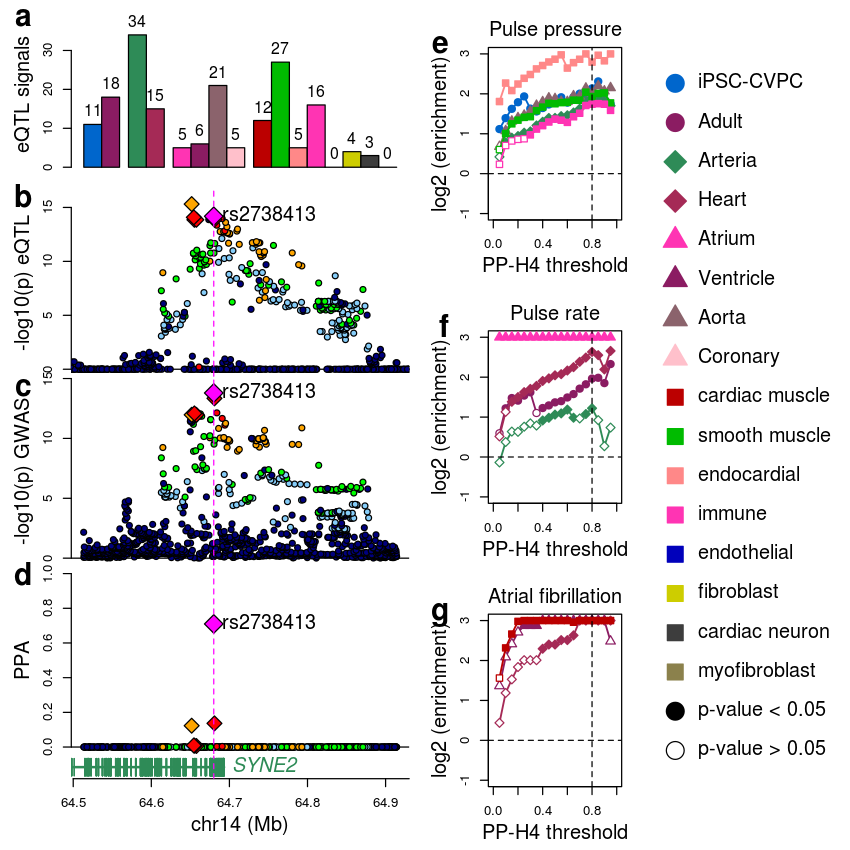

In [281]:

change_color_points = function(x, rsid, credible_set, mycol, type, qtl)
{
    ld_file = paste(getwd(), "pipeline/ld", paste(rsid, "ld.txt", sep = "."), sep = "/")
    
    if(file.exists(ld_file))
    {
        ld = fread(ld_file, sep = "\t", header = TRUE, data.table = FALSE)
        
        if(type != "qtl"){x = merge(x, qtl[,c("id", "rsid")], by = "id", all.x = TRUE)}
        
        x = merge(x, ld[,c("snp_b", "r2", "bg")], by.x = "rsid", by.y = "snp_b", all.x = TRUE)
        
        if(nrow(x[ is.na(x$rsid) == TRUE, ]) > 0){x[ is.na(x$rsid) == TRUE, "rsid"] = "."}
        
    }else
    {
        x$r2 = 0
        x$bg = "#00007e"
    }
    
    x$color = "#000000"
    x$pch   = 21
    x$cex   =  1
    
    x[is.na(x$bg) == TRUE, "bg"] = "#00007e"
    x[is.na(x$r2) == TRUE, "r2"] = 0
    x[x$id %in% credible_set, "pch"  ] = 23
    x[x$id %in% credible_set, "cex"  ] =  2
    
    x[x$rsid == rsid, "bg" ] = "#ff00ff"
    x[x$rsid == rsid, "cex"] = 2.5
    
    x = x[order(x$cex, x[,mycol], decreasing = FALSE),]
    x = x[duplicated(x$id) == FALSE,]
    rownames(x) = x$id
    
    return(x)
}

plot_pp = function(fm_list, transcript_id, type, trait, locus, genes_to_exons, panels = rep("", 3))
{
    indata            = fm_list[[paste(transcript_id, type, trait, locus, sep = ":")]]
    gwas              = indata$gwas
    gwas              = gwas[is.na(gwas$pval) == FALSE,]
    qtl               = indata$qtl
    finemap           = indata$finemap
    ids               = indata$credible_set
    id                = finemap[1,"id"]
    rsid              = qtl    [id, "rsid"]
    xlims             = range(finemap$pos)
    qtl $logp         = -log10(qtl $pval)
    gwas$logp         = -log10(gwas$pval)
    rownames(finemap) = finemap$id
    qtl               = change_color_points(qtl    , rsid, ids, "logp", "qtl"    , qtl)
    gwas              = change_color_points(gwas   , rsid, ids, "logp", "gwas"   , qtl)
    finemap           = change_color_points(finemap, rsid, ids, "pp"  , "finemap", qtl)
    
    if(transcript_id == "ENSG00000274070.2_4"){xlims[[2]] = xlims[[2]] + 100000}
    
    par(mar = c(0.1,4.5, 0, 1))
    
    snp_pos = 4
    if(transcript_id %in% c("ENSG00000221963.6_4", "ENSG00000274070.2_4", "ENSG00000267280.5_8")){snp_pos = 2}
    
    # plot QTL signal
    plot(1,1, type = "n", xlim = xlims, ylim = c(0, max(qtl$logp) * 1.05), xlab = "", ylab = "", axes = FALSE)
    axis(2)
    
    abline(h = 0)
    points(qtl$pos, qtl$logp, cex = qtl$cex, pch = qtl$pch, bg = qtl$bg)
    abline(v = qtl[id, "pos"], lty = "dashed", col = "#ff00ff")
    text  (    qtl[id, "pos"], qtl[id, "logp"], cex = 1.5, labels = rsid, pos = snp_pos)
    
    mtext(text = "-log10(p) eQTL", side = 2, line = 2.5)
    mtext(text = panels[[1]]     , side = 2, line = 2.5, las = 2, at = max(qtl$logp) * 1.05, cex = 1.5, font = 2)
    
    if(nrow(gwas[ is.infinite(gwas$logp) == TRUE, ]) > 0){gwas[ is.infinite(gwas$logp) == TRUE, "logp"] = max(gwas[ is.infinite(gwas$logp) == FALSE, "logp"])}
    
    # plot GWAS signal
    plot(1,1, type = "n", xlim = xlims, ylim = c(0, max(gwas$logp) * 1.05), xlab = "", ylab = "", axes = FALSE)
    axis(2)
    
    abline(h = 0)
    points(gwas$pos, gwas$logp, cex = gwas$cex, pch = gwas$pch, bg = gwas$bg)
    text  (    gwas[id, "pos"], gwas[id, "logp"], cex = 1.5, labels = rsid, pos = snp_pos)
    abline(v = gwas[id, "pos"], lty = "dashed", col = "#ff00ff")
    
    mtext(text = "-log10(p) GWAS", side = 2, line = 2.5)
    mtext(text = panels[[2]]     , side = 2, line = 2.5, las = 2, at = max(gwas$logp) * 1.05, cex = 1.5, font = 2)
    
    # plot PP
    pp = finemap

    plot(1,1, type = "n", xlim = xlims, ylim = c(0, 1), xlab = "", ylab = "", axes = FALSE)
    axis(2)
    
    abline(h = 0)
    points(pp$pos, pp$pp, cex = pp$cex, pch = pp$pch, bg = pp$bg)
    text  (    pp[id, "pos"], pp[id, "pp"], cex = 1.5, labels = rsid, pos = snp_pos)
    abline(v = pp[id, "pos"], lty = "dashed", col = "#ff00ff")
    
    mtext(text = "PPA"      , side = 2, line = 2.5)
    mtext(text = panels[[3]], side = 2, line = 2.5, las = 2, at = 1, cex = 1.5, font = 2)
    
    # plot exons
    genes_plot   = coordinates[ coordinates$gene_name %in% genes_to_exons & coordinates$phenotype == "rna",]
    exons_plot   = exons      [ exons      $gene_name %in% genes_to_exons,]
    genes_plot   = genes_plot[order(genes_plot$start),]
    genes_plot$y = 1:nrow(genes_plot)
    
    par(mar = c(4.5, 4.5, 0, 1))
    plot(1,1, type = "n", xlim = xlims, ylim = c(nrow(genes_plot),0), xlab = "", ylab = "", axes = FALSE)
    
    axis(1, at = pretty(xlims), labels = pretty(xlims) * 1e-6)
    
    for(gene in genes_plot$gene_name)
    {
        
        y0      = genes_plot[ genes_plot$gene_name == gene, "y"]
        exons_x = exons_plot[ exons_plot$gene_name == gene, ]
        mypos   = 4
        myx     = max(exons_x$end)
        
        if(gene %in% c("HMGB1", "CASTOR2", "APOL6", "TBX2-AS1", "WFIKKN1", "RAB40C")){mypos = 2}
        if(gene %in% c("HMGB1", "CASTOR2", "APOL6", "TBX2-AS1", "WFIKKN1", "RAB40C")){myx   = min(exons_x$start)}
        
        rect(xleft = exons_x$start, xright = exons_x$end, ybottom = y0 - 0.1, ytop = y0 - 0.9, col = "#2E8B57", border = "#2E8B57")
        segments(x0 = min(exons_x$start), x1 = max(exons_x$end), y0 = y0 - 0.5, col = "#2E8B57", lwd = 2)
        text(x = myx, y = 0.5, labels = gene, cex = 1.5, col = "#2E8B57", font = 3, pos = mypos)
        
        if(gene == "PRKG1"){text(x = 53.72e6, y = 0.5, labels = gene, cex = 1.5, col = "#2E8B57", font = 3, pos = 3)}
    }

    abline(v = pp[id, "pos"], lty = "dashed", col = "#ff00ff")
    
    mtext(text = paste0("chr", unlist(strsplit(locus, "_"))[[1]], " (Mb)"), side = 1, line = 2.5)
    
    #return(list(id, rsid, qtl, gwas, finemap))
}

plot_enrichment_spec = function(trait, enr1, enr80, mycolors, panel = "")
{
    toplot    = enr80[ enr80$id    == trait & enr80$padj <=   0.1        , ]
    x         = enr1 [ enr1 $trait == trait & enr1 $cell %in% toplot$cell, ]
    mycolors  = mycolors[mycolors$body_site %in% toplot$cell,]
    
    if(nrow(x[ x$log2r >=  3, ]) > 0){x[ x$log2r >=  3, "log2r"] =  3}
    if(nrow(x[ x$log2r <= -3, ]) > 0){x[ x$log2r <= -3, "log2r"] = -3}
    
    par(mar = c(4,4,3,1))
    plot(1,1, type = "n", xlim = c(0,1), ylim = c(-1,3), xlab = "", ylab = "")
    
    for (cell in mycolors$body_site)
    {
        toplot    = x[ x$cell == cell,]
        color     = mycolors[ mycolors$body_site == cell, "color"]
        pch       = mycolors[ mycolors$body_site == cell, "pch"  ]
        toplot$bg = "#ffffff"
        
        if(nrow(toplot[toplot$pval <= 0.05,]) > 0){toplot[toplot$pval <= 0.05, "bg"] = color}
        
        lines (x = toplot$threshold, y = toplot$log2r, col = color, lwd =  1.5)
        points(x = toplot$threshold, y = toplot$log2r, col = color, pch = pch, bg = toplot$bg, cex = 1.2)
    }
    abline(h = 0  , lty = "dashed")
    abline(v = 0.8, lty = "dashed")
    
    mynames = sub(" and flutter", "", manifest[trait, "name"])
    mtext(text = "PP-H4 threshold"  , side = 1, line = 2.5)
    mtext(text = "log2 (enrichment)", side = 2, line = 2.5)
    mtext(text = mynames            , side = 3, line = 0.5)
    mtext(text = panel              , side = 2, line = 2.5, las = 2, at = 3 * 1.1, font = 2, cex = 1.5)
    
    return(mycolors)
}

convert_colordata = function(colordata)
{
    colordata$by_organ $order  = colordata$by_organ $order + 0.5 + max(colordata$by_stage $order)
    colordata$by_tissue$order  = colordata$by_tissue$order + 0.5 + max(colordata$by_organ $order)
    colordata$by_cell  $order  = colordata$by_cell  $order + 0.5 + max(colordata$by_tissue$order)
    
    colordata$by_stage $pch = 21
    colordata$by_organ $pch = 23
    colordata$by_tissue$pch = 24
    colordata$by_cell  $pch = 22
    
    toplot = rbind(colordata[["by_stage" ]][,c("body_site", "name", "color", "order", "pch")],
                   colordata[["by_organ" ]][,c("body_site", "name", "color", "order", "pch")],
                   colordata[["by_tissue"]][,c("body_site", "name", "color", "order", "pch")],
                   colordata[["by_cell"  ]][,c("body_site", "name", "color", "order", "pch")]
                  )
    
    return(toplot)
}

plot_color_legend = function(toplot)
{
    toplot       = toplot[order(toplot$order),]
    toplot$order = 1:nrow(toplot)
    toplot$bg    = toplot$color
    toplot       = rbind(toplot, data.frame(body_site = "", name = c("p-value < 0.05", "p-value > 0.05"), color = "#000000", order = max(toplot$order) + 1:2, pch = 21, bg = c("#000000", "#ffffff")))
    
    par(mar = c(4.5, 1, 1, 1))
    plot(1,1, type = "n", xlim = c(-0.1,1), ylim = c(max(toplot$order), 0), xlab = "", ylab = "", axes = FALSE)
    
    points(x = rep(0  , nrow(toplot)), y = toplot$order, pch    = toplot$pch , cex = 3  , col = toplot$color, bg = toplot$bg)
    text  (x = rep(0.1, nrow(toplot)), y = toplot$order, labels = toplot$name, cex = 1.5, pos = 4)
}

plot_bar_gwas_context = function(panel = "")
{
    par(mar = c(1, 4.5, 1, 1))
    
    plot(1,1, type = "n", xlim = c(0, max(locus2context$order)), ylim = c(0, max(locus2context$n) * 1.1), xlab = "", ylab = "", axes = FALSE)
    axis(2)
    rect(xleft = locus2context$order - 1, xright = locus2context$order, ybottom = 0, ytop = locus2context$n, col = locus2context$color)
    
    text(x = locus2context$order - 0.5, y = locus2context$n, labels = locus2context$n, pos = 3, cex = 1.2)

    mtext(text = "eQTL signals", side = 2, line = 2.5)
    mtext(text = panel         , side = 2, line = 2.5, las = 2, at = max(locus2context$n) * 1.1 * 1.05, font = 2, cex = 1.5)

}

figure_5 = function(size_x = 7.08661, size_y = 7.08661,to_png = FALSE)
{
    #if(to_png == TRUE ){png(filename = paste(outfolder, "Figure_5.png", sep = "/"), width = size_x, height = size_y, units = "in", res = 300)}
    if(to_png == TRUE ){pdf(file = paste(outfolder, "Figure_5.pdf", sep = "/"), width = size_x, height = size_y)}
    if(to_png == FALSE){options(repr.plot.width = size_x, repr.plot.height = size_y)}
    
    layout(cbind(c(sort(rep(1:4, 2)), 5), 
                 c(sort(rep(1:4, 2)), 5), 
                 sort(rep(6:8, 3)), 
                 rep(9,9))
          )
    
    plot_bar_gwas_context("a")
    
    plot_pp(fm_list_old, "ENSG00000054654.18_8", 0, "icd10-I48-both_sexes", "14_64512858_64914311" , c("SYNE2", "ESR2"), c("b", "c", "d"))
    
    toplot  = convert_colordata(colordata)
    colors2 = plot_enrichment_spec("continuous-PP-both_sexes-combined_medadj_irnt", enr1, enr80, toplot, "e")
    colors1 = plot_enrichment_spec("continuous-102-both_sexes-irnt"               , enr1, enr80, toplot, "f")
    colors3 = plot_enrichment_spec("icd10-I48-both_sexes"                         , enr1, enr80, toplot, "g")
    plot_color_legend(toplot)

    if(to_png == TRUE ){dev.off()}
}

figure_5(to_png = FALSE)
figure_5(to_png = TRUE )


In [204]:
x = enr80[ enr80$padj <= 0.1,]
x[ order(x$name, x$cell),]

id                                            name               
53 icd10-I48-both_sexes                          Atrial fibrillation
61 icd10-I48-both_sexes                          Atrial fibrillation
63 icd10-I48-both_sexes                          Atrial fibrillation
34 continuous-PP-both_sexes-combined_medadj_irnt Pulse pressure     
35 continuous-PP-both_sexes-combined_medadj_irnt Pulse pressure     
39 continuous-PP-both_sexes-combined_medadj_irnt Pulse pressure     
42 continuous-PP-both_sexes-combined_medadj_irnt Pulse pressure     
44 continuous-PP-both_sexes-combined_medadj_irnt Pulse pressure     
48 continuous-PP-both_sexes-combined_medadj_irnt Pulse pressure     
1  continuous-102-both_sexes-irnt                Pulse rate         
2  continuous-102-both_sexes-irnt                Pulse rate         
13 continuous-102-both_sexes-irnt                Pulse rate         
14 continuous-102-both_sexes-irnt                Pulse rate         
   cell                             threshold x11 x12 x21 x22  estimate 
53 cibersort.regular.cardiac_muscle 0.8        4    9  4   108 11.516564
61 heart                            0.8        4    9  5   107  9.184473
63 heart_ventricle                  0.8        3   10  2   110 15.699253
34 arteria                          0.8       23  153 90  2058  3.434591
35 arteria_aorta                    0.8       18  158 59  2089  4.029832
39 cibersort.regular.endocardial    0.8        5  171  9  2139  6.937153
42 cibersort.regular.immune         0.8       12  164 46  2102  3.340795
44 cibersort.regular.smooth_muscle  0.8       19  157 66  2082  3.814382
48 ipsc_cvpc                        0.8        8  168 23  2125  4.394655
1  adult                            0.8       10  118 24  1107  3.901642
2  arteria                          0.8       12  116 48  1083  2.331915
13 heart                            0.8        8  120 12  1119  6.200667
14 heart_atrium                     0.8        4  124  1  1130 36.189912
   ci1      ci2         pval         log2r    padj        
53 1.831259   73.750647 4.034206e-03 3.525638 0.0322736472
61 1.545833   52.004906 6.822324e-03 3.199197 0.0496169017
63 1.608517  208.320128 7.927058e-03 3.972624 0.0528470528
34 2.012926    5.667928 5.968363e-06 1.780138 0.0002658157
35 2.181446    7.132615 8.894911e-06 2.010720 0.0002658157
39 1.805673   23.353387 2.682607e-03 2.794344 0.0238453912
42 1.578966    6.566027 9.938832e-04 1.740191 0.0132517755
44 2.106268    6.630148 9.968089e-06 1.931449 0.0002658157
48 1.673098   10.369428 1.602584e-03 2.135750 0.0160258400
1  1.624322    8.716820 1.300930e-03 1.964081 0.0148677723
2  1.095224    4.616234 1.552277e-02 1.221515 0.0955247322
13 2.153091   16.870898 4.049991e-04 2.632423 0.0075438303
14 3.549081 1776.233925 4.714894e-04 5.177516 0.0075438303

In [205]:
merge(unique(coordinates[,c("gene_id", "gene_name")]), pph4[ pph4$interaction.ipsc_cvpc == 1 & pph4$gwas == "continuous-PP-both_sexes-combined_medadj_irnt", c("gene_id", "transcript_id")])

gene_id              gene_name transcript_id       
1 ENSG00000085662.14_5 AKR1B1    ENSG00000085662.14_5
2 ENSG00000104936.18_6 DMPK      ENST00000291270.9_3 
3 ENSG00000167526.13_5 RPL13     ENSG00000167526.13_5
4 ENSG00000167526.13_5 RPL13     ENST00000565571.5_1 
5 ENSG00000172785.18_5 CBWD1     ENSG00000172785.18_5
6 ENSG00000185532.20_9 PRKG1     ENST00000643582.1_1 
7 ENSG00000251022.6_9  THAP9-AS1 ENSG00000251022.6_9 
8 ENSG00000267280.5_8  TBX2-AS1  ENSG00000267280.5_8

## Figure S7: colocalization between iPSC-CVPC-associated eQTLs and GWAS (eGenes)

In [206]:
coloc_old    =              fread("pipeline/eqtl.2.gwas_coloc/coloc.txt"           , sep = "\t", header = TRUE, data.table = FALSE)
pph4_old     = coloc_old[ coloc_old$PP.H4.abf >= 0.8,]


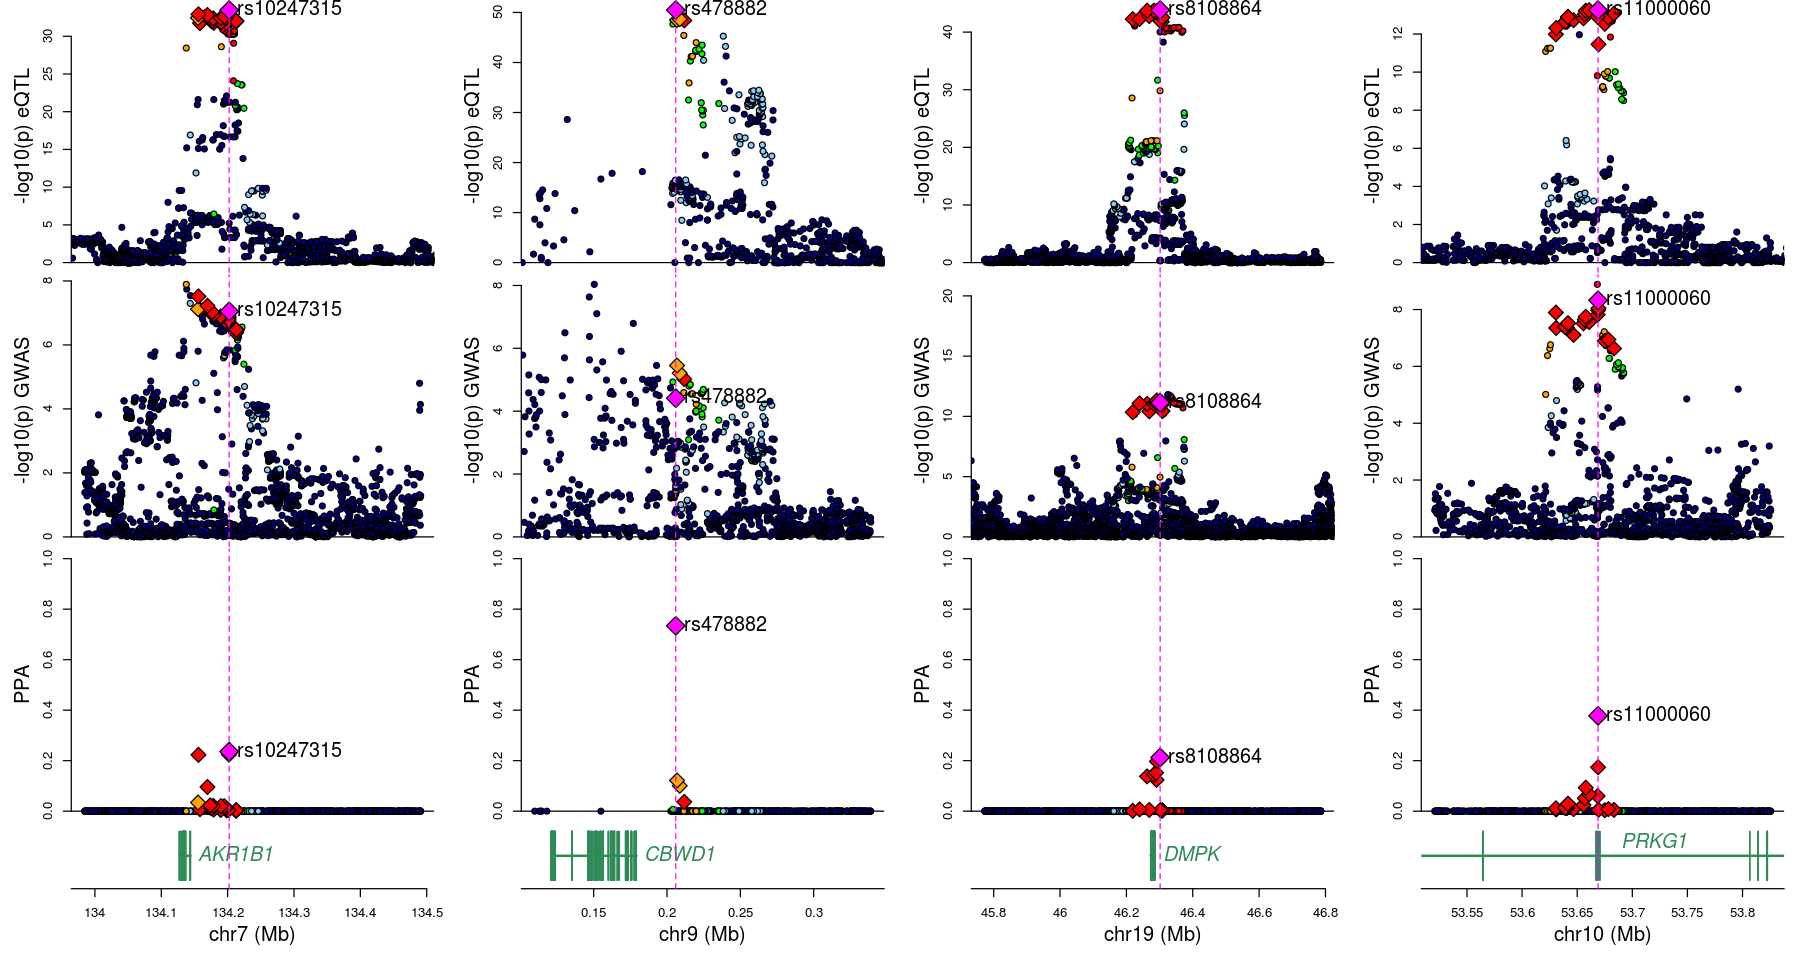

transcript_id        gene_id              type
1 ENSG00000085662.14_5 ENSG00000085662.14_5 0   
3 ENSG00000172785.18_5 ENSG00000172785.18_5 0   
6 ENST00000291270.9_3  ENSG00000104936.18_6 0   
8 ENST00000643582.1_1  ENSG00000185532.20_9 0   
2 ENSG00000167526.13_5 ENSG00000167526.13_5 0   
7 ENST00000565571.5_1  ENSG00000167526.13_5 0   
5 ENSG00000267280.5_8  ENSG00000267280.5_8  0   
4 ENSG00000251022.6_9  ENSG00000251022.6_9  0   
  gwas                                          locus                 gene_name
1 continuous-PP-both_sexes-combined_medadj_irnt 7_133984178_134490964 AKR1B1   
3 continuous-PP-both_sexes-combined_medadj_irnt 9_0_339313            CBWD1    
6 continuous-PP-both_sexes-combined_medadj_irnt 19_43889535_47004800  DMPK     
8 continuous-PP-both_sexes-combined_medadj_irnt 10_53520668_53825647  PRKG1    
2 continuous-PP-both_sexes-combined_medadj_irnt 16_89141459_90274092  RPL13    
7 continuous-PP-both_sexes-combined_medadj_irnt 16_89141459_90274092  RPL13    
5 continuous-PP-both_sexes-combined_medadj_irnt 17_58801973_59598250  TBX2-AS1 
4 continuous-PP-both_sexes-combined_medadj_irnt 4_83624890_84100125   THAP9-AS1

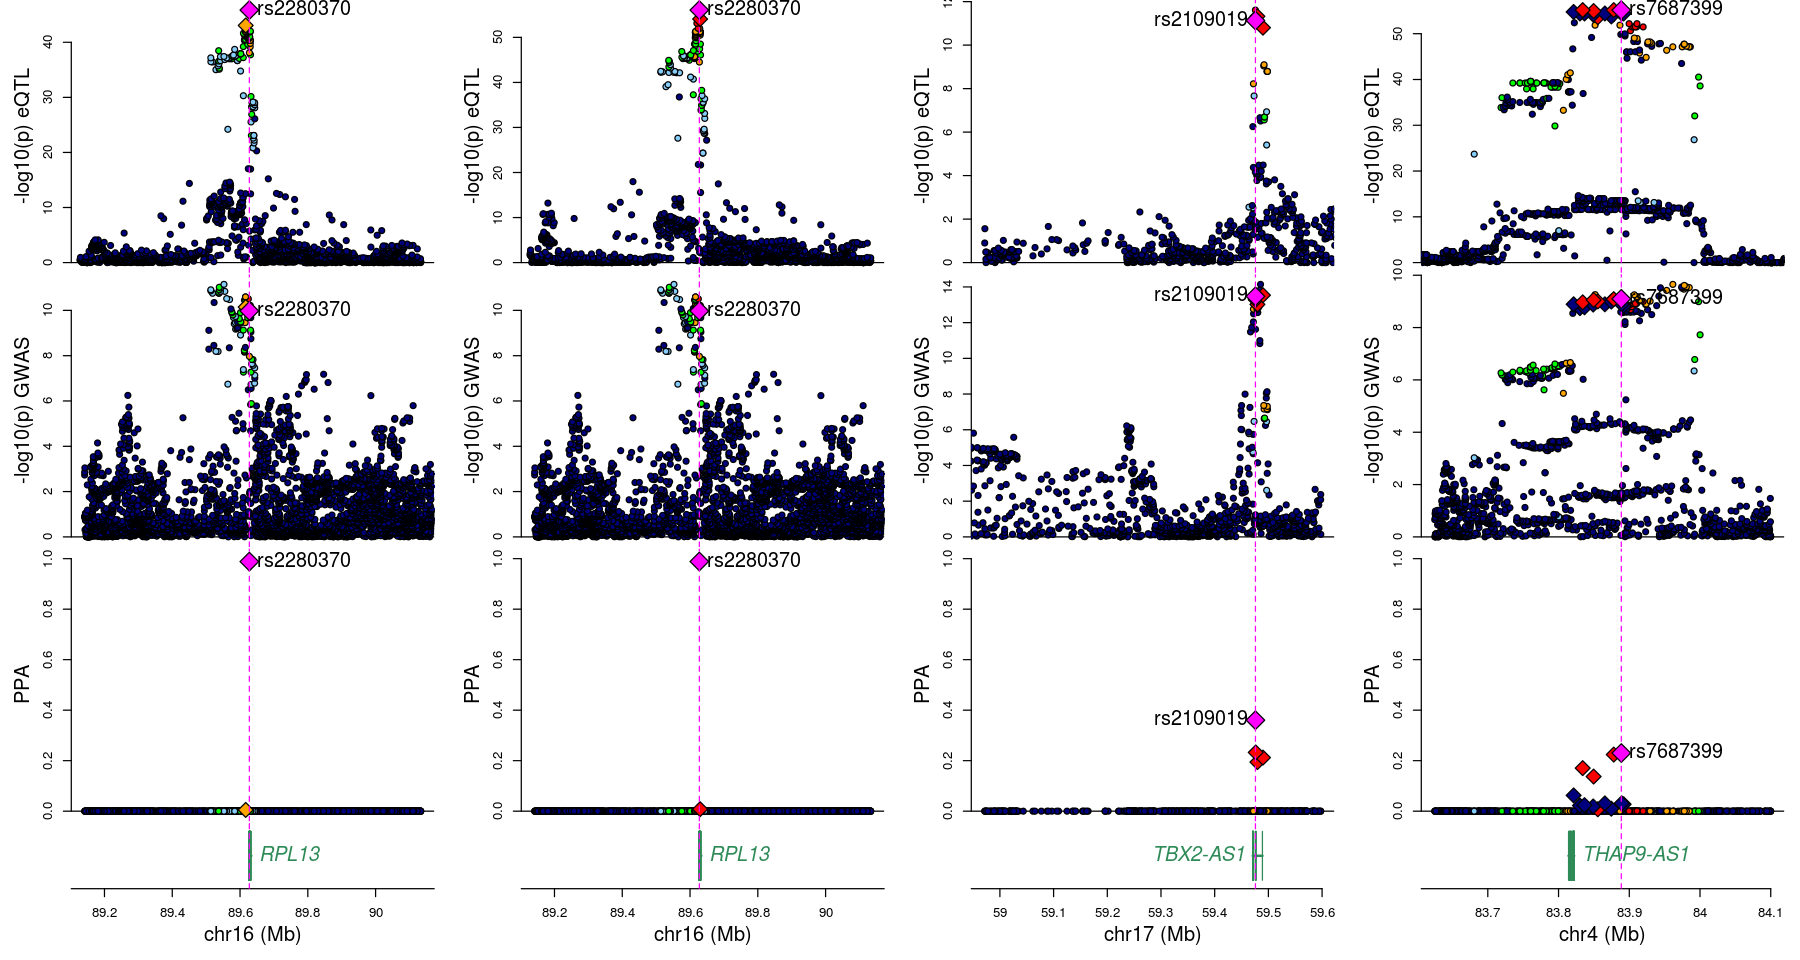

In [207]:

figure_s7 = function(size_x = 15, size_y = 8,to_png = FALSE)
{
    if(to_png == TRUE ){png(filename = paste(outfolder, "Figure_S7.png", sep = "/"), width = size_x, height = size_y, units = "in", res = 300)}
    if(to_png == FALSE){options(repr.plot.width = size_x, repr.plot.height = size_y)}
    
    toplot = merge(pph4    [ pph4$interaction.ipsc_cvpc == 1 & pph4$gwas == "continuous-PP-both_sexes-combined_medadj_irnt", c("transcript_id", "gene_id", "type", "gwas")],
                   pph4_old[ , c("transcript_id", "gene_id", "type", "gwas", "locus", "gene_name")],
                   by = c("transcript_id", "gene_id", "type", "gwas")
                  )
    
    toplot = toplot[order(toplot$gene_name, toplot$transcript_id),]
      
    myn = nrow(toplot) / 2
    tol = matrix(c(sort(rep(1:3, 2)), 4), nrow = 7, ncol = myn, byrow = FALSE) + matrix((1:(myn) - 1) * 4, nrow = 7, ncol = myn, byrow = TRUE)
    
    layout(tol)
    
    invisible(lapply(1:nrow(toplot), function(ii){plot_pp(fm_list_old, 
                                                          toplot[ii, "transcript_id"], 
                                                          toplot[ii, "type"         ],
                                                          toplot[ii, "gwas"         ],
                                                          toplot[ii, "locus"        ],
                                                          toplot[ii, "gene_name"    ],
                                                          c("", "", ""))}))

    if(to_png == TRUE ){dev.off()}
    if(to_png == FALSE){return(toplot)}
}

figure_s7(to_png = FALSE)
figure_s7(to_png = TRUE )


In [208]:
a = data.frame(overlap = c(101, 19, 51, 76, 72), single = c(308, 61, 133, 211, 109))
a$tot = rowSums(a)
a$fr  = a$overlap / a$tot

sum(a$overlap) / sum(a$tot)

a

[1] 0.2795793

overlap single tot fr       
1 101     308    409 0.2469438
2  19      61     80 0.2375000
3  51     133    184 0.2771739
4  76     211    287 0.2648084
5  72     109    181 0.3977901

## Figure S8: colocalization between iPSC-CVPC-associated eQTLs and GWAS (eIsoforms)

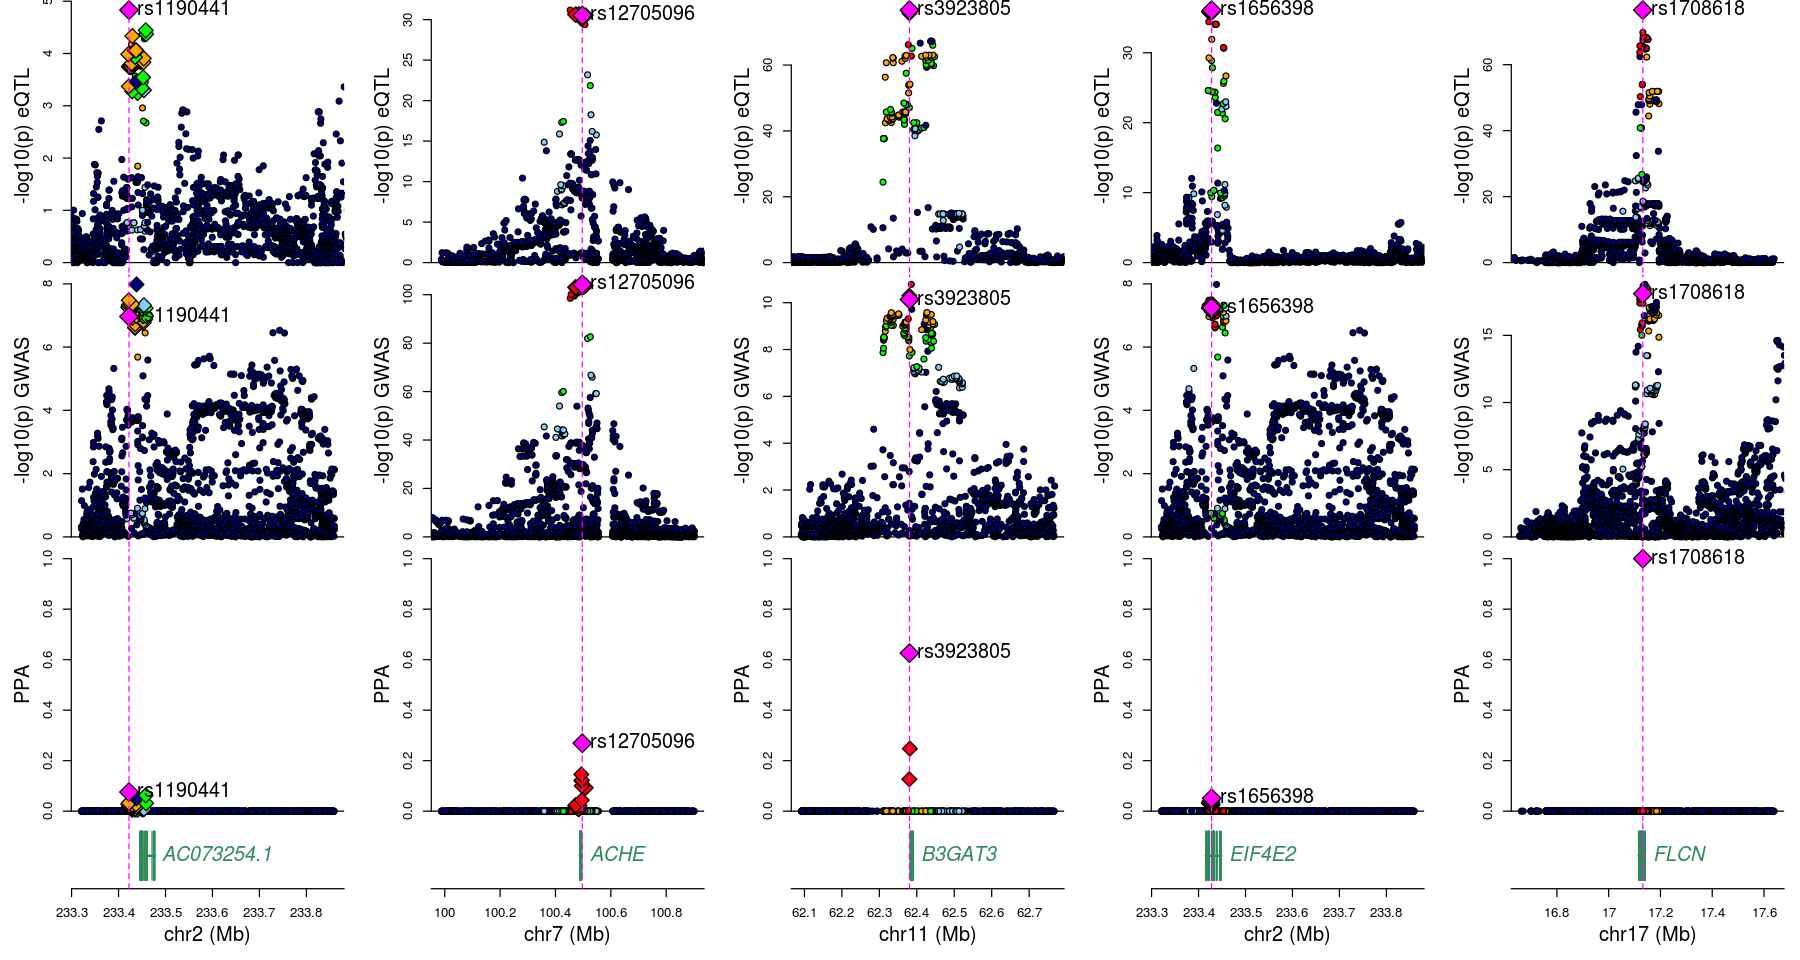

transcript_id         gene_id               type
8  ENST00000415506.6_2   ENSG00000237126.8_7   0   
1  ENSG00000087085.15_9  ENSG00000087085.15_9  0   
9  ENST00000531383.5_2   ENSG00000149541.10_5  0   
4  ENSG00000135930.14_10 ENSG00000135930.14_10 0   
5  ENSG00000154803.13_7  ENSG00000154803.13_7  0   
6  ENSG00000197562.10_5  ENSG00000197562.10_5  1   
2  ENSG00000103479.16_5  ENSG00000103479.16_5  0   
10 ENST00000562850.1_1   ENSG00000103479.16_5  0   
7  ENSG00000262655.4_5   ENSG00000262655.4_5   0   
3  ENSG00000127578.7_5   ENSG00000127578.7_5   0   
   gwas                           locus                 gene_name 
8  continuous-102-both_sexes-irnt 2_233320683_233859695 AC073254.1
1  continuous-102-both_sexes-irnt 7_98617923_100905508  ACHE      
9  continuous-102-both_sexes-irnt 11_62090700_62768021  B3GAT3    
4  continuous-102-both_sexes-irnt 2_233320683_233859695 EIF4E2    
5  continuous-102-both_sexes-irnt 17_16655649_18382343  FLCN      
6  continuous-102-both_sexes-irnt 16_233138_809630      RAB40C    
2  continuous-102-both_sexes-irnt 16_53293889_54014189  RBL2      
10 continuous-102-both_sexes-irnt 16_53293889_54014189  RBL2      
7  continuous-102-both_sexes-irnt 11_13130633_15190794  SPON1     
3  continuous-102-both_sexes-irnt 16_233138_809630      WFIKKN1

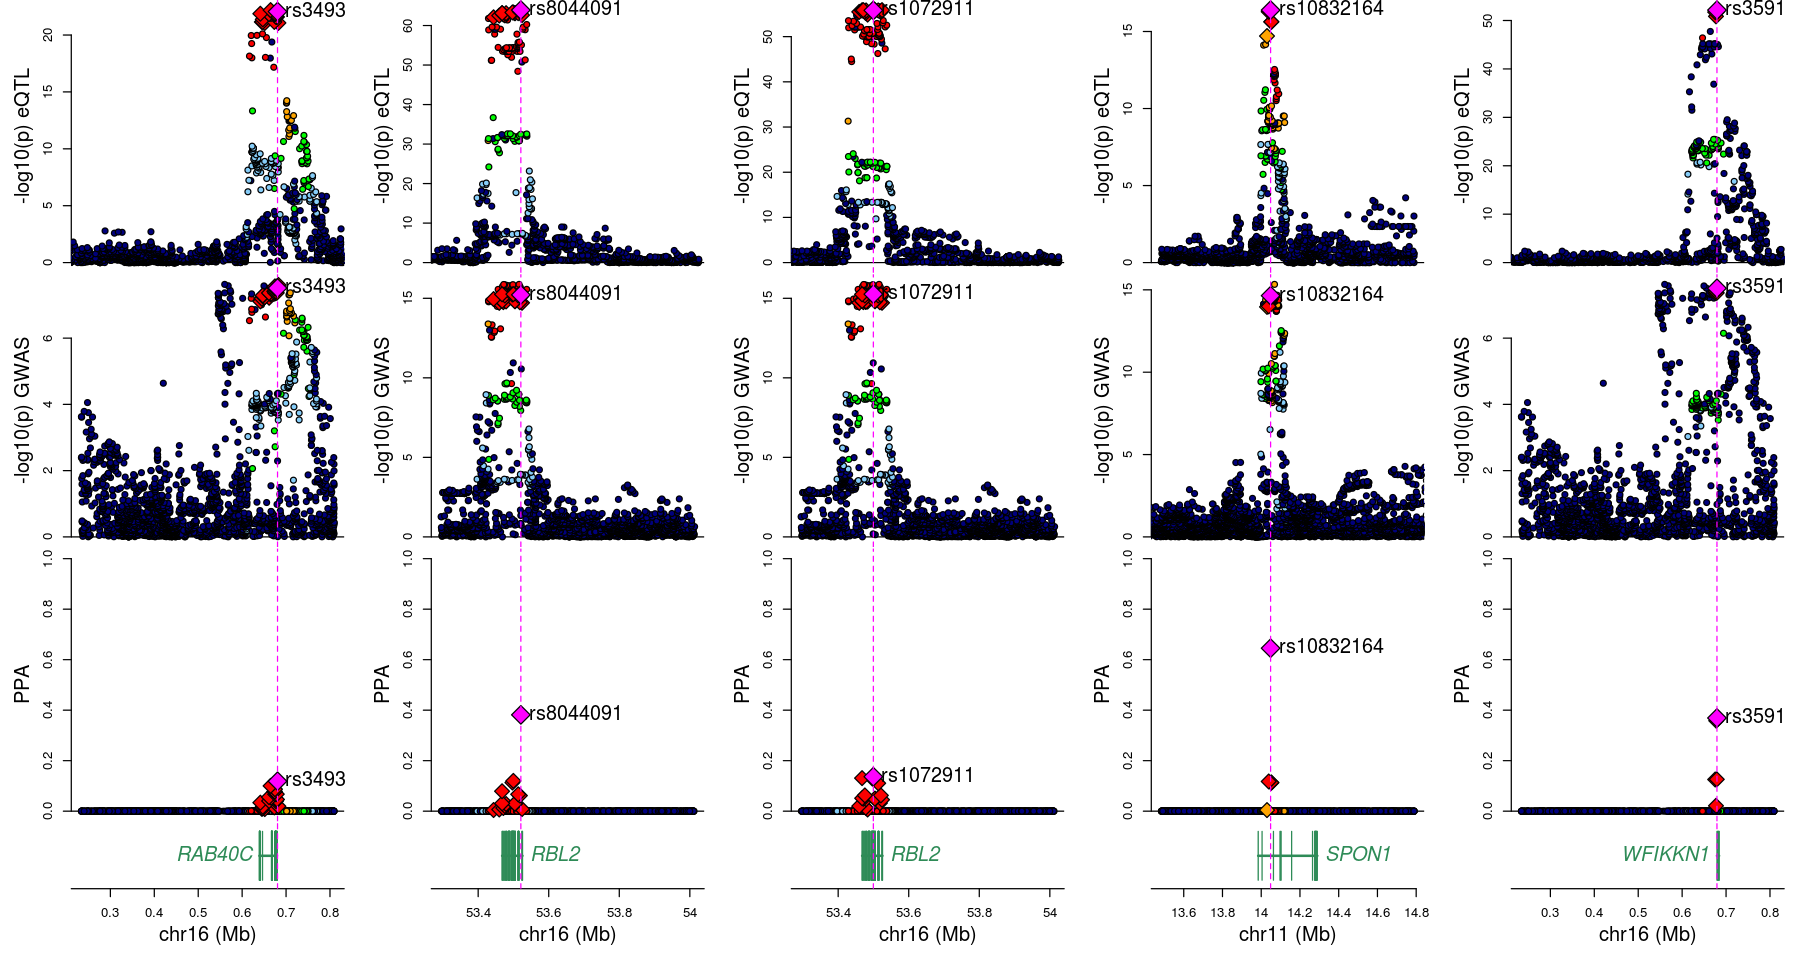

In [209]:

figure_s8 = function(size_x = 15, size_y = 8,to_png = FALSE)
{
    if(to_png == TRUE ){png(filename = paste(outfolder, "Figure_S8.png", sep = "/"), width = size_x, height = size_y, units = "in", res = 300)}
    if(to_png == FALSE){options(repr.plot.width = size_x, repr.plot.height = size_y)}
    
    toplot = merge(pph4    [ pph4$interaction.adult == 1 & pph4$gwas == "continuous-102-both_sexes-irnt", c("transcript_id", "gene_id", "type", "gwas")],
                   pph4_old[ , c("transcript_id", "gene_id", "type", "gwas", "locus", "gene_name")],
                   by = c("transcript_id", "gene_id", "type", "gwas")
                  )
    
    toplot = toplot[order(toplot$gene_name, toplot$transcript_id),]
      
    myn = nrow(toplot) / 2
    tol = matrix(c(sort(rep(1:3, 2)), 4), nrow = 7, ncol = myn, byrow = FALSE) + matrix((1:(myn) - 1) * 4, nrow = 7, ncol = myn, byrow = TRUE)
    
    layout(tol)
    
    layout(matrix(c(sort(rep(1:3, 2)), 4), nrow = 7, ncol = myn, byrow = FALSE) + matrix((1:myn - 1) * 4, nrow = 7, ncol = myn, byrow = TRUE))
    
    invisible(lapply(1:nrow(toplot), function(ii){plot_pp(fm_list_old, 
                                                          toplot[ii, "transcript_id"], 
                                                          toplot[ii, "type"         ],
                                                          toplot[ii, "gwas"         ],
                                                          toplot[ii, "locus"        ],
                                                          toplot[ii, "gene_name"    ],
                                                          c("", "", ""))}))
    
    

    if(to_png == TRUE ){dev.off()}
    if(to_png == FALSE){return(toplot)}
}

figure_s8(to_png = FALSE)
#figure_s8(to_png = TRUE )


In [210]:
qtl2int[ qtl2int$gene_name %in% c("ACHE", "EIF4E2", "FLCN", "RAB40C", "RBL2", "SPON1", "WFIKKN1", "AC073254.1", "B3GAT3", "RBL2") & qtl2int$interaction == "adult" & qtl2int$specific == TRUE,]

transcript_id         gene_id               gene_name  gene_type     
130333 ENST00000415506.6_2   ENSG00000237126.8_7   AC073254.1 lncRNA        
407647 ENSG00000087085.15_9  ENSG00000087085.15_9  ACHE       protein_coding
408503 ENSG00000103479.16_5  ENSG00000103479.16_5  RBL2       protein_coding
411679 ENSG00000135930.14_10 ENSG00000135930.14_10 EIF4E2     protein_coding
418471 ENSG00000197562.10_5  ENSG00000197562.10_5  RAB40C     protein_coding
420731 ENSG00000237126.8_7   ENSG00000237126.8_7   AC073254.1 lncRNA        
422501 ENSG00000262655.4_5   ENSG00000262655.4_5   SPON1      protein_coding
       start     end       strand chrom pos       ref                       ⋯
130333 233445658 233476681 -       2    233422237 A                         ⋯
407647 100487615 100494594 -       7    100453208 T                         ⋯
408503  53467889  53525560 +      16     53520998 T                         ⋯
411679 233415384 233448354 +       2    233427852 A                         ⋯
418471    639357    679272 +      16       664802 G                         ⋯
420731 233445658 233476681 -       2    233450785 GCAATGGAACTAATCCAGCACCATC ⋯
422501  13984270  14289679 +      11     14048480 C                         ⋯
       distance qval_int     qval_1       qval_0    int_signif cell specific
130333 54444    3.492892e-04 1.161338e-06 0.4076496 TRUE       TRUE TRUE    
407647 41386    1.569151e-03 2.524691e-08 0.9850942 TRUE       TRUE TRUE    
408503 53109    1.283089e-11 3.644949e-26 0.4094093 TRUE       TRUE TRUE    
411679 12468    6.189698e-08 1.010198e-23 0.1091298 TRUE       TRUE TRUE    
418471 25445    7.437514e-08 2.673195e-14 0.9840477 TRUE       TRUE TRUE    
420731 25896    3.027296e-02 6.474701e-07 0.8197207 TRUE       TRUE TRUE    
422501 64210    1.285749e-09 1.397634e-05 0.7301443 TRUE       TRUE TRUE    
       associated cell_type phenotype
130333 FALSE      tissue    isoform  
407647 FALSE      tissue    rna      
408503 FALSE      tissue    rna      
411679 FALSE      tissue    rna      
418471 FALSE      tissue    rna      
420731 FALSE      tissue    rna      
422501 FALSE      tissue    rna

## Figure 6: examples of stage and cell type-associated eQTLs colocalizing with cardiac traits¶

In [217]:
suppressPackageStartupMessages(library(coloc  ))
suppressPackageStartupMessages(library(plotrix))


In [218]:
tofm      = signals2fm[ signals2fm$fm == TRUE,]
fm_report = readRDS("pipeline/eqtls.0.1.coloc_gwas/fm_report.rds")

In [219]:
fm2cat = fread("pipeline/eqtls.0.1.coloc_gwas/fm2cat.txt", sep = "\t", header = TRUE, data.table = FALSE)
fm2cat[ fm2cat$cat %in% c("high D'", "high D' IN"), "cat"] = ""
fm2cat[ fm2cat$r2 >= 0.2 & fm2cat$r2 < 0.8 & fm2cat$d >= 0.6, "cat"] = "low R2"

In [220]:
table(fm2cat$cat)


              high R2 in catalog     low R2 
       129         13         43         25 

In [221]:
table(fm2cat$cat)
signif(table(fm2cat$cat) / nrow(fm2cat) * 100, digits = 3)

nrow(fm2cat)



              high R2 in catalog     low R2 
       129         13         43         25 


              high R2 in catalog     low R2 
     61.40       6.19      20.50      11.90 

[1] 210

In [222]:
13+43+25
(13+43+25)/210

[1] 81

[1] 0.3857143

In [223]:
pph4_old[ pph4_old$gene_name == "GNB4", "locus"]

[1] "3_178880621_179280937"

In [224]:
fm2cat[ fm2cat$cat == "high R2", c("transcript_id", "gene_name", "type", "rsid", "gwas", "pmid", "r2", "d", "overlap")]

pph4_old[ pph4_old$gene_name == "CAV1", "locus"]

transcript_id        gene_name type rsid      
28  ENSG00000087258.15_6 GNAO1     1    rs9937815 
45  ENST00000257659.12_1 GTPBP10   1    rs12535435
47  ENSG00000105974.12_6 CAV1      0    rs11773845
56  ENSG00000114450.10_6 GNB4      0    rs11922153
75  ENSG00000127920.6_4  GNG11     0    rs180267  
79  ENSG00000130177.16_5 CDC16     0    rs7994556 
83  ENST00000490599.2_3  SLC35D2   0    rs7860871 
110 ENSG00000146731.11_4 CCT6A     0    rs7793921 
115 ENST00000372980.4_3  JPH2      1    rs6130557 
124 ENSG00000156966.7_4  B3GNT7    0    rs13025087
176 ENSG00000197555.9_5  SIPA1L1   0    rs35866366
192 ENSG00000235387.5_8  SPAAR     0    rs10972618
200 ENSG00000251022.6_9  THAP9-AS1 0    rs7687399 
    gwas                                          pmid                      
28  continuous-PP-both_sexes-combined_medadj_irnt 27841878                  
45  continuous-PP-both_sexes-combined_medadj_irnt 30224653                  
47  continuous-12340-both_sexes-irnt              30012220                  
56  continuous-102-both_sexes-irnt                23583979;27798624;29769521
75  continuous-102-both_sexes-irnt                29497042                  
79  continuous-PP-both_sexes-combined_medadj_irnt 30595370                  
83  continuous-102-both_sexes-irnt                27798624                  
110 continuous-PP-both_sexes-combined_medadj_irnt 30224653                  
115 continuous-PP-both_sexes-combined_medadj_irnt 30595370                  
124 continuous-102-both_sexes-irnt                23583979                  
176 continuous-12340-both_sexes-irnt              27659466                  
192 continuous-102-both_sexes-irnt                27798624                  
200 continuous-PP-both_sexes-combined_medadj_irnt 30578418                  
    r2    d     overlap   
28  0.987 0.997 rs56143613
45  0.840 0.991 rs11770630
47  0.995 0.998 rs3807989 
56  0.914 0.990 rs7612445 
75  0.962 1.000 rs180253  
79  0.927 1.000 rs9590403 
83  0.878 0.999 rs10820614
110 0.812 1.000 rs6593297 
115 0.935 0.998 rs6017281 
124 0.920 0.970 rs13030174
176 0.821 0.970 rs12880291
192 0.828 0.982 rs748802  
200 0.866 1.000 rs6535419

[1] "7_115750462_116671847" "7_115750462_116671847" "7_115750462_116671847"

In [225]:
head(fm_list_old[[ paste( "ENSG00000114450.10_6", 0, "continuous-102-both_sexes-irnt", "3_178880621_179280937", sep = ":")]][["finemap"]])

id                  pp           pos       cum       cs   
503 VAR_3_179172593_A_G 4.403855e-01 179172593 0.4403855  TRUE
505 VAR_3_179173224_A_T 4.026144e-01 179173224 0.8429999  TRUE
504 VAR_3_179172979_G_T 1.570001e-01 179172979 1.0000000  TRUE
498 VAR_3_179169230_T_G 3.352602e-08 179169230 1.0000000 FALSE
506 VAR_3_179173620_C_A 7.531227e-20 179173620 1.0000000 FALSE
507 VAR_3_179173969_A_T 7.413770e-20 179173969 1.0000000 FALSE

rs2723064 -4167

rs535411 -28464

rs2723064 -4167

rs535411 -28464



png 
  2

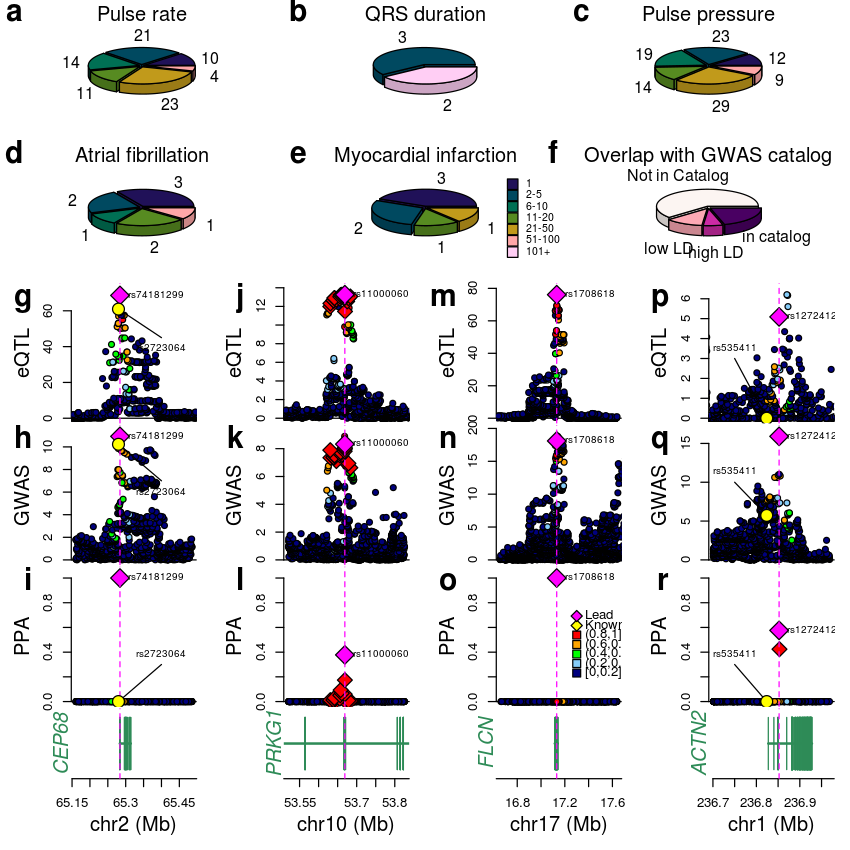

In [288]:
plot_bar_fm = function(panel = "")
{
    toplot       = fm_report$cs2bin
    toplot$cum   = unlist(lapply(1:nrow(toplot), function(ii){sum(toplot[1:ii, "per"]) - toplot[ii, "per"]}))
    toplot$color = sequential_hcl(n = nrow(toplot), palette = "Batlow", rev = FALSE)
    
    par(mar = c(1,4,1,1))
    plot(1,1, type = "n", xlim = c(-0.15, 1), ylim = c(0.45, 1.1), xlab = "", ylab = "", axes = FALSE)
    
    rect(xleft = toplot$cum, xright = toplot$cum + toplot$per, ybottom = 0.65, ytop = 0.75, col = toplot$color)
    
    toplot[ toplot$name == "51-100", "per"] = toplot[ toplot$name == "51-100", "per"] * 0.7
    
    text(x = toplot$cum + toplot$per / 2, y = 0.9, labels = toplot$name, cex = 1.5)
    text(x = toplot$cum + toplot$per / 2, y = 0.8, labels = toplot$n   , cex = 1.5)
    
    mtext(text = panel, side = 2, line = 2.5, las = 2, at = 1.1, cex = 1.5, font = 2)
    
    segments(x0 = 0, x1 = 1        , y0 = 1  )
    segments(x0 = 0, x1 = 1540/1559, y0 = 0.6)
    segments(x0 = 0,                 y0 = 0.6, y1 = 0.65, lty = "dotted")
    segments(x0 = 1540/1559,         y0 = 0.6, y1 = 0.65, lty = "dotted")
    
    
    text(x = 0.5            , y = 1  , cex = 1.5, pos = 3, labels = paste(sum(toplot$n                           ), "Fine mapped GWAS signals"))
    text(x = 0.5 * 1540/1559, y = 0.5, cex = 1.5, pos = 3, labels = paste(sum(toplot[ toplot$name != "101+", "n"]), "Resolved GWAS signals"))
    text(x = 0              , y = 0.9, cex = 1.5, pos = 2, labels = "Credible set size:")
    text(x = 0              , y = 0.8, cex = 1.5, pos = 2, labels = "Signals (N):")
}

figure_pie_fm = function(indata, cs2bin, trait = "", panel = "")
{
    if(trait != "")
    {
        indata = indata[ indata$gwas == trait, ]
    }
    
    cs2bin_table     = table(indata$csbin)
    cs2bin_table     = data.frame(name = names(cs2bin_table), n = as.numeric(cs2bin_table))
    cs2bin           = merge(cs2bin, cs2bin_table)
    cs2bin           = cs2bin[order(cs2bin$bin),]
    
    par(mar = c(1,1,1,1))
    mypie = pie3D(cs2bin$n, labels = ""      , radius = 1, explode  = 0.05, col      = cs2bin$color, mar = c(1,1,1,1))
    pie3D.labels (mypie   , labels = cs2bin$n, radius = 1.2, labelcex = 0.8   , labelrad = 1.2)
    
    mtext(text = panel                  , side = 2, line =  4  , las = 2, at = 1.2, cex = 1.5, font = 2)
    mtext(text = manifest[trait, "name"], side = 3, line = -0.5, cex = 1)
}

plot_pp = function(fm_list, transcript_id, type, trait, locus, genes_to_exons, panels = rep("", 3))
{
    indata            = fm_list[[paste(transcript_id, type, trait, locus, sep = ":")]]
    gwas              = indata$gwas
    gwas              = gwas[is.na(gwas$pval) == FALSE,]
    qtl               = indata$qtl
    finemap           = indata$finemap
    ids               = indata$credible_set
    id                = finemap[1,"id"]
    rsid              = qtl    [id, "rsid"]
    xlims             = range(finemap$pos)
    qtl $logp         = -log10(qtl $pval)
    gwas$logp         = -log10(gwas$pval)
    rownames(finemap) = finemap$id
    qtl               = change_color_points(qtl    , rsid, ids, "logp", "qtl"    , qtl)
    gwas              = change_color_points(gwas   , rsid, ids, "logp", "gwas"   , qtl)
    finemap           = change_color_points(finemap, rsid, ids, "pp"  , "finemap", qtl)
    
    if(transcript_id == "ENSG00000274070.2_4"){xlims[[2]] = xlims[[2]] + 100000}
    
    par(mar = c(0.1,4.5, 0, 1))
    
    snp_pos = 4
    if(transcript_id %in% c("ENSG00000221963.6_4", "ENSG00000274070.2_4")){snp_pos = 2}
    
    # plot QTL signal
    plot(1,1, type = "n", xlim = xlims, ylim = c(0, max(qtl$logp) * 1.05), xlab = "", ylab = "", axes = FALSE)
    axis(2)
    
    abline(h = 0)
    points(qtl$pos, qtl$logp, cex = qtl$cex, pch = qtl$pch, bg = qtl$bg)
    abline(v = qtl[id, "pos"], lty = "dashed", col = "#ff00ff")
    text  (    qtl[id, "pos"], qtl[id, "logp"], cex = 0.75, labels = rsid, pos = snp_pos)
    
    mtext(text = "eQTL", side = 2, line = 2.5)
    mtext(text = panels[[1]]     , side = 2, line = 2.5, las = 2, at = max(qtl$logp), cex = 1.5, font = 2)
    
    if(transcript_id %in% c("ENSG00000077522.13_4"))
    {
        segments(x0 = 236823818, x1 = 236750000, y0 = 0, y1 = 3)
        text  (236750000, 3, cex = 0.75, labels = "rs535411", pos = 3)
        points(236823818, 0, cex = 2  , pch = 21, bg = "#ffff00")
        
        message(paste("rs535411", (236823818-qtl[id, "pos"])))
    }
    if(transcript_id %in% c("ENSG00000011523.14_5"))
    {
        segments(x0 = 65279805, x1 = 65400000, y0 = 60.95421, y1 = 45)
        text  (65400000, 45, cex = 0.75, labels = "rs2723064", pos = 1)
        points(65279805, 60.95421, cex = 2  , pch = 21, bg = "#ffff00")
        message(paste("rs2723064", (65279805-qtl[id, "pos"])))
    }
    
    if(nrow(gwas[ is.infinite(gwas$logp) == TRUE, ]) > 0){gwas[ is.infinite(gwas$logp) == TRUE, "logp"] = max(gwas[ is.infinite(gwas$logp) == FALSE, "logp"])}
    
    # plot GWAS signal
    plot(1,1, type = "n", xlim = xlims, ylim = c(0, max(gwas$logp) * 1.05), xlab = "", ylab = "", axes = FALSE)
    axis(2)
    
    abline(h = 0)
    points(gwas$pos, gwas$logp, cex = gwas$cex, pch = gwas$pch, bg = gwas$bg)
    text  (    gwas[id, "pos"], gwas[id, "logp"], cex = 0.75, labels = rsid, pos = snp_pos)
    abline(v = gwas[id, "pos"], lty = "dashed", col = "#ff00ff")
    
    mtext(text = "GWAS", side = 2, line = 2.5)
    mtext(text = panels[[2]]     , side = 2, line = 2.5, las = 2, at = max(gwas$logp), cex = 1.5, font = 2)
    
    if(transcript_id %in% c("ENSG00000077522.13_4"))
    {
        segments(x0 = 236823818, x1 = 236750000, y0 = 5.72538, y1 = 10)
        text  (236750000, 10      , cex = 0.75, labels = "rs535411", pos = 3)
        points(236823818,  5.72538, cex = 2  , pch = 21, bg = "#ffff00")
        
    }
    if(transcript_id %in% c("ENSG00000011523.14_5"))
    {
        segments(x0 = 65279805, x1 = 65400000, y0 = 10.23232, y1 = 7)
        text  (65400000, 7       , cex = 0.75, labels = "rs2723064", pos = 1)
        points(65279805, 10.23232, cex = 2  , pch = 21, bg = "#ffff00")
    }
    
    # plot PP
    pp = finemap

    plot(1,1, type = "n", xlim = xlims, ylim = c(0, 1.05), xlab = "", ylab = "", axes = FALSE)
    axis(2)
    
    abline(h = 0)
    points(pp$pos, pp$pp, cex = pp$cex, pch = pp$pch, bg = pp$bg)
    text  (    pp[id, "pos"], pp[id, "pp"], cex = 0.75, labels = rsid, pos = snp_pos)
    abline(v = pp[id, "pos"], lty = "dashed", col = "#ff00ff")
    
    if(transcript_id %in% c("ENSG00000114450.10_6")){text  (pp[id, "pos"], 0.16, cex = 0.75, labels = "rs7612445", pos = snp_pos)}

    if(transcript_id %in% c("ENSG00000077522.13_4"))
    {
        segments(x0 = 236823818, x1 = 236750000, y0 = 0, y1 = 0.3)
        text  (236750000, 0.3, cex = 0.75, labels = "rs535411", pos = 3)
        points(236823818, 0  , cex = 2  , pch = 21, bg = "#ffff00")
    }
    if(transcript_id %in% c("ENSG00000011523.14_5"))
    {
        segments(x0 = 65279805, x1 = 65400000, y0 = 0, y1 = 0.3)
        text  (65400000, 0.3, cex = 0.75, labels = "rs2723064", pos = 3)
        points(65279805, 0  , cex = 2  , pch = 21, bg = "#ffff00")
    }

    mtext(text = "PPA"      , side = 2, line = 2.5)
    mtext(text = panels[[3]], side = 2, line = 2.5, las = 2, at = 1, cex = 1.5, font = 2)
    
    if(panels[[3]] == "o")
    {
        tol     = data.frame(min   = (0:6) * 0.2, 
                             max   = (1:7) * 0.2, 
                             y     = (1:7 + 2) / 13, 
                             color = c("#00007e", "#86cdf9", "#01fe02", "#fea500", "#fc0000", "#ffff00", "#ff00ff"),
                             pch   = 22
                            )

        tol$lab = paste0(c("[", rep("(", 4)), tol$min, ",", tol$max, rep("]", 5))
        tol[nrow(tol)  , "lab"] = "Lead"
        tol[nrow(tol)-1, "lab"] = "Known"
        tol[nrow(tol)  , "pch"] = 23
        tol[nrow(tol)-1, "pch"] = 23


        points(x = rep(17.3e6, 7), y = tol$y, bg     = tol$color, cex = 1.5, pch = tol$pch)
        text  (x = rep(17.3e6, 7), y = tol$y, labels = tol$lab  , cex = 1  , pos =  4)

    }
    
    
    # plot exons
    genes_plot   = coordinates[ coordinates$gene_name %in% genes_to_exons & coordinates$phenotype == "rna",]
    exons_plot   = exons      [ exons      $gene_name %in% genes_to_exons,]
    genes_plot   = genes_plot[order(genes_plot$start),]
    genes_plot$y = 1:nrow(genes_plot)
    
    par(mar = c(4.5, 4.5, 0, 1))
    plot(1,1, type = "n", xlim = xlims, ylim = c(nrow(genes_plot),0), xlab = "", ylab = "", axes = FALSE)
    
    axis(1, at = pretty(xlims), labels = pretty(xlims) * 1e-6)
    
    for(gene in genes_plot$gene_name)
    {
        
        y0      = genes_plot[ genes_plot$gene_name == gene, "y"]
        exons_x = exons_plot[ exons_plot$gene_name == gene, ]
        mypos   = 4
        myx     = max(exons_x$end)
        myy     = 0.5
        
        if(gene %in% c("HMGB1", "CASTOR2", "APOL6")){mypos = 2}
        if(gene %in% c("HMGB1", "CASTOR2", "APOL6")){myx   = min(exons_x$start)}
        if(gene %in% c("PRKG1"                    )){myx   = gwas[id, "pos"]}
        if(gene %in% c("PRKG1"                    )){myy   = 0.7}
        
        
        rect(xleft = exons_x$start, xright = exons_x$end, ybottom = y0 - 0.1, ytop = y0 - 0.9, col = "#2E8B57", border = "#2E8B57")
        segments(x0 = min(exons_x$start), x1 = max(exons_x$end), y0 = y0 - 0.5, col = "#2E8B57", lwd = 2)
        #text(x = myx, y = myy, labels = gene, cex = 1.5, col = "#2E8B57", font = 3, pos = mypos)
        mtext(text = gene, side = 2, line = 0, font = 3, col = "#2E8B57")
    }

    abline(v = pp[id, "pos"], lty = "dashed", col = "#ff00ff")
    
    mtext(text = paste0("chr", unlist(strsplit(locus, "_"))[[1]], " (Mb)"), side = 1, line = 2.5)
}

figure_pie_catalog = function(fm2cat, panel = "")
{
    toplot             = table(fm2cat$cat)
    names(toplot)[[1]] = "Not in Catalog"
    names(toplot)      = gsub("R2", "LD", names(toplot))
    toplot             = toplot[c(1,4,2,3)]
    
    par(mar = c(1,1,1,1))
    mypie = pie3D(toplot, labels = ""           , radius = 1, explode  = 0.05, col      = sequential_hcl(n = length(toplot), palette = "RdPu", rev = TRUE), mar = c(1,1,1,1))
    pie3D.labels (mypie, labels = names(toplot), radius = 1.2, labelcex = 0.8   , labelrad = 1.4)
    
    mtext(text = panel                      , side = 2, line =  6, las = 2, at = 1.2, cex = 1.5, font = 2)
    mtext(text = "Overlap with GWAS catalog", side = 3, line = -0.5, cex = 1)
}

figure_6 = function(size_x = 7.08661, size_y = 7.08661,to_png = FALSE)
{
    #if(to_png == TRUE ){png(filename = paste(outfolder, "Figure_6.png", sep = "/"), width = size_x, height = size_y, units = "in", res = 300)}
    if(to_png == TRUE ){pdf(file = paste(outfolder, "Figure_6.pdf", sep = "/"), width = size_x, height = size_y)}
    if(to_png == FALSE){options(repr.plot.width = size_x, repr.plot.height = size_y)}

    my_layout = rbind(sort(rep(1:3, 4)), 
                      sort(rep(4:6, 4)), 
                      cbind(1:4 +  6,
                            1:4 +  6,
                            1:4 +  6,
                            1:4 + 10,
                            1:4 + 10,
                            1:4 + 10,
                            1:4 + 14,
                            1:4 + 14,
                            1:4 + 14,
                            1:4 + 18,
                            1:4 + 18,
                            1:4 + 18
                           )
                     )
    layout(my_layout)
    
    manifest$panel = letters[1:nrow(manifest)]
    cs2bin         = fm_report$cs2bin
    cs2bin$color   = sequential_hcl(n = nrow(cs2bin), palette = "Batlow", rev = FALSE)
    cs2bin$n       = NULL
    cs2bin$per     = NULL
    
    #figure_pie_fm(fm_report$data, cs2bin, "", "A")
    invisible(lapply(manifest$id, function(trait){figure_pie_fm(fm_report$data, cs2bin, trait, manifest[trait, "panel"])}))
    
    par(new = TRUE)
    par(mar = c(1,4,1,0))
    plot(1,1, type = "n", xlim = c(-3,1), ylim = c(nrow(cs2bin) + 1, -1), xlab = "", ylab = "", axes = FALSE)
    
    points(x = rep(0.1, nrow(cs2bin)), y = cs2bin$bin, cex = 2   , pch = 22, bg = cs2bin$color)
    text  (x = rep(0.2, nrow(cs2bin)), y = cs2bin$bin, cex = 0.8 , labels = cs2bin$name        , pos = 4)
    #text  (x = 0.05                   , 0             , cex = 1.5, labels = "Credible set size", pos = 4)
    
    figure_pie_catalog(fm2cat, "f")

    #plot_pp(fm_list_old, "ENSG00000114450.10_6", 0, "continuous-102-both_sexes-irnt", "3_178880621_179280937", c("GNB4" ), c("G", "H", "I"))
    #plot_pp(fm_list_old, "ENSG00000165097.16_6", 0, "icd10-I48-both_sexes", "3_178880621_179280937", c("KDM1B" ), c("G", "H", "I"))
    plot_pp(fm_list_old, "ENSG00000011523.14_5", 0, "icd10-I48-both_sexes", "2_65160344_65486462", c("CEP68" ), c("g", "h", "i"))
    plot_pp(fm_list_old, "ENST00000643582.1_1" , 0, "continuous-PP-both_sexes-combined_medadj_irnt", "10_53520668_53825647", c("PRKG1"), c("j", "k", "l"))
    plot_pp(fm_list_old, "ENST00000389168.6_2" , 0, "continuous-102-both_sexes-irnt", "17_16655649_18382343" , c("FLCN" ), c("m", "n", "o"))
    plot_pp(fm_list_old, "ENSG00000077522.13_4", 0, "continuous-102-both_sexes-irnt", "1_236701085_236970255", c("ACTN2"), c("p", "q", "r"))
    
    if(to_png == TRUE ){dev.off()}
}

figure_6(to_png = FALSE)
figure_6(to_png = TRUE )


In [235]:
manifest

trait_type phenocode pheno_sex 
continuous-102-both_sexes-irnt                continuous 102       both_sexes
continuous-12340-both_sexes-irnt              continuous 12340     both_sexes
continuous-PP-both_sexes-combined_medadj_irnt continuous PP        both_sexes
icd10-I48-both_sexes                          icd10      I48       both_sexes
phecode-411.2-both_sexes                      phecode    411.2     both_sexes
                                              coding modifier            
continuous-102-both_sexes-irnt                NA     irnt                
continuous-12340-both_sexes-irnt              NA     irnt                
continuous-PP-both_sexes-combined_medadj_irnt NA     combined_medadj_irnt
icd10-I48-both_sexes                          NA                         
phecode-411.2-both_sexes                      NA                         
                                              description                                                                
continuous-102-both_sexes-irnt                Pulse rate, automated reading                                              
continuous-12340-both_sexes-irnt              QRS duration                                                               
continuous-PP-both_sexes-combined_medadj_irnt Pulse pressure, combined automated + manual reading, adjusted by medication
icd10-I48-both_sexes                          I48 Atrial fibrillation and flutter                                        
phecode-411.2-both_sexes                      Myocardial infarction                                                      
                                              description_more                                                                                              
continuous-102-both_sexes-irnt                This is the pulse rate measured during the automated blood pressure readings.                                 
continuous-12340-both_sexes-irnt              QRS duration during ECG measurement                                                                           
continuous-PP-both_sexes-combined_medadj_irnt SBP (4080, 93) - DBP (4079, 94), adjusted by the use of blood pressure lowering medication (6153_2 and 6177_2)
icd10-I48-both_sexes                          truncated: true                                                                                               
phecode-411.2-both_sexes                                                                                                                                    
                                              coding_description
continuous-102-both_sexes-irnt                NA                
continuous-12340-both_sexes-irnt              NA                
continuous-PP-both_sexes-combined_medadj_irnt NA                
icd10-I48-both_sexes                          NA                
phecode-411.2-both_sexes                      NA                
                                              category                                                                                                                  
continuous-102-both_sexes-irnt                UK Biobank Assessment Centre > Physical measures > Blood pressure                                                         
continuous-12340-both_sexes-irnt              UK Biobank Assessment Centre > Physical measures > ECG at rest, 12-lead                                                   
continuous-PP-both_sexes-combined_medadj_irnt                                                                                                                           
icd10-I48-both_sexes                          Chapter IX Diseases of the circulatory system | I30-I52 Other forms of heart disease | I48 Atrial fibrillation and flutter
phecode-411.2-both_sexes                      circulatory system                                                                                                        
                                              n_cases_fu

In [ ]:
a[ grepl("ENST00000643582.1_1", a)]

In [ ]:
str(x)
x[ x$pos == 65279805,]

In [ ]:
rbind(sort(rep(1:3, 4)), 
      sort(rep(4:6, 4)), 
      cbind(1:4 +  6,
            1:4 +  6,
            1:4 +  6,
            1:4 + 10,
            1:4 + 10,
            1:4 + 10,
            1:4 + 14,
            1:4 + 14,
            1:4 + 14,
            1:4 + 18,
            1:4 + 18,
            1:4 + 18
           )
     )


In [ ]:
table(fm2cat$cat)

In [ ]:
table(fm2cat$cat)

In [ ]:
head(toex[ toex$rsid %in% setdiff(signals2fm$rsid, catalog$rsid),], n = 15)

# Supplemental Tables

## Table S1: eQTL metadata

In [ ]:
table_s1           = merge(exp_data$metadata[,c("run", "wgs_id", "subject_id", "subject_name", "study", "tissue", "body_site", "phenotype", "udid")], exp_data$covariates[,c("run", "sex", "total_reads_norm", "mitochondrial_reads", grep("cibersort", colnames(exp_data$covariates), value = TRUE))])
table_s1           = table_s1[ table_s1$phenotype == "rna",]
table_s1$study     = mapvalues(x    =              table_s1$study    , from = c("ipscore", "gtex"              ), to = c("iPSCORE" , "GTEx"                ), warn_missing = FALSE)
table_s1$tissue    = mapvalues(x    =              table_s1$tissue   , from = c("arteria", "heart", "ipsc_cvpc"), to = c("Arteria" , "Heart"  , "iPSC-CVPC"), warn_missing = FALSE)
table_s1$sex       = mapvalues(x    = as.character(table_s1$sex)     , from = c("0"      , "1"                 ), to = c("Male"    , "Female"              ), warn_missing = FALSE)
table_s1$body_site = mapvalues(x    =              table_s1$body_site, 
                               from = c("arteria_aorta", "arteria_coronary", "heart_atrium"    , "heart_ventricle", "ipsc_cvpc"), 
                               to   = c("Aorta"        , "Coronary artery" , "Atrial appendage", "Left ventricle" , "iPSC-CVPC"), 
                               warn_missing = FALSE)
table_s1$phenotype = NULL
colnames(table_s1) = c("Assay ID (SRA run ID)", "WGS ID", "Subject ID", "Subject name", "Study", "Tissue", "Body site", "UDID", "Sex", "Reads (normalized)", "Mitochondrial reads (%)", gsub("cibersort.regular.", "", gsub("_", " ", grep("cibersort", colnames(exp_data$covariates), value = TRUE))))

fwrite(table_s1, paste(outfolder, "Table_S1.csv", sep = "/"), sep = ",", col.names = TRUE, row.names = FALSE)

## Table S2: eGenes and eIsoforms

In [ ]:
mycols              = c("phenotype", "transcript_id", "gene_id", "gene_name", "gene_type", "type", "id", "chrom", "pos", "ref", "alt", "rsid", "beta", "se", "pval", "tests", "fdr", "qval", "egene")
table_s2a           = qtl_data[["qtl"]][["rna"    ]]
table_s2b           = qtl_data[["qtl"]][["isoform"]]
table_s2a$phenotype = "Gene"
table_s2b$phenotype = "Isoform"
table_s2            = rbind(table_s2a[order(table_s2a$chrom, table_s2a$start, table_s2a$type), mycols], 
                            table_s2b[order(table_s2b$chrom, table_s2b$start, table_s2b$type), mycols])
table_s2$type       = mapvalues(as.character(table_s2$type), from = as.character(0:5), to = c("Primary", paste ("Conditional", 1:5)), warn_missing = FALSE)
table_s2$egene      = mapvalues(             table_s2$egene, from = c(TRUE, FALSE   ), to = c("Yes", "No"                          ), warn_missing = FALSE)
colnames(table_s2)  = c("Phenotype", "Transcript ID", "Gene ID", "Gene name", "Gene type", 
                        "Primary or conditional", "SNP ID", "Chromosome", "Position", "Reference allele", "Alternative allele", "RS ID", 
                        "Beta", "Standard error of beta", "P-value", "Tests (N, EigenMT)", "EigenMT-corrected p-value", "q-value (Benjamini-Hochberg)", "eGene")

fwrite(table_s2, paste(outfolder, "Table_S2.csv", sep = "/"), sep = ",", col.names = TRUE, row.names = FALSE)


## Table S3: Colocalization between each eIsoform and its associated eGene

In [ ]:
table_s3            = coloc_iso[coloc_iso$transcript_id2 %in% egenes_id, c("transcript_id1", "transcript_id2", "type1", "type2", paste0("PP.H", 0:4, ".abf"), "id", "pp_snp")]
table_s3$type1      = mapvalues(as.character(table_s3$type1)      , from = as.character(0:5), to = c("Primary", paste ("Conditional", 1:5)), warn_missing = FALSE)
table_s3$type2      = mapvalues(as.character(table_s3$type2)      , from = as.character(0:5), to = c("Primary", paste ("Conditional", 1:5)), warn_missing = FALSE)
colnames(table_s3)  = c("Transcript ID", "Gene ID", "Primary or conditional (eIsoform)", "Primary or conditional (eGene)", paste("PPA, hypothesis", 0:4), "SNP ID", "PPA SNP")

fwrite(table_s3, paste(outfolder, "Table_S3.csv", sep = "/"), sep = ",", col.names = TRUE, row.names = FALSE)


## Table S4: interactions between eQTL signals and stage, organ, tissue or cell type

In [ ]:
to_names = data.frame(old = c(exp_data$color$by_tissue$body_site, exp_data$color$by_organ$body_site, exp_data$color$by_cell$cell_type),
                      new = c(exp_data$color$by_tissue$tissue   , exp_data$color$by_organ$tissue   , exp_data$color$by_cell$name     )
                     )
to_names = unique(to_names)

In [ ]:
tocols               = c("beta", "se", "pval", "qval")
mycols               = c("phenotype", "transcript_id", "gene_id", "type", "id", "interaction", paste(tocols, "int", sep = "_"), paste(tocols, "1", sep = "_"), paste(tocols, "0", sep = "_"), "cell", "specific", "associated")
table_s4a            = qtl_data[["interactions"]][["rna"    ]]
table_s4b            = qtl_data[["interactions"]][["isoform"]]
table_s4a$phenotype  = "Gene"
table_s4b$phenotype  = "Isoform"
table_s4             = rbind(table_s4a[order(table_s4a$transcript_id, table_s4a$type, table_s4a$interaction), mycols], 
                             table_s4b[order(table_s4b$transcript_id, table_s4b$type, table_s4b$interaction), mycols])
 
table_s4$type        = mapvalues(as.character(table_s4$type)      , from = as.character(0:5), to = c("Primary", paste ("Conditional", 1:5)), warn_missing = FALSE)
table_s4$cell        = mapvalues(             table_s4$cell       , from = c(TRUE, FALSE   ), to = c("Yes", "No"                          ), warn_missing = FALSE)
table_s4$specific    = mapvalues(             table_s4$specific   , from = c(TRUE, FALSE   ), to = c("Yes", "No"                          ), warn_missing = FALSE)
table_s4$associated  = mapvalues(             table_s4$associated , from = c(TRUE, FALSE   ), to = c("Yes", "No"                          ), warn_missing = FALSE)
table_s4$interaction = mapvalues(             table_s4$interaction, from = to_names$old     , to = to_names$new                            , warn_missing = FALSE)

tocol_names         = c("Beta", "Standard error of beta", "P-value")
colnames(table_s4)  = c("Phenotype", "Transcript ID", "Gene ID", "Primary or conditional", "SNP ID", "Interaction",
                        paste(tocol_names, "(interaction)"), "FDR interaction (Bonferroni)",
                        paste(tocol_names, "(stage, organ, tissue, or top quartile)"), "Q-value (stage, organ, tissue, or top quartile, Benjamini-Hochberg)",
                        paste(tocol_names, "(rest or bottom quartile)"), "Q-value (rest or bottom quartile, Benjamini-Hochberg)",
                        "Is the interaction present", "Is specific", "Is associated")

table_s4_full = table_s4
table_s4      = table_s4[table_s4[,"Is the interaction present"] == "Yes",]

fwrite(table_s4, paste(outfolder, "Table_S4.csv", sep = "/"), sep = ",", col.names = TRUE, row.names = FALSE)


In [ ]:
message(paste(exp_data$color$by_cell$name, collapse = ", "))

## Table S5: enrichment of cell type associated eQTLs for cell type-associated snATAC peaks

In [ ]:
table_s5a           = snatac_gene
table_s5b           = snatac_gene
table_s5a$phenotype = "Gene"
table_s5b$phenotype = "Isoform"
table_s5            = rbind(table_s5a, table_s5b)
table_s5            = merge(cells_snatac  [c("cell_type", "cell_type2", "order")], table_s5, by.x = "cell_type", by.y = "cell_snatac")
table_s5            = merge(colordata_cell[c("body_site", "name"      , "order")], table_s5, by.x = "body_site", by.y = "cell_eqtl"  , suffixes = 1:2)
table_s5            = table_s5[order(table_s5$phenotype, table_s5$order1, table_s5$order2), c("phenotype", "name", "cell_type2", "estimate", "ci1", "ci2", "pval")]
colnames(table_s5)  = c("Phenotype", "Cell type (eQTL)", "Cell type (snATAC)", "Estimate", "Confidence interval (2.5%)", "Confidence interval (97.5%)", "P-value (t-test)")

fwrite(table_s5, paste(outfolder, "Table_S5.csv", sep = "/"), sep = ",", col.names = TRUE, row.names = FALSE)


## Table S6: eVariants shared between multiple eGenes or eIsoforms

In [ ]:
table_s6           = counts[ order(counts$gene_id, decreasing = TRUE), c("id", "gene_id", "gene_ids")]
colnames(table_s6) = c("Variant ID", "Genes (N)", "Gene names")

fwrite(table_s6, paste(outfolder, "Table_S6.csv", sep = "/"), sep = ",", col.names = TRUE, row.names = FALSE)


## Table S7: Colocalization between eQTLs and GWAS signals (OLD TABLE S9)

In [ ]:
table_s7           = merge(unique(coordinates[,c("gene_id", "gene_name")]), coloc[,c("gene_id", "transcript_id", "type", "gwas", "phenotype", "id", "pp_snp", paste0("PP.H", 0:4, ".abf"))])
table_s7           = merge(manifest[,c("id", "name")], table_s7, by.x = "id", by.y = "gwas")
table_s7$phenotype = mapvalues(             table_s7$phenotype , from = c("rna", "isoform"), to = c("Gene", "Isoform"                    ), warn_missing = FALSE)
table_s7$type      = mapvalues(as.character(table_s7$type     ), from = as.character(0:5)  , to = c("Primary", paste ("Conditional", 1:5)), warn_missing = FALSE)
colnames(table_s7) = c("Trait ID", "Trait name", "Gene ID", "Gene name", "Transcript ID", "Primary or conditional", "Phenotype", "SNP ID", "PPA SNP", paste("PPA, hypothesis", 0:4))

fwrite(table_s7, paste(outfolder, "Table_S7.csv", sep = "/"), sep = ",", col.names = TRUE, row.names = FALSE)


## Table S8: GWAS traits enrichment for stage, organ, tissue and cell type-associated eQTLs (OLD TABLE S10)

In [ ]:
table_s8           = merge(manifest[,c("id", "name")], enr1[,c("trait", "cell", "threshold", "estimate", "ci1", "ci2", "log2r", "pval")], by.x = "id", by.y = "trait")
table_s8$cell      = mapvalues(table_s8$cell, from = to_names$old, to = to_names$new, warn_missing = FALSE)
colnames(table_s8) = c("Trait ID", "Trait name", "Interaction", "PP-H4 threshold", "Estimate", "Confidence interval (2.5%)", "Confidence interval (97.5%)", "Log2 ratio", "P-value (Fisher's exact test)")

fwrite(table_s8, paste(outfolder, "Table_S8.csv", sep = "/"), sep = ",", col.names = TRUE, row.names = FALSE)


## Table S9: fine mapped cardiac GWAS loci (OLD TABLE S11-12)

In [ ]:
table_s9           = merge(fm2cat, signals2fm, by = colnames(signals2fm), all = TRUE)
table_s9           = merge(manifest[,c("id", "name")], table_s9, by.x = "id", by.y = "gwas")
table_s9           = table_s9[,c("id", "name", "phenotype", "transcript_id", "gene_id", "gene_name", "type", paste0("PP.H", 0:4, ".abf"), "id.y", "rsid", "pp_snp", "cs", "cluster", "fm", "overlap", "r2", "d", "pmid", "cat")]
table_s9$fm        = mapvalues(table_s9$fm       , from = c(TRUE, FALSE)     , to = c("fine mapped", ""), warn_missing = FALSE)
table_s9$phenotype = mapvalues(table_s9$phenotype, from = c("rna", "isoform"), to = c("Gene", "Isoform"), warn_missing = FALSE)
colnames(table_s9) = c("Trait ID", "Trait name",  "Phenotype", "Transcript ID", "Gene ID", "Gene name", "Primary or conditional", paste("PPA, hypothesis", 0:4), "SNP ID", "RS ID", "PPA SNP", "Credible set size", "LD cluster", "Fine mapped", "RS ID (SNP in GWAS catalog", "R2", "D'", "Pubmed ID (GWAS catalog)", "Category")

fwrite(table_s9, paste(outfolder, "Table_S9.csv", sep = "/"), sep = ",", col.names = TRUE, row.names = FALSE)


# Data to figshare (associated with supplemental tables)

## Table S1 (expanded): all PEER factors and genotype PCs
The table shows sample information for all 966 RNA-seq samples which were used for eQTL analysis, including: sample ID (UUID for iPSCORE samples, SRA run ID for GTEx samples), whole genome sequencing ID (UUID for iPSCORE samples, subject ID for GTEx samples); subject ID; subject name; source study (iPSCORE or GTEx); organ (arteria, heart or iPSC-CVPC); tissue (aorta, coronary artery, atrial appendage, left ventricle or iPSC-CVPC); normalized read depth (calculated as the number of reads in each sample divided by the mean number of reads across all samples); % of mitochondrial reads; unique differentiation identifier (UDID, used only for iPSC-CVPC); sex; cell types deconvoluted using CIBERSORT; 300 PEER factors and 20 genotype principal components.

In [ ]:
eqtl_covariates = add_rownames(fread("/frazer01/projects/CARDIPS/analysis/cardiac_eqtls/pipeline/3.1.covariates/covariates.txt", sep = "\t", header = TRUE, data.table = FALSE))

In [ ]:
table_s1f           = merge(exp_data$metadata[,c("run", "wgs_id", "subject_id", "subject_name", "study", "tissue", "body_site", "phenotype", "udid")], exp_data$covariates[,c("run", "sex", "total_reads_norm", "mitochondrial_reads", grep("cibersort", colnames(exp_data$covariates), value = TRUE))])
table_s1f           = table_s1f[ table_s1f$phenotype == "rna",]
table_s1f           = merge(table_s1f, eqtl_covariates[,c(paste0("peer", 1:300), paste0("pc", 1:20))], by.x = "run", by.y = "row.names")
table_s1f$sex       = mapvalues(x    = as.character(table_s1f$sex), from = c("0", "1"), to = c("male", "female"), warn_missing = FALSE)
table_s1f$phenotype = NULL
colnames(table_s1f) = gsub("cibersort.regular.", "", colnames(table_s1f))

fwrite(table_s1f, paste(outfolder, "figshare", "table_s1_full.txt", sep = "/"), sep = "\t", col.names = TRUE, row.names = FALSE)

## Table S2 (expanded): list including all summary stastistics (separated gene/isoform)
These R obects include the summary statistics for all eGenes and eIsoforms. The name of each element is a gene ID or transcript ID (Gencode V34lift19). For each variant, the following information is reported: chromosome, position, reference, alternative, RS ID, variant ID, allele frequency, effect size (beta) and its standard error, p-value, gene or transcript ID, Bonferroni-adjusted p-value (across all tests for the same gene/transcript) and type (0 = primary, 1-5 = conditional)

In [ ]:
egenes    = qtl_data$qtl$rna    
eisoforms = qtl_data$qtl$isoform
egenes    = sort(unique(egenes   [ egenes   $egene == TRUE, "transcript_id"]))
eisoforms = sort(unique(eisoforms[ eisoforms$egene == TRUE, "transcript_id"]))

In [ ]:
egenes_list    = lapply(egenes   , function(x){fread(paste("/frazer01/projects/CARDIPS/analysis/cardiac_eqtls/pipeline/3.2.eqtls/eqtls_by_gene/cardiac_eqtls.gene/qtl", x, "txt", sep = "."), sep = "\t", header = TRUE, data.table = FALSE)})
eisoforms_list = lapply(eisoforms, function(x){fread(paste("/frazer01/projects/CARDIPS/analysis/cardiac_eqtls/pipeline/3.2.eqtls/eqtls_by_gene/cardiac_eqtls.isoform/qtl", x, "txt", sep = "."), sep = "\t", header = TRUE, data.table = FALSE)})

names(egenes_list   ) = egenes
names(eisoforms_list) = eisoforms


In [ ]:
saveRDS(egenes_list   , paste(outfolder, "figshare", "table_S2_list.egenes.rds"   , sep = "/"))
saveRDS(eisoforms_list, paste(outfolder, "figshare", "table_S2_list.eisoforms.rds", sep = "/"))

## Table S4 (expanded): interactions between eQTL signals and stage, organ, tissue or cell type
The table shows all the interactions between eQTLs and stage (iPSC-CVPC or adult), organ (arteria or heart), tissue (atrium, ventricle, aorta or coronary artery) or cell type (cardiac muscle, smooth muscle, endocardial, immune, endothelial, fibroblast, cardiac neuron or myofibroblast). For each eQTL, shown are: phenotype (gene or isoform), transcript ID (from Gencode V.34lift37; for genes, transcript ID is the same as gene ID), gene ID, whether the eVariant is primary or conditional, the SNP ID, the interaction; effect size, standard error, p-value and Bonferroni-adjusted p-value for the interaction between genotype and stage, organ, tissue or cell type; effect size, standard error, p-value and Benjamini-Hochberg-adjusted p-value for the tested stage, organ or tissue, or the top quartile for cell types; effect size, standard error, p-value and Benjamini-Hochberg-adjusted p-value for all the other stages, organs or tissues, or the bottom quartile for cell types; whether the eQTL is associated with stage, organ, tissue or cell type, whether it is specific or associated.

In [ ]:
saveRDS(table_s4_full, paste(outfolder, "figshare", "table_S4_full.txt", sep = "/"))

## Table S3 and S6 (expanded): Full PPAs between each pair of eGenes or eIsoforms 
This R object includes a list of three elements, each corresponding to the colocalization results between: 1) eIsoform vs. eIsoform; 2) eGene vs. eGene; and 3) eIsoform vs. eGene. Each element is a data frame with the following information: tested variants, posterior probabilities of association (PPA) 0-4; gene or transcript IDs; eQTL types (0 = primary; 1-5 = conditional); variant ID of the variant with highest PPA, allele frequency, chromosome, position reference allele, alternative allele, p-values for both eQTLs; and PPA for the variant.


In [ ]:
table_s3_6_full        = eqtl_coloc
names(table_s3_6_full) = c("eIsoform vs. eIsoform", "eGene vs. eGene", "eIsoform vs. eGene")

saveRDS(table_s3_6_full, paste(outfolder, "figshare", "table_S3_6_full.txt", sep = "/"))

## Table S9 (expanded): list including all fine mapped cardiac GWAS loci
This R object includes a list of all 210 fine mapped loci. Each element includes: 
- gene or transcript ID;
- phenotype (rna or isoform); 
- eQTL type (0 = primary, 1-5 = conditional);
- trait ID from the pan UK BioBank;
- locus coordinates; 
- a data frame with the GWAS summary statistics for the locus, including: position; variant ID, effect size (meta-analysis); standard error and p-value;
- a data frame with the eQTL summary statistics, as in Table S2: chromosome, position, reference, alternative, RS ID, variant ID, allele frequency, effect size (beta) and its standard error, p-value, gene or transcript ID, Bonferroni-adjusted p-value (across all tests for the same gene/transcript) and type (0 = primary, 1-5 = conditional);
- a data frame with the fine mapped variants, sorted by PPA: variant ID; PPA (calculated using the coloc.abf function), position, cumulative PPA, and credible set (TRUE if the variant is included in the 99% credible set)
- a vector with the variant IDs of all the variants included in the 99% credible set;
- the credible set size


In [ ]:
finemap_clean = readRDS("pipeline/eqtls.0.1.coloc_gwas/finemap_clean_list.rds")
saveRDS(finemap_clean, paste(outfolder, "figshare", "table_S9_list.rds", sep = "/"))

In [ ]:
str(egenes_list[1:2])

In [ ]:
eqtl = egenes_list[["ENSG00000225880.5_6"]]
table(eqtl$type)
str(eqtl)

In [ ]:
1